<font color=green> Housing: Price Perdiction </font>

In [437]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ("ignore")

In [438]:
data=pd.read_csv("train.csv", index_col="Id")

In [439]:
data.shape

(1168, 80)

<font color=blue> we have 1168 rows or records in our train dataset each hacing 81 variables.We are taking Id column as index.</font> 

In [440]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 127 to 617
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          77 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBui

<font color=orange>The train dataset has 3 float data type variables, 35 int datatype variables and 43 object type variables. SalePrice is our target variable or dependent variable.</font>

#to check the negative values 
<font color=blue>No negative values in the train dataset.</font>

#<font color=red> Treating Missing values</font>

In [441]:
data["MSSubClass"].isnull().sum()

0

In [442]:
data.MSSubClass.value_counts()

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

In [443]:
data.groupby("MSSubClass")["SalePrice"].aggregate(["mean", max, min, "count", "std"])

mean     max     min  count            std
MSSubClass                                                     
20          183321.390187  611657   35311    428   77379.841115
30           97774.057692  163500   34900     52   26946.710172
40          157500.000000  260000   79500      3   92710.571134
45          111960.000000  139400   76000     10   20484.910436
50          137626.194690  316600   37900    113   42831.818060
60          241584.430328  755000  129000    244   87296.059909
70          169231.509434  359100   40000     53   60937.755539
75          195571.428571  475000  101000     14  107119.785062
80          171607.441860  345000  107000     43   38801.754077
85          147800.000000  198500  123000     19   20167.796112
90          133871.609756  206300   82000     41   27856.845522
120         207705.289855  392500  125000     69   58413.485642
160         137861.382979  207500   75000     47   32568.026232
180         102750.000000  148000   75500      6   32508.075920
190         135303.846154  228950   84500     26   32999.875524

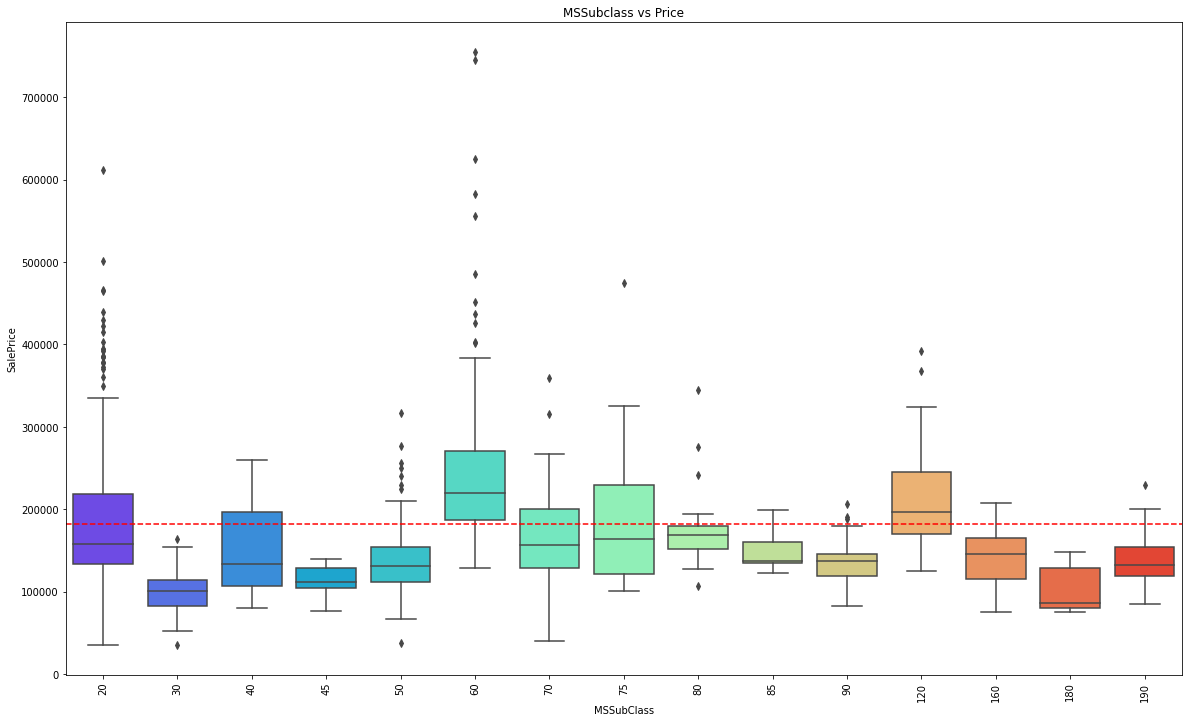

In [444]:
import seaborn as sns
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.boxplot(x="MSSubClass", y="SalePrice", data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("MSSubclass vs Price")
plt.xticks(rotation="vertical")
plt.show()

From the above, we can see that in our dataset MSSubClass 20 (1-STORY 1946 & NEWER ALL STYLES) has maximum number of data points.
and MSSubClass 40 has only 3 (lowest) no of data points.
Othe points to be noted:
    1. MSSubClass 60 has highest maximum value in price and the mean price value is also higher than other MSSubClasses.
    2. MSSubClass 30 has lowest minimum value and lowest mean price.   

<AxesSubplot:xlabel='MSSubClass'>

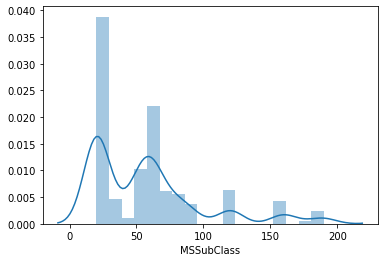

In [445]:
sns.distplot(a=data["MSSubClass"])

According to the distribution plot we can say the data of MSSubClass is rightly skewed.

In [446]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["MSSubClass"]=le.fit_transform(data["MSSubClass"])

In [447]:
data["MSZoning"].isnull().sum()

0

In [448]:
data.MSZoning.value_counts()

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

In [449]:
data.groupby("MSZoning")["SalePrice"].aggregate(["mean", max, min, "count", "std"])

mean     max     min  count           std
MSZoning                                                    
C (all)    75208.888889  133900   34900      9  35768.030829
FV        209478.461538  339750  144152     52  45682.665059
RH        131558.375000  200000   76000     16  35714.118435
RL        191004.181034  755000   39300    928  80422.676513
RM        129070.975460  475000   37900    163  53118.790670

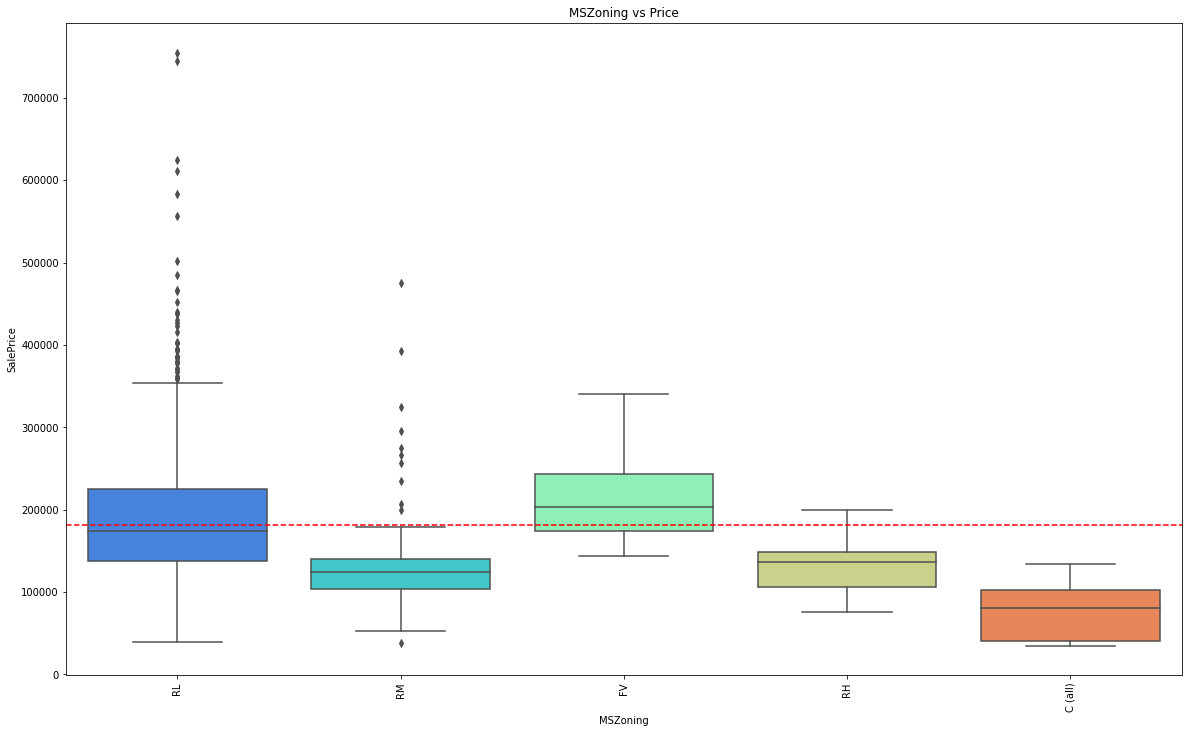

In [450]:
import seaborn as sns
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.boxplot(x="MSZoning", y="SalePrice", data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("MSZoning vs Price")
plt.xticks(rotation="vertical")
plt.show()

From the above boxplot we can interpret that FV MSZoning has maximum mean price value than other MSZones.
RL and RM has outliers that need to be treated.

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

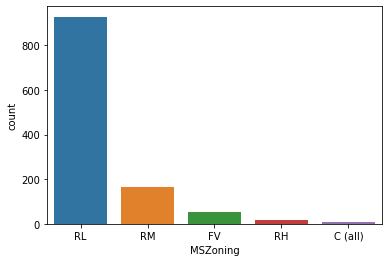

In [451]:
sns.countplot(x=data["MSZoning"])

In [452]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["MSZoning"]=le.fit_transform(data["MSZoning"])

In [453]:
data.drop(columns=["MSZoning"], inplace=True)

In [454]:
data["LotFrontage"].isnull().sum()

214

In [455]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=2)
lotf=pd.DataFrame()
lotf["LotFrontage"]=data["LotFrontage"]

In [456]:
lotf["LotFrontage"]=knn.fit_transform(lotf)

In [457]:
data["LotFrontage"]=lotf["LotFrontage"]

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

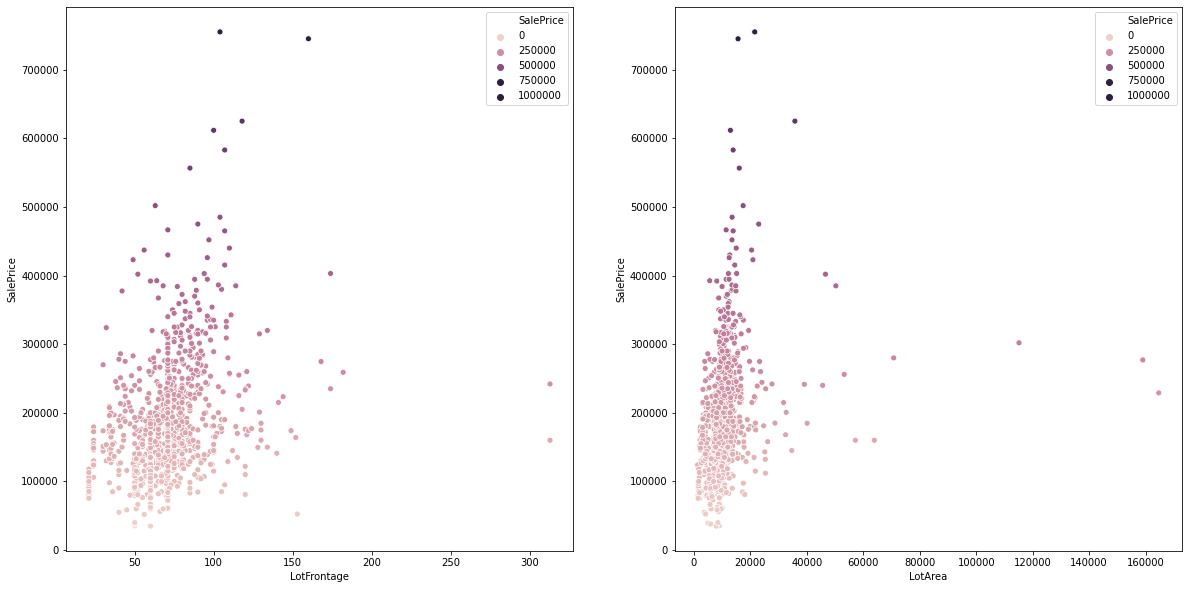

In [458]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, subplots=plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(x=data["LotFrontage"], y=data["SalePrice"], hue=data["SalePrice"], ax=subplots[0])
sns.scatterplot(x=data["LotArea"], y=data["SalePrice"], hue=data["SalePrice"], ax=subplots[1])

From the above scatter plots we can interpret LotFrontage and LotArea are positively correlated to the target variable price. 

In [459]:
data.Street.isnull().sum()

0

<AxesSubplot:xlabel='Street', ylabel='count'>

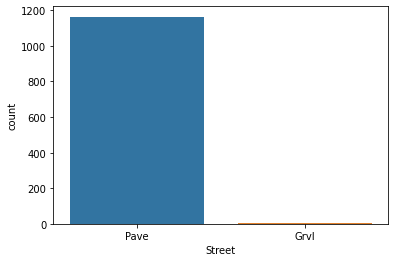

In [460]:
sns.countplot(x=data["Street"])

In [461]:
data.groupby("Street")["SalePrice"].aggregate(["mean", max, min, "count", "std"])

mean     max    min  count           std
Street                                                   
Grvl    121110.750000  228950  55993      4  76344.206256
Pave    181684.450172  755000  34900   1164  79067.093892

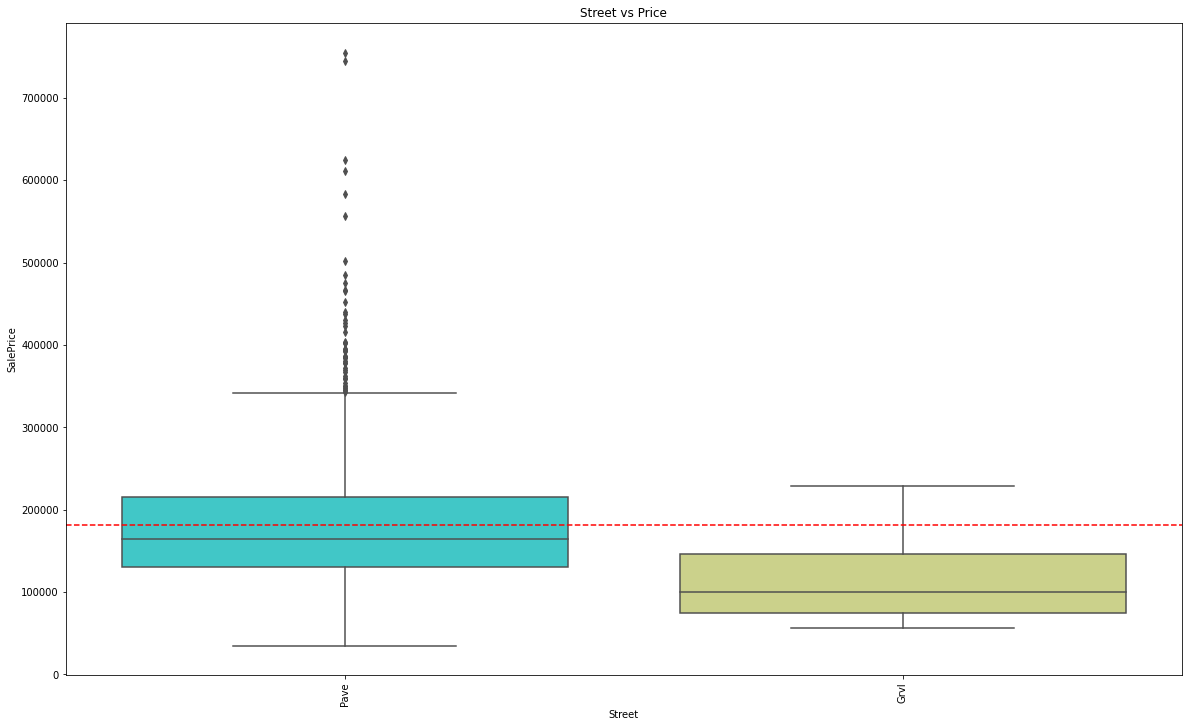

In [462]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.boxplot(x="Street", y="SalePrice", data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("Street vs Price")
plt.xticks(rotation="vertical")
plt.show()

In [463]:
data.drop(columns=["Street"], inplace=True)

In [464]:
data["Alley"].isnull().sum()

1091

In [465]:
data["Alley"]=data["Alley"].fillna("No Alley Access")

In [466]:
data.Alley.value_counts()

No Alley Access    1091
Grvl                 41
Pave                 36
Name: Alley, dtype: int64

In [467]:
data.drop(columns=["Alley"], inplace=True)

In [468]:
data["LotShape"].isnull().sum()

0

In [469]:
data.LotShape.value_counts()

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

<AxesSubplot:xlabel='LotShape', ylabel='count'>

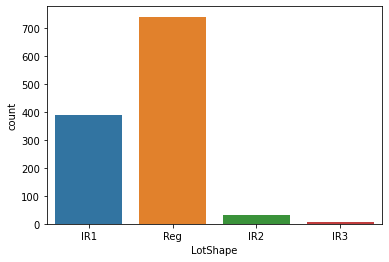

In [470]:
sns.countplot(data["LotShape"])

In [471]:
data.groupby("LotShape")["SalePrice"].aggregate(["mean", max, min, "count", "std"])

mean     max     min  count           std
LotShape                                                    
IR1       206038.464103  755000   52000    390  86993.613054
IR2       233827.750000  475000  144000     32  86965.201908
IR3       226120.833333  274725  160000      6  48261.864906
Reg       165906.660811  582933   34900    740  69780.141950

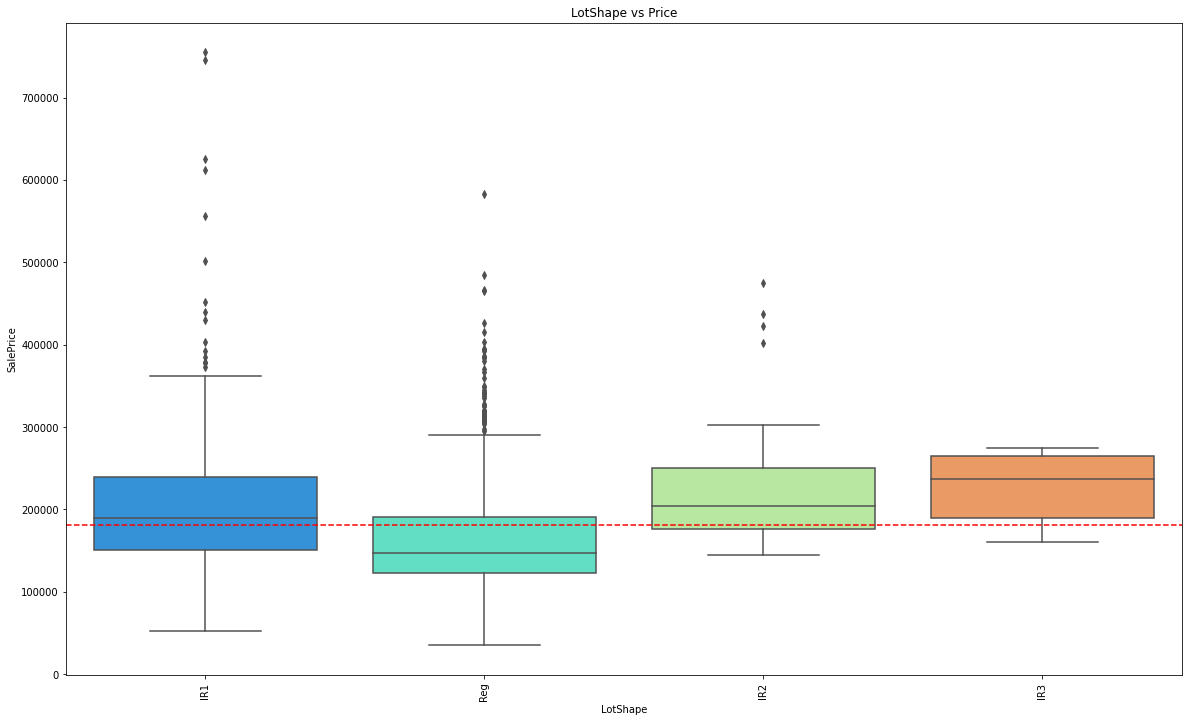

In [472]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.boxplot(x="LotShape", y="SalePrice", data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("LotShape vs Price")
plt.xticks(rotation="vertical")
plt.show()

LotShape IR3 has maximum mean price than other LotShapes and Reg lotshape helds lowest mean price. 

In [473]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["LotShape"]=le.fit_transform(data["LotShape"])

In [474]:
data.LandContour.isnull().sum()

0

In [475]:
data.LandContour.value_counts()

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

<AxesSubplot:xlabel='LandContour', ylabel='count'>

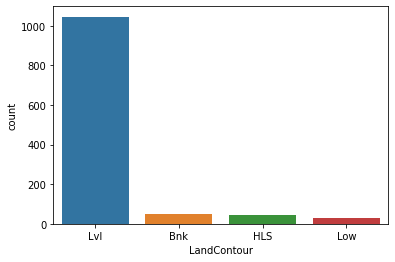

In [476]:
sns.countplot(data["LandContour"])

In [477]:
data.groupby("LandContour")["SalePrice"].aggregate(["mean", max, min, "count", "std"])

mean     max    min  count           std
LandContour                                                   
Bnk          146163.140000  315000  52500     50  50484.400408
HLS          214302.166667  392500  82500     42  85697.964629
Low          194393.333333  385000  39300     30  83659.721010
Lvl          181476.572658  755000  34900   1046  79237.704001

In [478]:
data.drop(columns=["LandContour"], inplace=True)

In [479]:
data.drop(columns=["Utilities"], inplace=True)

In [480]:
data.LotConfig.isnull().sum()

0

In [481]:
data.LotConfig.value_counts()

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

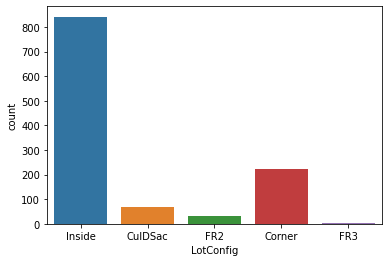

In [482]:
sns.countplot(data["LotConfig"])

In [483]:
data.groupby("LotConfig")["SalePrice"].aggregate(["mean", max, min, "count", "std"])

mean     max     min  count            std
LotConfig                                                     
Corner     182427.635135  755000   52500    222   85907.615639
CulDSac    224594.463768  625000   84000     69   89063.436368
FR2        171138.636364  394617   81000     33   61701.186099
FR3        221500.000000  315000  128000      2  132228.968082
Inside     178003.105701  611657   34900    842   75921.960807

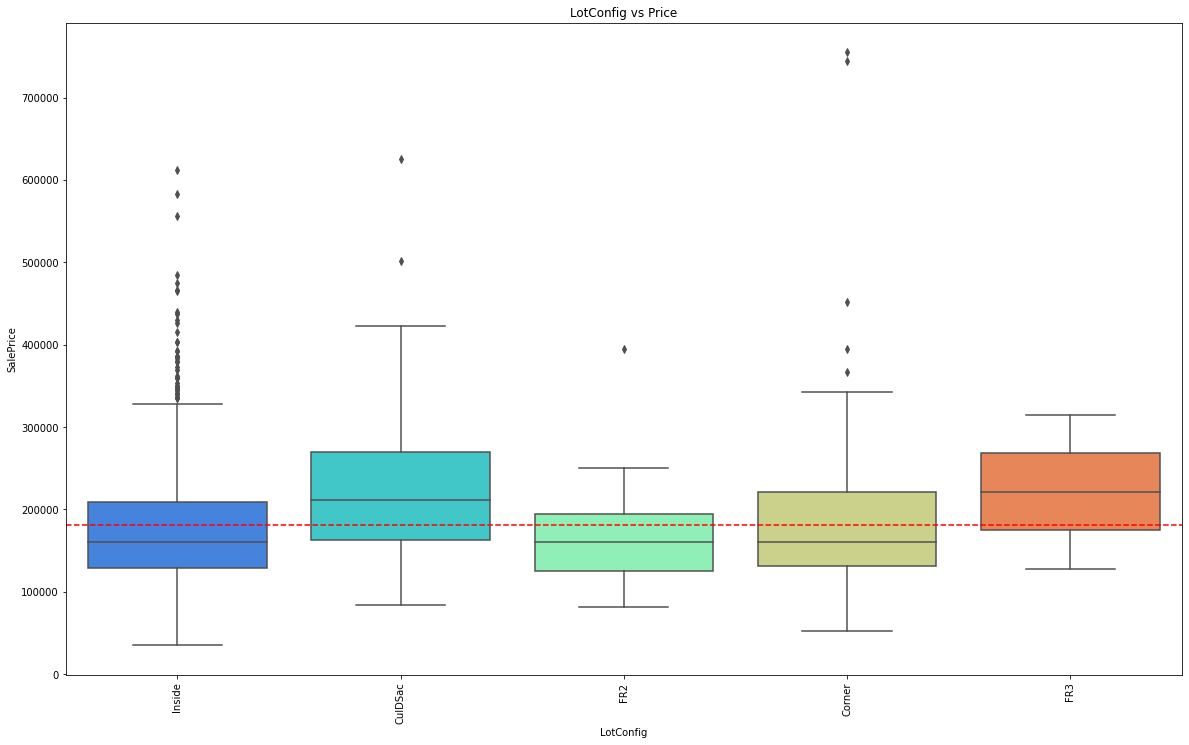

In [484]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.boxplot(x="LotConfig", y="SalePrice", data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("LotConfig vs Price")
plt.xticks(rotation="vertical")
plt.show()

<font color=purple> Among all type of configuration CulDSac has maximum mean price.Also this type lot configuration has maximum price and Inside type has minimum price. </font>

In [485]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["LotConfig"]=le.fit_transform(data["LotConfig"])

In [486]:
data.LandSlope.isnull().sum()

0

In [487]:
data.LandSlope.value_counts()

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

<AxesSubplot:xlabel='LandSlope', ylabel='count'>

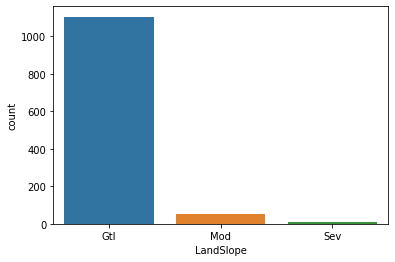

In [488]:
sns.countplot(data["LandSlope"])

In [489]:
data.groupby("LandSlope")["SalePrice"].aggregate(["mean", max, min, "count", "std"])

mean     max    min  count           std
LandSlope                                                   
Gtl        181203.795475  755000  34900   1105  79087.221773
Mod        185353.313725  392500  39300     51  82092.731513
Sev        190160.833333  302000  61000     12  73067.560575

In [490]:
data.drop(columns="LandSlope", inplace=True)

In [491]:
data.Neighborhood.isnull().sum()

0

In [492]:
data.Neighborhood.value_counts()

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

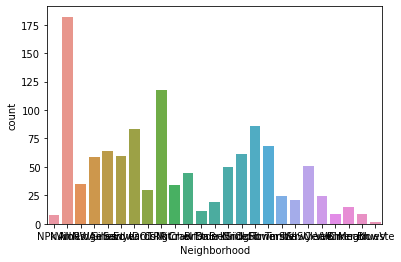

In [493]:
sns.countplot(data["Neighborhood"])

In [494]:
data.groupby("Neighborhood")["SalePrice"].aggregate(["mean", max, min, "count", "std"])

mean     max     min  count            std
Neighborhood                                                     
Blmngtn       195987.000000  264561  159895     15   32249.745288
Blueste       137500.000000  151000  124000      2   19091.883092
BrDale        104081.818182  125000   85400     11   14327.024686
BrkSide       122836.000000  223500   39300     50   39632.988527
ClearCr       216120.833333  328000  130000     24   51207.573991
CollgCr       199517.508475  383970  110000    118   49412.774188
Crawfor       208474.688889  392500   90350     45   64344.505984
Edwards       128544.216867  274970   58500     83   40334.741671
Gilbert       194790.093750  377500  141000     64   38644.737994
IDOTRR        101322.666667  169500   34900     30   35219.726806
MeadowV        88444.444444  127000   75000      9   16138.936699
Mitchel       154654.411765  240000   84500     34   32623.389006
NAmes         146511.225275  345000   87500    182   33885.762086
NPkVill       141968.750000  155000  127500      8    9750.858479
NWAmes        191643.305085  299800  135000     59   38305.898952
NoRidge       341260.228571  755000  190000     35  128824.351080
NridgHt       312548.655738  611657  154000     61   95542.042792
OldTown       133947.197674  475000   37900     86   57633.156924
SWISU         142587.333333  200000   60000     21   31534.037314
Sawyer        135029.866667  190000   62383     60   23253.912136
SawyerW       186909.647059  320000   76000     51   56417.190163
Somerst       222649.588235  423000  144152     68   54649.367013
StoneBr       301145.736842  556581  170000     19  107792.601212
Timber        240579.291667  378500  160000     24   62585.225467
Veenker       246833.333333  385000  162500      9   78003.605686

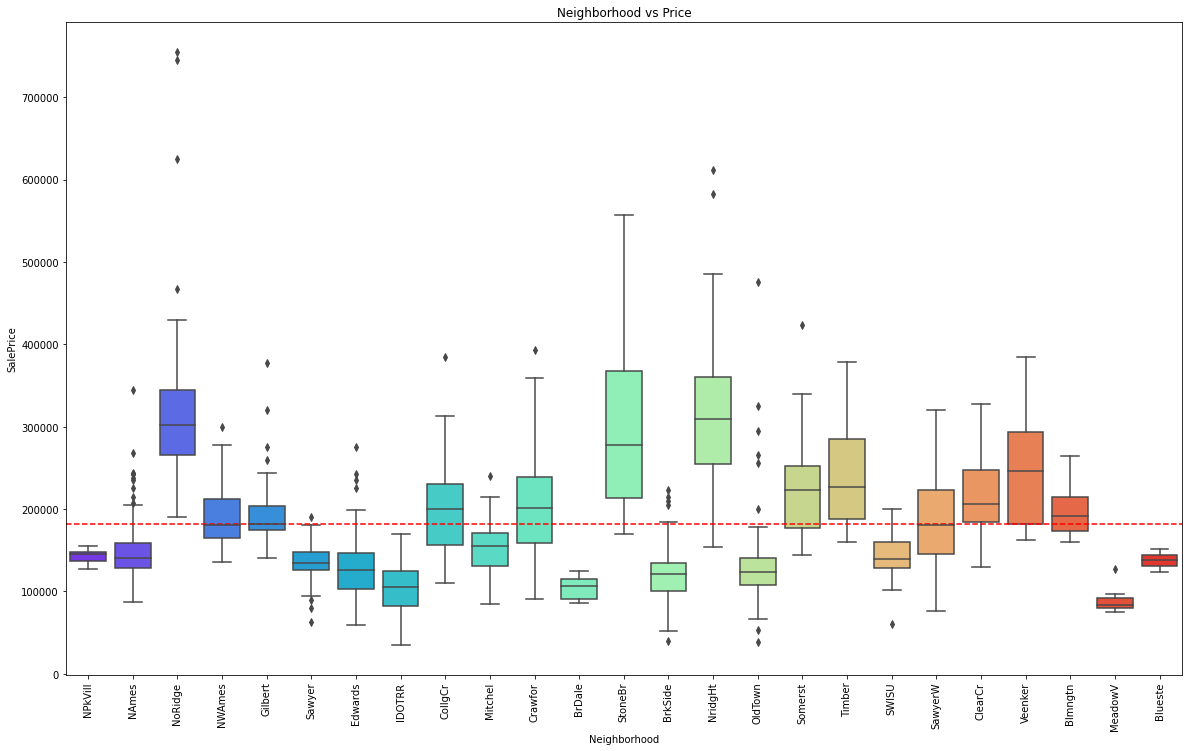

In [495]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.boxplot(x="Neighborhood", y="SalePrice", data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("Neighborhood vs Price")
plt.xticks(rotation="vertical")
plt.show()

From the above boxplot we can say that Neighborhood: Physical locations within Ames city limits variable has played an important role in deciding the price of the propery,
Near StoneBr/Stone Brook and NridgHt/Northridge Heights the price of house is higher than any other locations, we can also state that
IDOTRR/Iowa DOT and Rail Road location & MeadowV/Meadow Village have bad effect on price, the price is lower in this location.

In [496]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Neighborhood"]=le.fit_transform(data["Neighborhood"])

In [497]:
data["Conditions"]=(data["Condition1"]+ " & "+ data["Condition2"])

In [498]:
data.Conditions.isnull().sum()

0

In [499]:
data.Conditions.value_counts()

Norm & Norm        1005
Feedr & Norm         63
Artery & Norm        35
RRAn & Norm          16
PosN & Norm          15
RRAe & Norm           9
PosA & Norm           6
RRAn & Feedr          4
RRNn & Norm           3
RRNe & Norm           2
PosN & PosN           2
Artery & Artery       2
RRNn & Feedr          1
Artery & PosA         1
Feedr & RRAn          1
Feedr & RRNn          1
Feedr & Feedr         1
Feedr & RRAe          1
Name: Conditions, dtype: int64

<AxesSubplot:xlabel='Conditions', ylabel='count'>

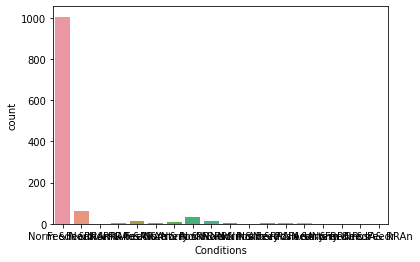

In [500]:
sns.countplot(data["Conditions"])

In [501]:
data.groupby("Conditions")["SalePrice"].aggregate(["mean", max, min, "count", "std"])

mean     max     min  count            std
Conditions                                                          
Artery & Artery  106500.000000  118000   95000      2   16263.455967
Artery & Norm    134377.142857  475000   66500     35   67792.230536
Artery & PosA    325000.000000  325000  325000      1            NaN
Feedr & Feedr     85000.000000   85000   85000      1            NaN
Feedr & Norm     143344.079365  244600   40000     63   41020.346099
Feedr & RRAe     190000.000000  190000  190000      1            NaN
Feedr & RRAn     136905.000000  136905  136905      1            NaN
Feedr & RRNn     125000.000000  125000  125000      1            NaN
Norm & Norm      184692.003980  755000   34900   1005   80592.637121
PosA & Norm      237833.333333  335000  180000      6   56126.345567
PosN & Norm      210516.666667  313000  109500     15   55791.101654
PosN & PosN      284875.000000  385000  184750      2  141598.132933
RRAe & Norm      139044.444444  171000   87000      9   24108.458635
RRAn & Feedr     128500.000000  167500   79500      4   36771.818920
RRAn & Norm      205468.562500  423000  129000     16   73843.052978
RRNe & Norm      190750.000000  194500  187000      2    5303.300859
RRNn & Feedr     128000.000000  128000  128000      1            NaN
RRNn & Norm      274666.666667  320000  214000      3   54638.203972

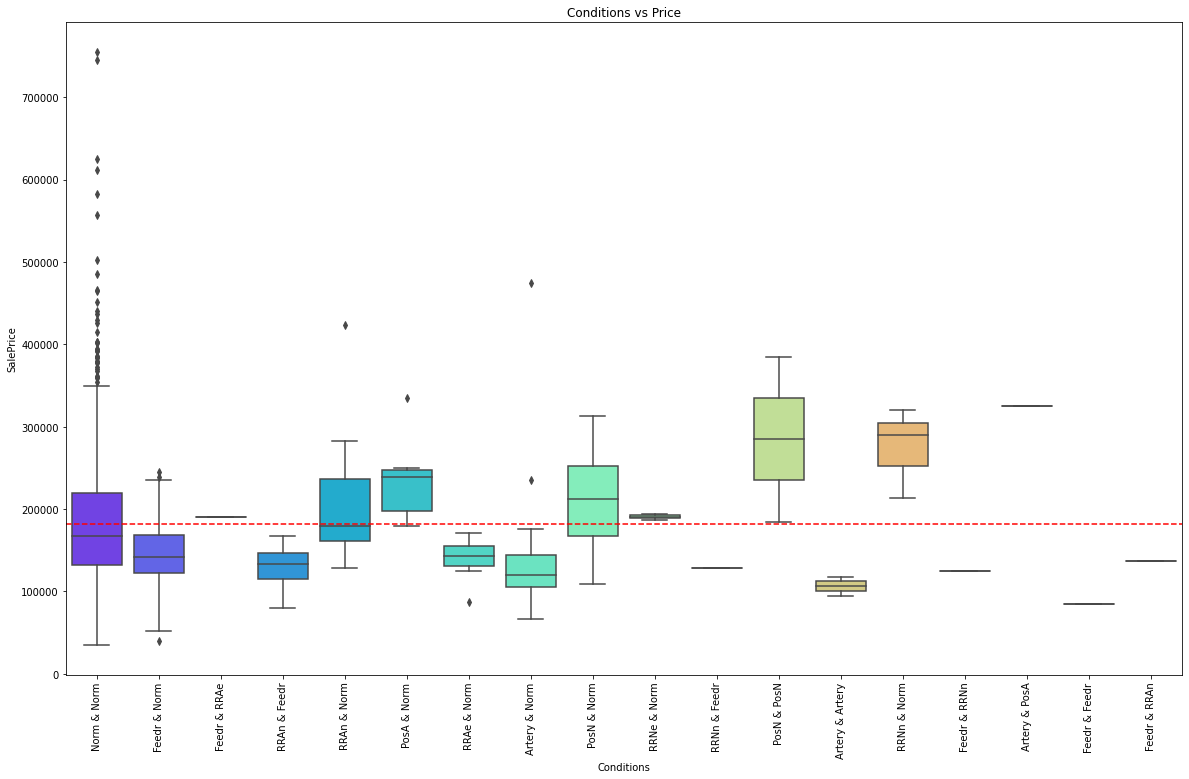

In [502]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.boxplot(x="Conditions", y="SalePrice", data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("Conditions vs Price")
plt.xticks(rotation="vertical")
plt.show()

In [503]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Conditions"]=le.fit_transform(data["Conditions"])

In [504]:
data.drop(columns=["Condition1", "Condition2"], inplace=True)

In [505]:
data.BldgType.isnull().sum()

0

In [506]:
data.BldgType.value_counts()

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

<AxesSubplot:xlabel='BldgType', ylabel='count'>

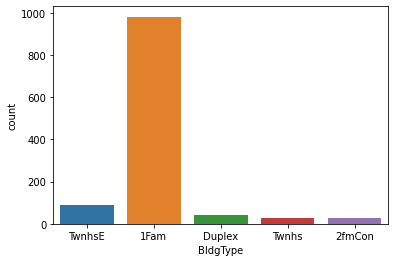

In [507]:
sns.countplot(data["BldgType"])

In [508]:
data.groupby("BldgType")["SalePrice"].aggregate(["mean", max, min, "count", "std"])

mean     max    min  count           std
BldgType                                                   
1Fam      185602.300714  755000  34900    981  82191.414730
2fmCon    133737.037037  228950  84500     27  33367.492220
Duplex    133871.609756  206300  82000     41  27856.845522
Twnhs     139437.931034  209500  75000     29  40357.274205
TwnhsE    186066.111111  392500  75500     90  62935.863081

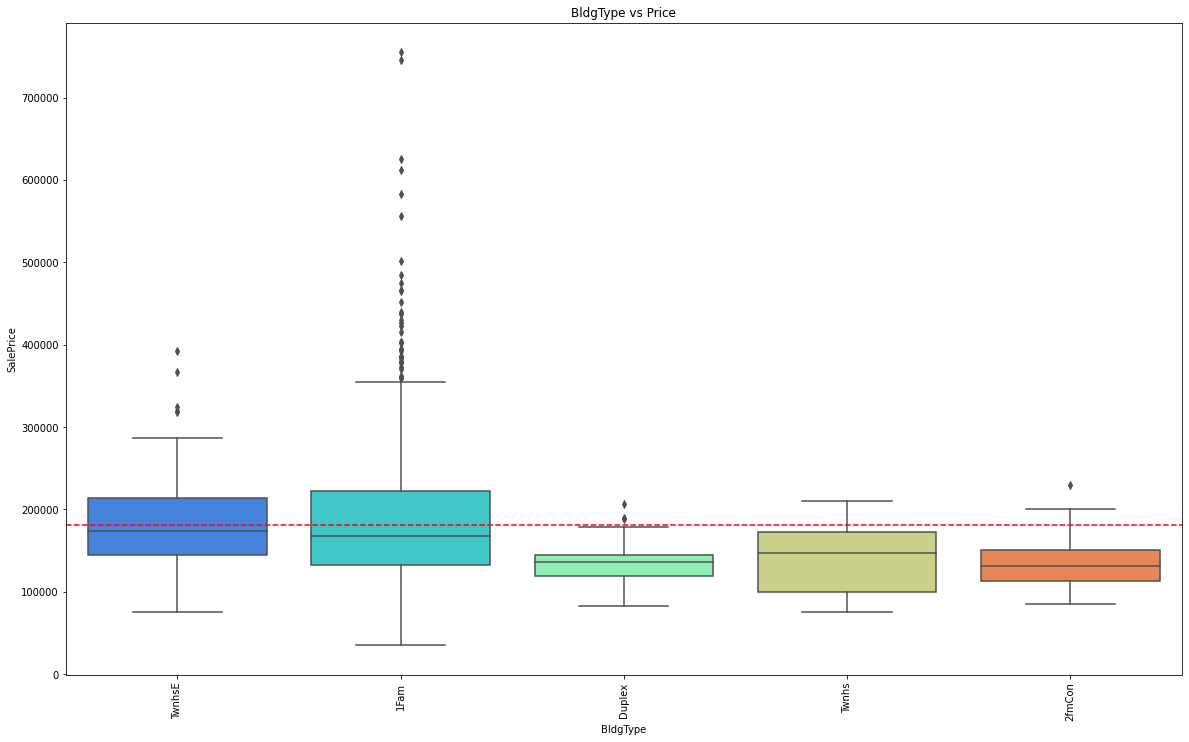

In [509]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.boxplot(x="BldgType", y="SalePrice", data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("BldgType vs Price")
plt.xticks(rotation="vertical")
plt.show()

In [510]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["BldgType"]=le.fit_transform(data["Conditions"])

In [511]:
data.HouseStyle.value_counts()

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

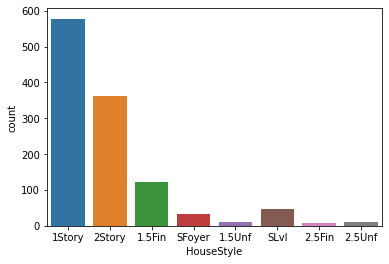

In [512]:
sns.countplot(data["HouseStyle"])

In [513]:
data.groupby("HouseStyle")["SalePrice"].aggregate(["mean", max, min, "count", "std"])

mean     max     min  count            std
HouseStyle                                                     
1.5Fin      138546.363636  316600   37900    121   43001.547592
1.5Unf      113216.666667  139400   76000     12   18771.198118
1Story      175940.826990  611657   34900    578   75915.507440
2.5Fin      223285.714286  475000  104000      7  127288.339720
2.5Unf      158690.000000  325000  101000     10   67230.572576
2Story      212193.515235  755000   40000    361   88132.390664
SFoyer      137508.000000  206300   75500     32   30077.715898
SLvl        170140.851064  345000  107000     47   38125.542324

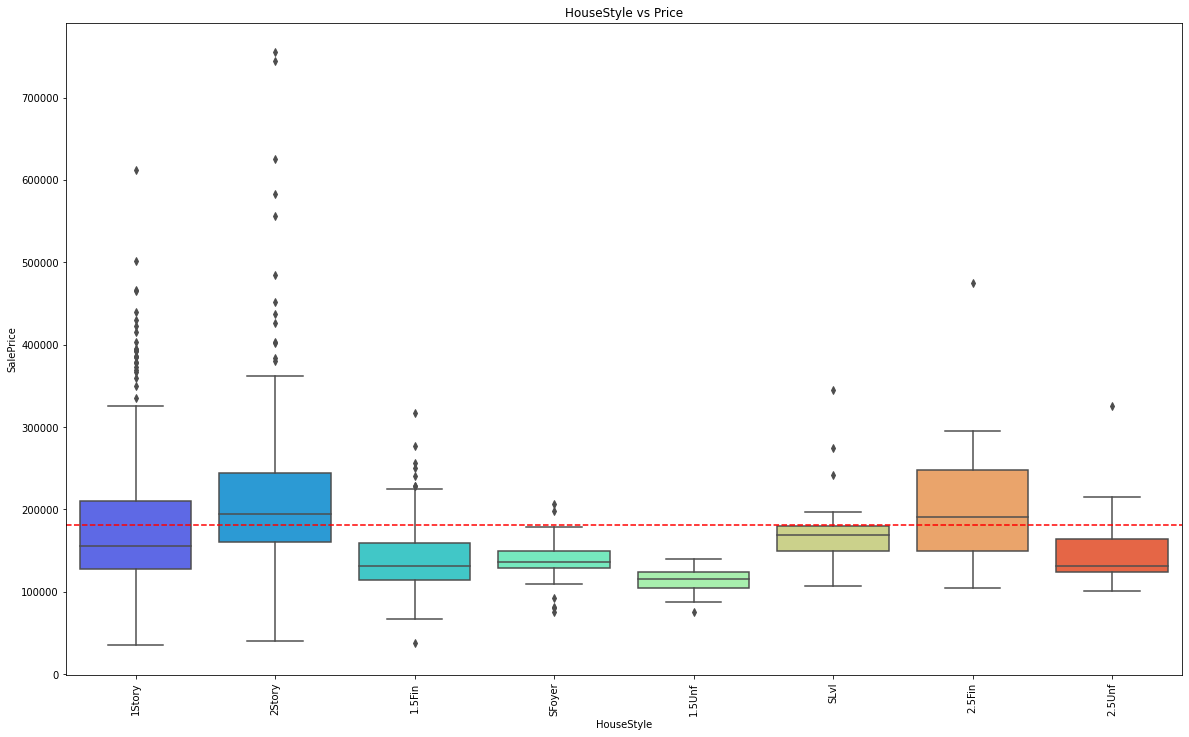

In [514]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.boxplot(x="HouseStyle", y="SalePrice", data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("HouseStyle vs Price")
plt.xticks(rotation="vertical")
plt.show()

As per the boxplot we can see that Two and one-half story: 2nd level finished & two story hoses are more costly than any other type of house style.
     1.5Unf	One and one-half story: 2nd level unfinished type has lower prices than others. Customers are more attracted to finished houses.

In [515]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["HouseStyle"]=le.fit_transform(data["HouseStyle"])

In [516]:
data['OverallQual'].isnull().sum()
data['OverallCond'].isnull().sum()

0

In [517]:
data['OverallQual'].value_counts(), data['OverallCond'].value_counts()

(5     314
 6     295
 7     260
 8     138
 4      93
 9      32
 3      16
 10     15
 2       3
 1       2
 Name: OverallQual, dtype: int64,
 5    640
 6    209
 7    172
 8     61
 4     43
 3     21
 9     16
 2      5
 1      1
 Name: OverallCond, dtype: int64)

In [518]:
data.groupby("OverallQual")["SalePrice"].aggregate(["mean", max, min, "count", "std"]), data.groupby("OverallCond")["SalePrice"].aggregate(["mean", max, min, "count", "std"])

(                      mean     max     min  count            std
 OverallQual                                                     
 1             50150.000000   61000   39300      2   15344.217152
 2             51770.333333   60000   35311      3   14254.200796
 3             88498.437500  139600   37900     16   27161.609655
 4            110892.086022  256000   34900     93   29714.849574
 5            133340.378981  228950   55993    314   26316.707747
 6            162520.711864  277000   76000    295   36865.485269
 7            207887.973077  383970  116900    260   43340.031524
 8            273051.804348  440000  147000    138   57663.284612
 9            371024.093750  611657  239000     32   89623.506715
 10           437554.066667  755000  160000     15  171182.284625,
                       mean     max     min  count            std
 OverallCond                                                     
 1             61000.000000   61000   61000      1            NaN
 2       

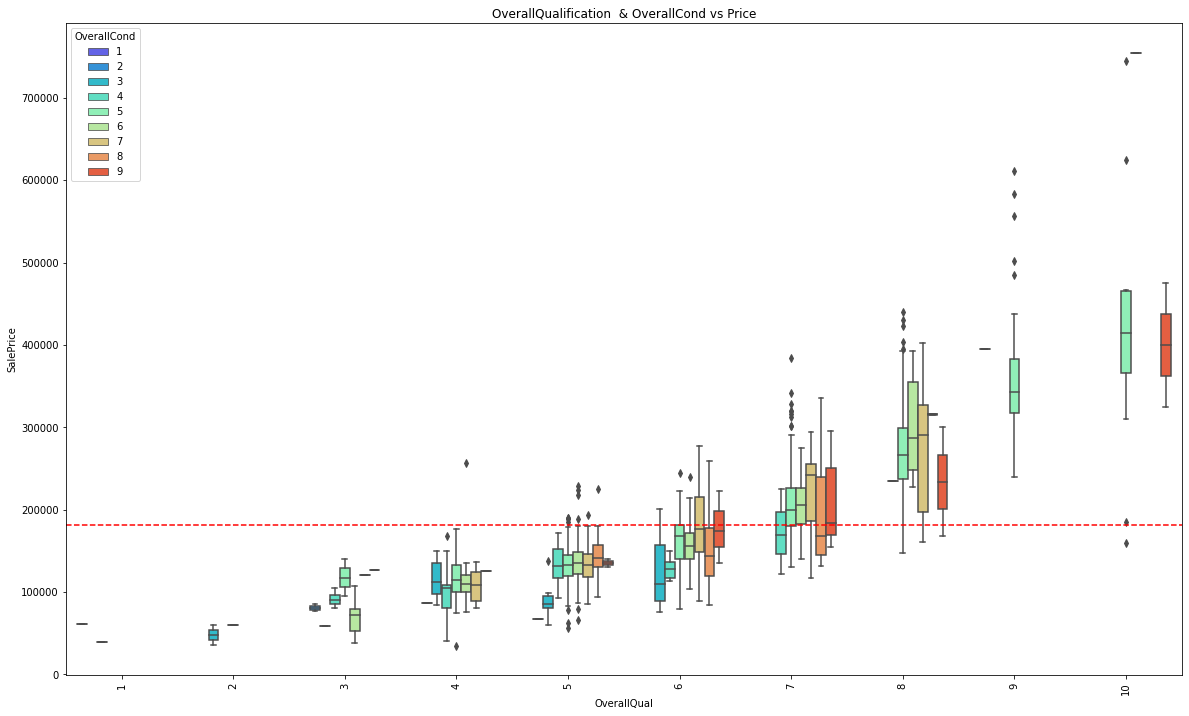

In [519]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.boxplot(x="OverallQual", y="SalePrice", hue="OverallCond",data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("OverallQualification  & OverallCond vs Price")
plt.xticks(rotation="vertical")
plt.show()

We can state that Very excellent overall qualification houses have higher prices and the price is in descending order from 10 or very excellent to very poor.

In [520]:
data["Age when Sold(Mo)"]=((data["YrSold"]-data["YearBuilt"])*12)+data["MoSold"]

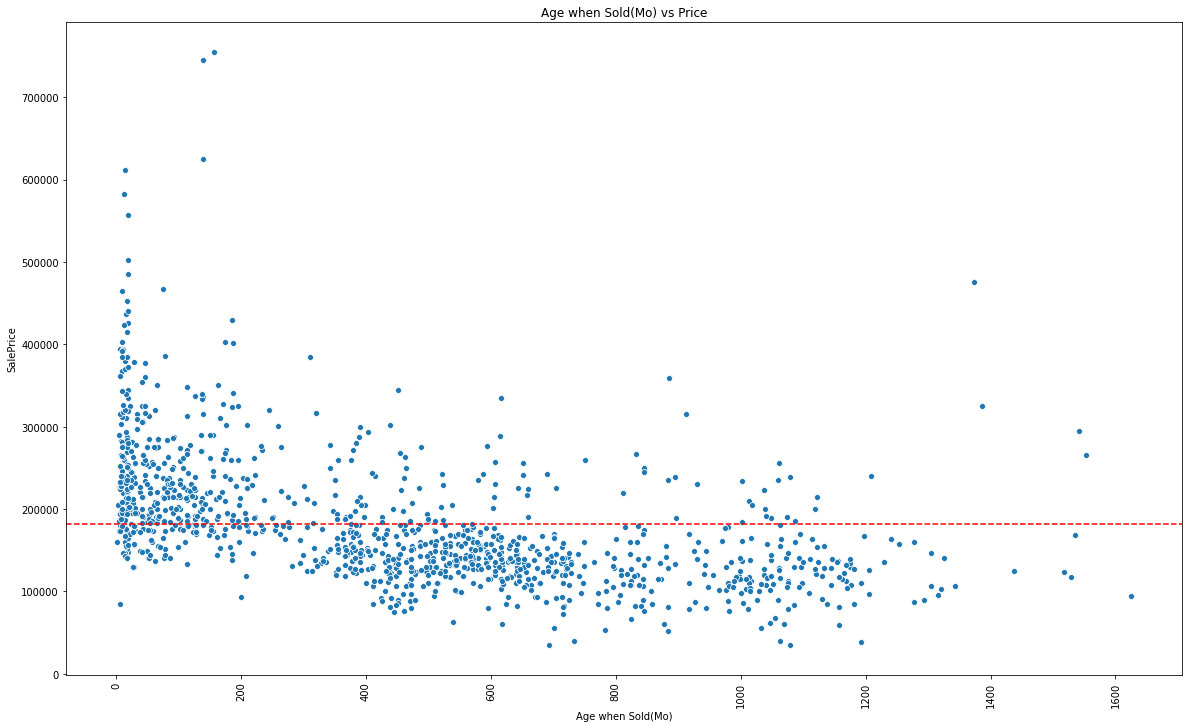

In [521]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.scatterplot(x="Age when Sold(Mo)", y="SalePrice", data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("Age when Sold(Mo) vs Price")
plt.xticks(rotation="vertical")
plt.show()

We can clearly interpret from the scatterplot that the houses with old age have less price than less aged houses.

In [522]:
result=data["YearBuilt"]==data["YearRemodAdd"]
data["Remodeled"]=result

In [523]:
data.Remodeled.value_counts()

True     598
False    570
Name: Remodeled, dtype: int64

In [524]:
data["Remodeled (In months)"]=(data["YrSold"]-data["YearRemodAdd"])*12

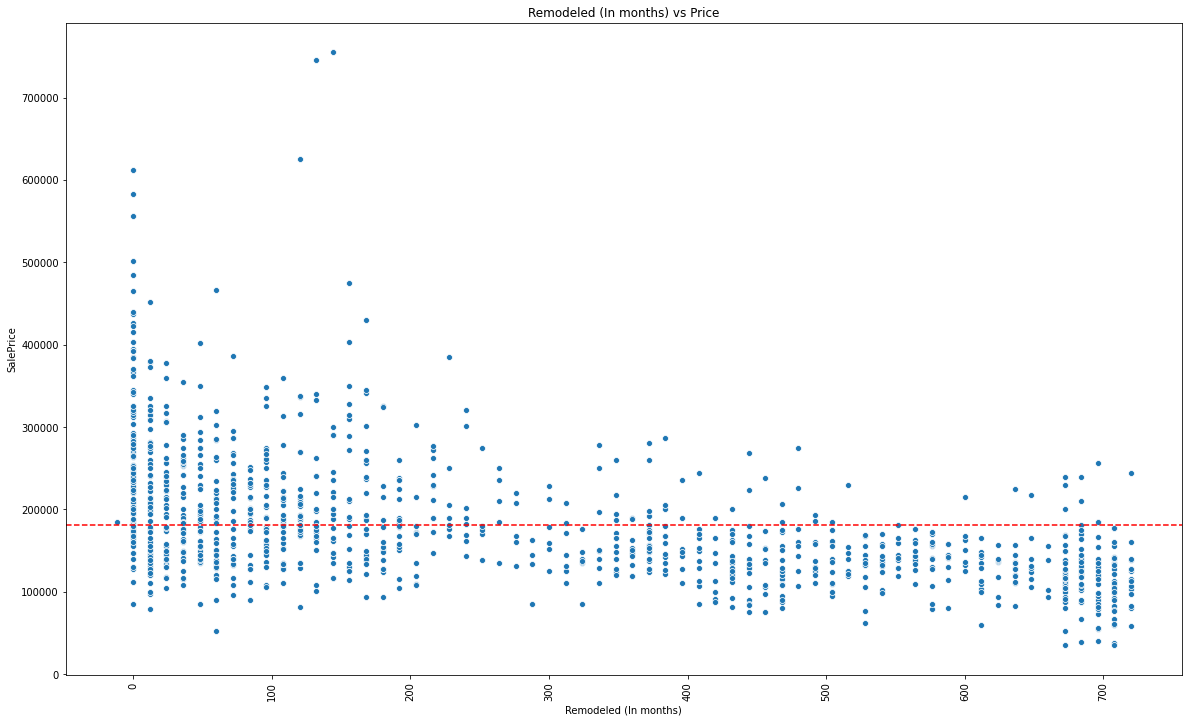

In [525]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.scatterplot(x="Remodeled (In months)", y="SalePrice", data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("Remodeled (In months) vs Price")
plt.xticks(rotation="vertical")
plt.show()

In [526]:
data.drop(columns=["YrSold", "YearBuilt", "MoSold", "YearRemodAdd"], inplace=True)

In [527]:
data['RoofStyle'].value_counts()

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

<AxesSubplot:xlabel='RoofStyle', ylabel='count'>

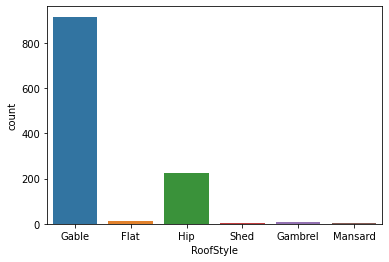

In [528]:
sns.countplot(data["RoofStyle"])

In [529]:
data.groupby("OverallQual")["SalePrice"].aggregate(["mean", max, min, "count", "std"])

mean     max     min  count            std
OverallQual                                                     
1             50150.000000   61000   39300      2   15344.217152
2             51770.333333   60000   35311      3   14254.200796
3             88498.437500  139600   37900     16   27161.609655
4            110892.086022  256000   34900     93   29714.849574
5            133340.378981  228950   55993    314   26316.707747
6            162520.711864  277000   76000    295   36865.485269
7            207887.973077  383970  116900    260   43340.031524
8            273051.804348  440000  147000    138   57663.284612
9            371024.093750  611657  239000     32   89623.506715
10           437554.066667  755000  160000     15  171182.284625

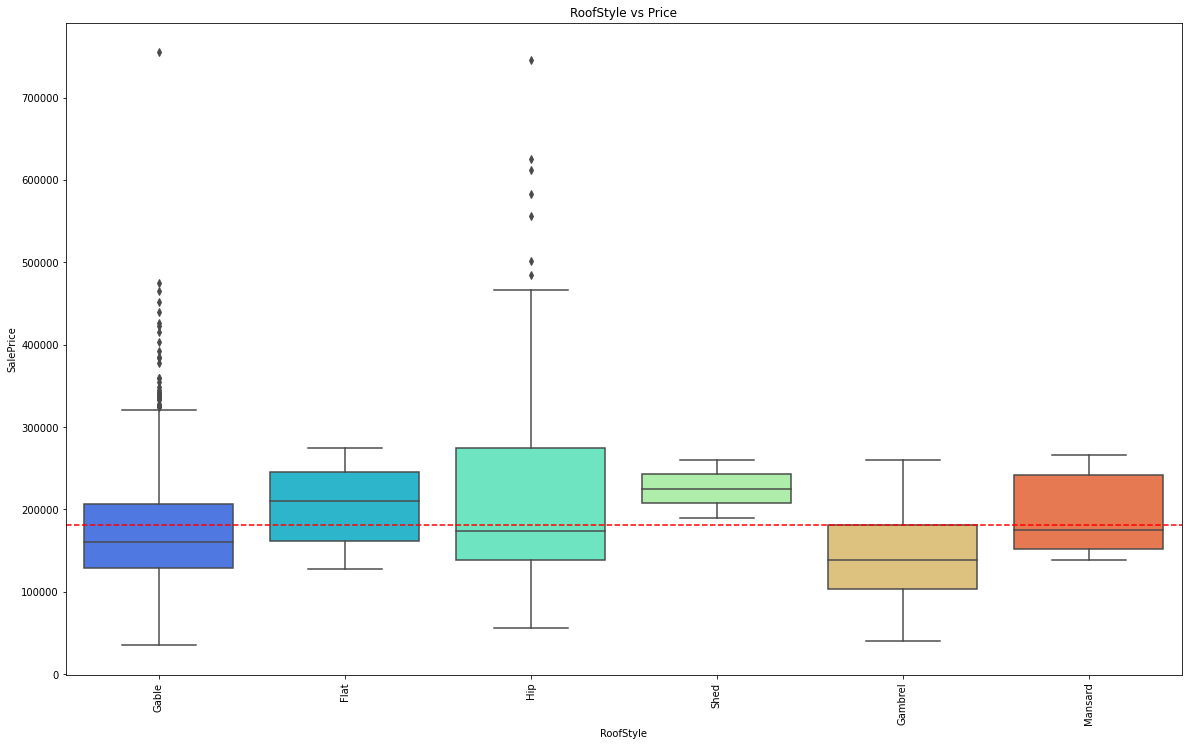

In [530]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.boxplot(x="RoofStyle", y="SalePrice",data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("RoofStyle vs Price")
plt.xticks(rotation="vertical")
plt.show()

In [531]:
result=data["Exterior1st"]==data["Exterior2nd"]
if result is True:
    data["Exterior"]=data["Exterior1st"]
else:
    data["Exterior"]=(data["Exterior1st"]+" & "+data["Exterior2nd"])

In [532]:
data["Exterior"].value_counts()

VinylSd & VinylSd    386
MetalSd & MetalSd    171
HdBoard & HdBoard    156
Wd Sdng & Wd Sdng    149
Plywood & Plywood     84
CemntBd & CmentBd     41
BrkFace & BrkFace     19
Stucco & Stucco       18
HdBoard & Plywood     17
AsbShng & AsbShng     16
WdShing & Wd Shng     13
BrkFace & Wd Sdng     10
Wd Sdng & Wd Shng      9
BrkFace & Plywood      5
Wd Sdng & Plywood      5
VinylSd & Wd Shng      4
Plywood & Brk Cmn      4
MetalSd & HdBoard      3
BrkFace & HdBoard      3
WdShing & Plywood      3
Stucco & Wd Shng       3
Wd Sdng & ImStucc      3
HdBoard & ImStucc      2
Plywood & Wd Sdng      2
WdShing & HdBoard      2
Plywood & HdBoard      2
AsbShng & Plywood      2
Wd Sdng & HdBoard      2
BrkFace & Stone        2
VinylSd & Plywood      2
MetalSd & Wd Sdng      2
HdBoard & AsphShn      1
BrkComm & Brk Cmn      1
AsbShng & Stucco       1
HdBoard & MetalSd      1
Stone & HdBoard        1
VinylSd & ImStucc      1
Wd Sdng & Stone        1
CemntBd & Wd Sdng      1
Plywood & ImStucc      1


In [533]:
data.groupby("Exterior")["SalePrice"].aggregate(["mean", max, min, "count", "std"])

mean     max     min  count            std
Exterior                                                              
AsbShng & AsbShng  109481.937500  165500   35311     16   36588.625282
AsbShng & Plywood  104500.000000  127000   82000      2   31819.805153
AsbShng & Stucco    87000.000000   87000   87000      1            NaN
AsphShn & AsphShn  100000.000000  100000  100000      1            NaN
BrkComm & Brk Cmn   60000.000000   60000   60000      1            NaN
BrkFace & AsbShng  225000.000000  225000  225000      1            NaN
BrkFace & BrkFace  197655.263158  430000   40000     19   95228.332173
BrkFace & HdBoard  241500.000000  335000  127000      3  105578.170092
BrkFace & Plywood  191800.000000  237500  132500      5   51955.028631
BrkFace & Stone    133500.000000  177000   90000      2   61518.289963
BrkFace & Stucco   230000.000000  230000  230000      1            NaN
BrkFace & Wd Sdng  197310.000000  359100  109900     10   80385.093284
CemntBd & CmentBd  244756.000000  556581   75000     41  118391.008623
CemntBd & Wd Sdng  168000.000000  168000  168000      1            NaN
HdBoard & AsphShn  175000.000000  175000  175000      1            NaN
HdBoard & HdBoard  166851.243590  755000   85400    156   74899.272194
HdBoard & ImStucc  106250.000000  124500   88000      2   25809.397513
HdBoard & MetalSd  119500.000000  119500  119500      1            NaN
HdBoard & Plywood  144714.705882  225000  120500     17   22952.653473
HdBoard & Wd Sdng  125500.000000  125500  125500      1            NaN
HdBoard & Wd Shng  133000.000000  133000  133000      1            NaN
ImStucc & ImStucc  262000.000000  262000  262000      1            NaN
MetalSd & AsphShn  139000.000000  139000  139000      1            NaN
MetalSd & HdBoard  145833.333333  167500  112000      3   29683.047912
MetalSd & MetalSd  148790.520468  392000   62383    171   53805.124327
MetalSd & Wd Sdng  137000.000000  189000   85000      2   73539.105243
MetalSd & Wd Shng  139000.000000  139000  139000      1            NaN
Plywood & Brk Cmn  149125.000000  155000  146000      4    4049.176871
Plywood & HdBoard  139250.000000  147000  131500      2   10960.155108
Plywood & ImStucc  179200.000000  179200  179200      1            NaN
Plywood & Plywood  179393.773810  320000   85000     84   49396.528543
Plywood & Wd Sdng  256750.000000  345000  168500      2  124804.346879
Stone & HdBoard    287000.000000  287000  287000      1            NaN
Stone & Stone      230000.000000  230000  230000      1            NaN
Stucco & CmentBd   378500.000000  378500  378500      1            NaN
Stucco & Stucco    150819.444444  265979   58500     18   56668.411927
Stucco & Wd Shng   146666.666667  161000  130000      3   15631.165450
VinylSd & HdBoard  128000.000000  128000  128000      1            NaN
VinylSd & ImStucc  320000.000000  320000  320000      1            NaN
VinylSd & Other    319000.000000  319000  319000      1            NaN
VinylSd & Plywood  161400.000000  184000  138800      2   31961.226510
VinylSd & Stucco   159434.000000  159434  159434      1            NaN
VinylSd & VinylSd  215955.823834  611657   37900    386   78645.249673
VinylSd & Wd Shng  168562.500000  175500  154000      4    9832.715376
Wd Sdng & AsbShng   82000.000000   82000   82000      1            NaN
Wd Sdng & BrkFace  140000.000000  140000  140000      1            NaN
Wd Sdng & HdBoard  228750.000000  277000  180500      2   68235.804385
Wd Sdng & ImStucc  405333.333333  745000  130000      3  312506.533265
Wd Sdng & MetalSd  140000.000000  140000  140000      1            NaN
Wd Sdng & Plywood  132000.000000  222000   76500      5   61671.508819
Wd Sdng & Stone    200624.000000  200624  200624      1            NaN
Wd Sdng & Stucco   239000.000000  239000  239000      1            NaN
Wd Sdng & VinylSd   81000.000000   81000   81000      1            NaN
Wd Sdng & Wd Sdng  148067.315436  475000   34900    149   58224.188235
Wd Sdng & Wd Shng  141055.555556  214500   78000    

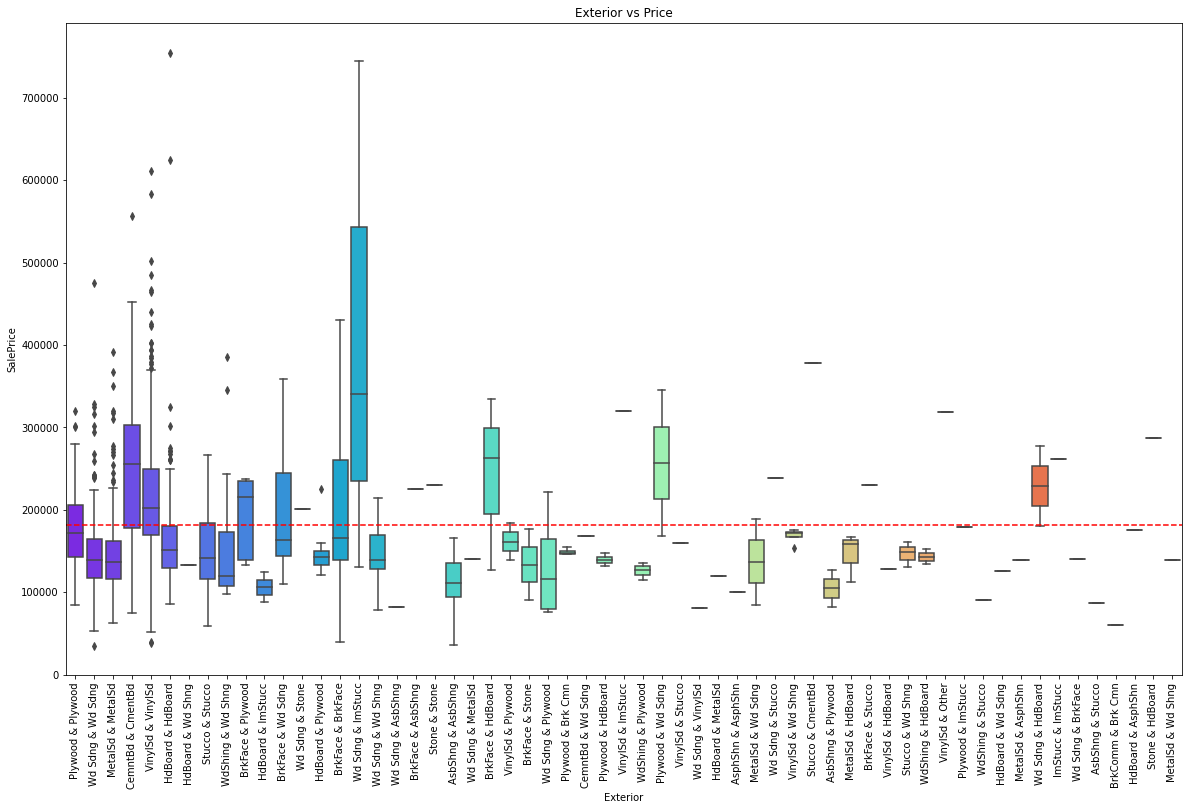

In [534]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.boxplot(x="Exterior", y="SalePrice",data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("Exterior vs Price")
plt.xticks(rotation="vertical")
plt.show()

From the above visualization we can state that the houses with Wood Siding and Imitation Stucco type of covering the houses have fetched prices.

In [535]:
data.drop(columns=["Exterior1st", "Exterior2nd"], inplace=True)

In [536]:
data.drop(columns=["MasVnrType"], inplace=True)

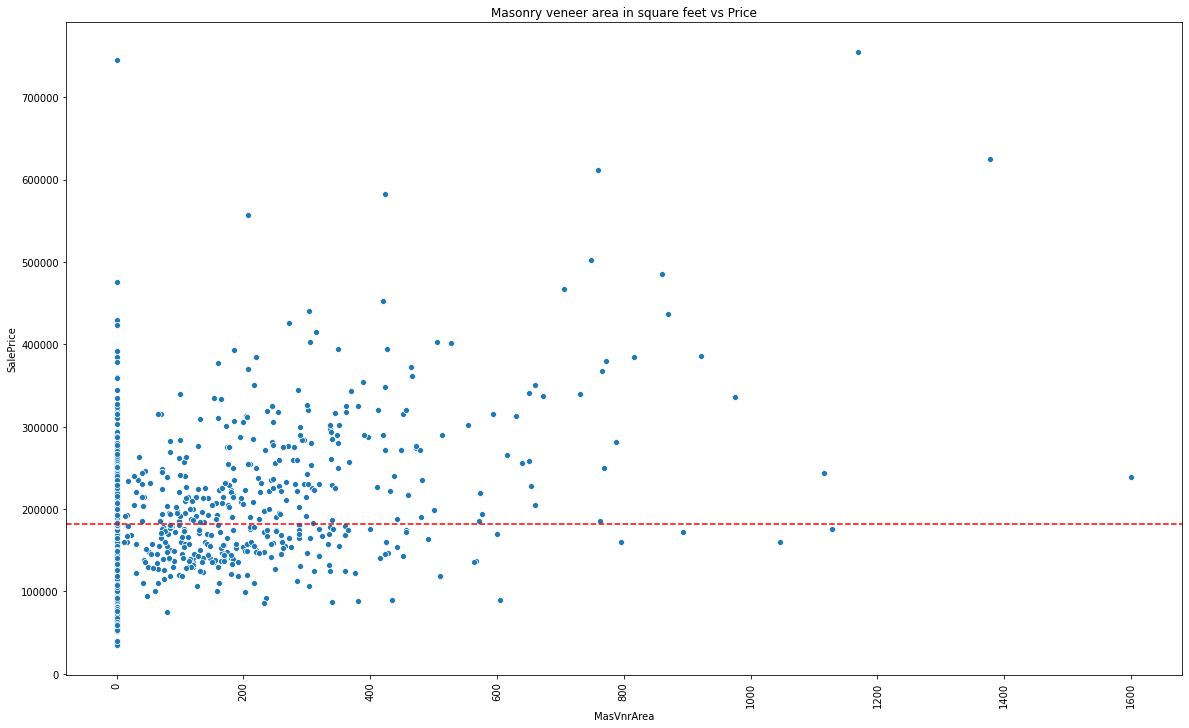

In [537]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.scatterplot(x="MasVnrArea", y="SalePrice", data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("Masonry veneer area in square feet vs Price")
plt.xticks(rotation="vertical")
plt.show()

In [538]:
exters=["ExterQual", "ExterCond"]
for i in exters:
    data[i]=data[i].replace({"Ex":5,"Gd":4, "TA":3, "Fa":2, "Po":1})

In [539]:
data["Exter(Q+c)"]=data["ExterQual"]+data["ExterCond"]

In [540]:
data["Exter(Q+c)"].value_counts()

6     610
7     451
8      70
5      27
4       6
9       3
10      1
Name: Exter(Q+c), dtype: int64

In [541]:
data.groupby("Exter(Q+c)")["SalePrice"].aggregate(["mean", max, min, "count", "std"])

mean     max     min  count            std
Exter(Q+c)                                                     
4            67300.000000   85000   39300      6   17268.468374
5           112772.481481  200000   40000     27   40451.956166
6           145705.055738  359100   34900    610   42523.672551
7           215445.838137  745000   52000    451   71449.636767
8           305628.985714  755000  107400     70  133663.215428
9           250433.333333  299800  185000      3   59062.368166
10          325000.000000  325000  325000      1            NaN

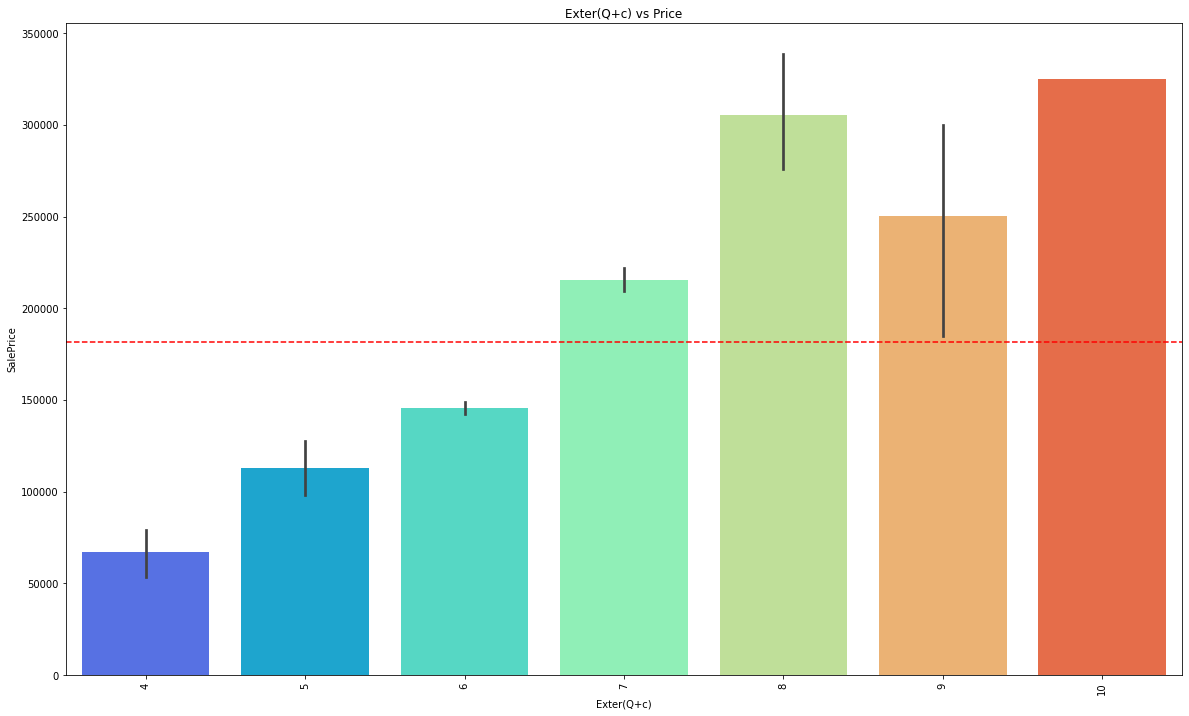

In [542]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.barplot(x="Exter(Q+c)", y="SalePrice",data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("Exter(Q+c) vs Price")
plt.xticks(rotation="vertical")
plt.show()

From the barplot we can easily observe that Excellent condition of the material on the exterior type of houses are more costly than other types and Poor type condition has the lowest price.

In [543]:
data.drop(columns=["ExterCond", "ExterQual"], inplace=True)

In [544]:
data.Foundation.value_counts()

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64

In [545]:
data.groupby("Foundation")["SalePrice"].aggregate(["mean", max, min, "count", "std"])

mean     max     min  count           std
Foundation                                                    
BrkTil      137895.285714  475000   37900    112  57851.876271
CBlock      149858.994186  402861   34900    516  48488.181564
PConc       225757.504873  755000   78000    513  86498.822042
Slab        110846.428571  198500   39300     21  34104.422295
Stone       177651.000000  266500  102776      5  81785.688864
Wood        164000.000000  164000  164000      1           NaN

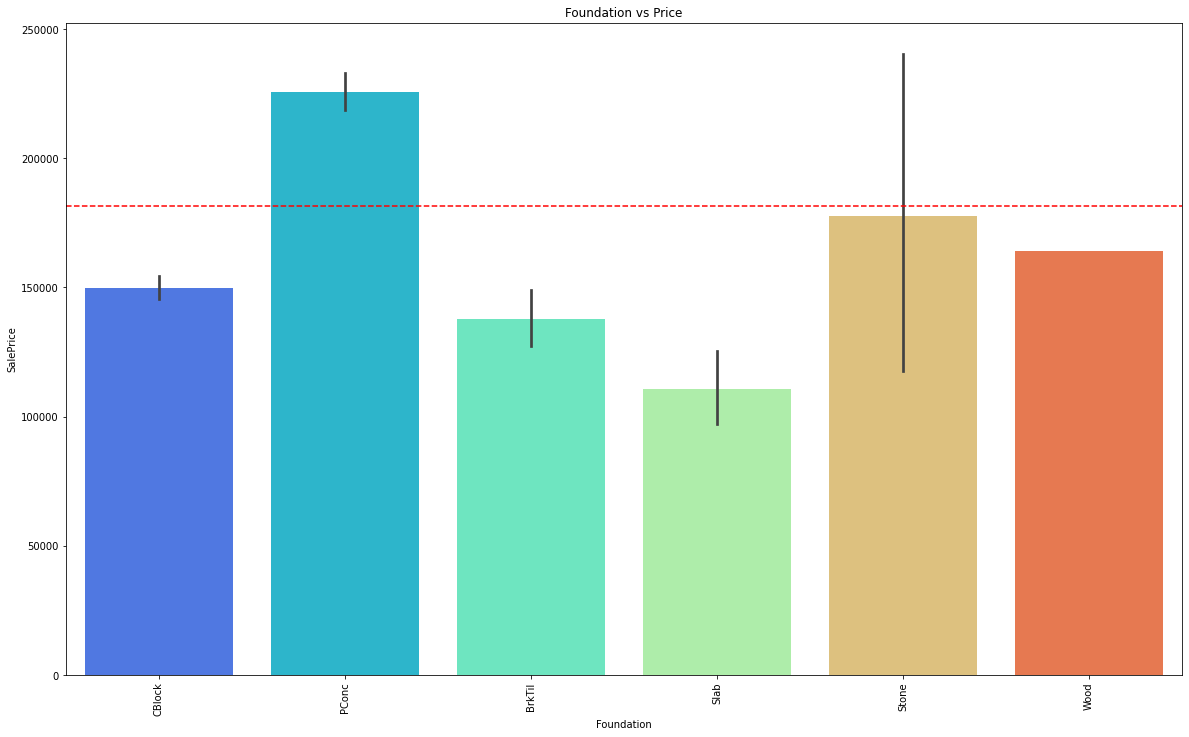

In [546]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.barplot(x="Foundation", y="SalePrice",data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("Foundation vs Price")
plt.xticks(rotation="vertical")
plt.show()

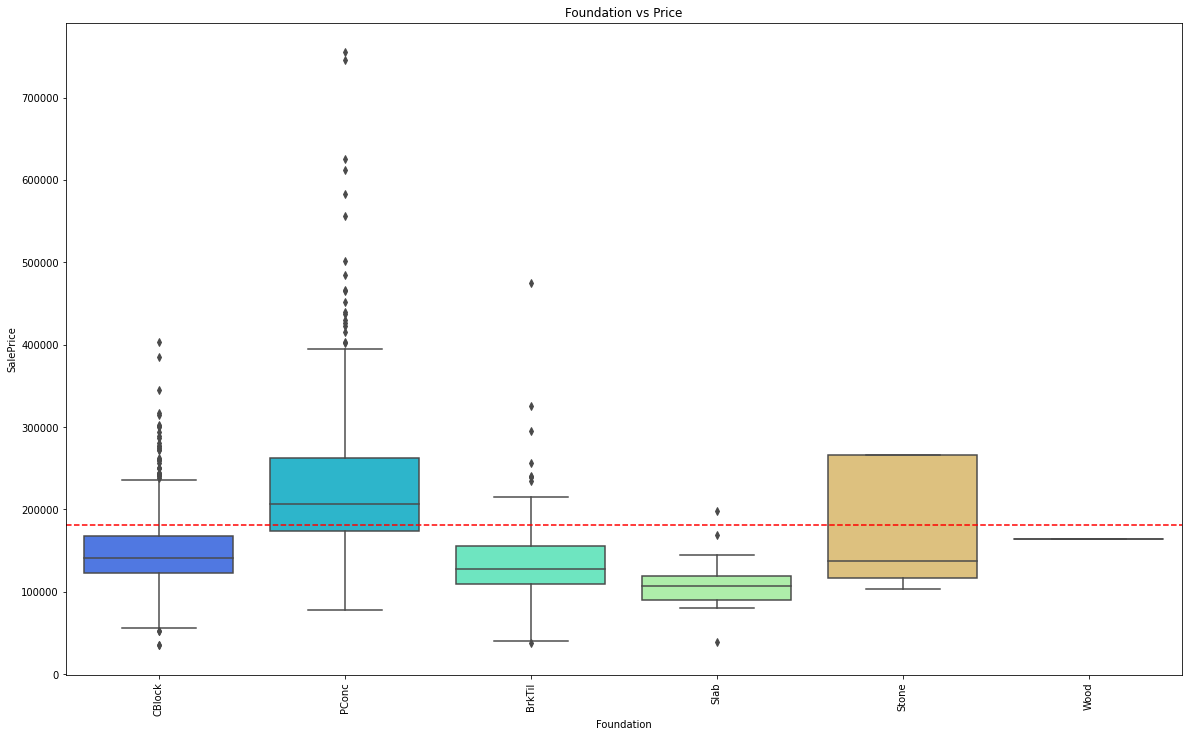

In [547]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.boxplot(x="Foundation", y="SalePrice",data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("Foundation vs Price")
plt.xticks(rotation="vertical")
plt.show()

The Houses which have basements PConc/Poured Contrete have highest mean price and slb type of basements houses have lowest price.

In [548]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Foundation"]=le.fit_transform(data["Foundation"])

In [549]:
data["BsmtQual"].fillna("No Basement")
data["BsmtCond"].fillna("No Basement")

Id
127             TA
889             Gd
793             TA
110             TA
422             TA
          ...     
289             TA
554    No Basement
196             TA
31              TA
617             TA
Name: BsmtCond, Length: 1168, dtype: object

In [550]:
exters=["BsmtQual", "BsmtCond"]
for i in exters:
    data[i]=data[i].replace({"Ex":5,"Gd":4, "TA":3, "Fa":2, "Po":1, "No Basement":0})

In [551]:
data["Basement"]=data["BsmtQual"]+data["BsmtCond"]

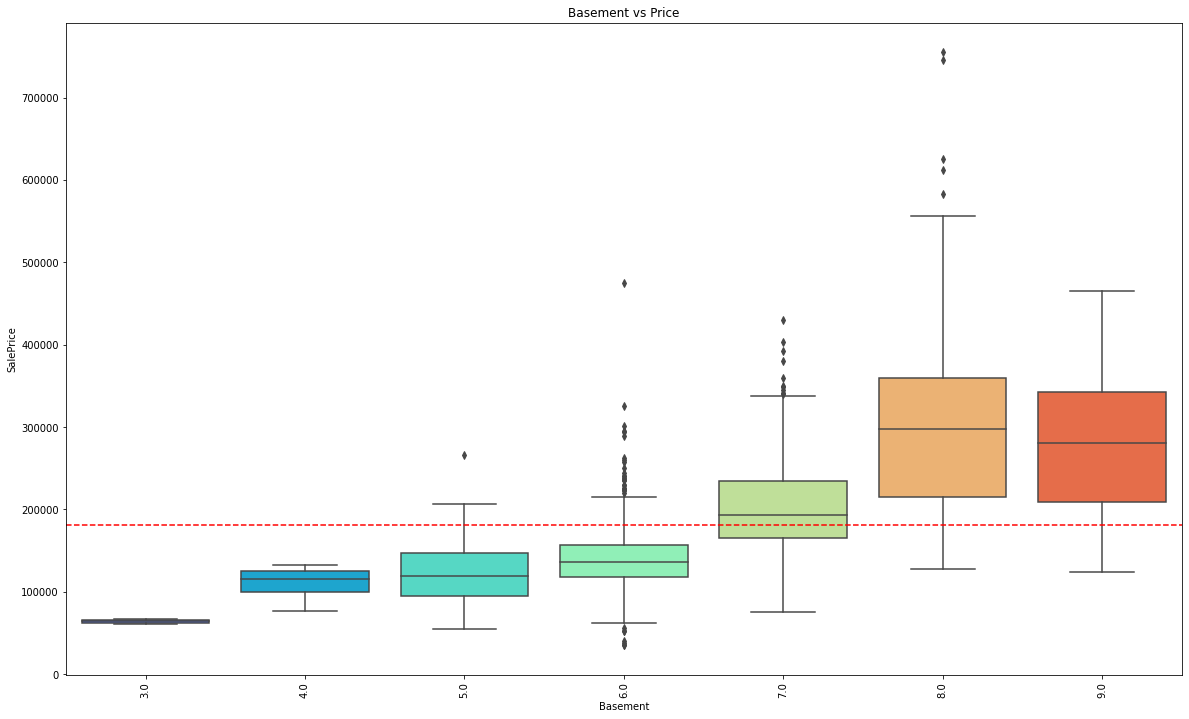

In [552]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.boxplot(x="Basement", y="SalePrice",data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.title("Basement vs Price")
plt.xticks(rotation="vertical")
plt.show()

In [553]:
data.drop(columns=["BsmtQual", "BsmtCond"], inplace=True)

In [554]:
data.drop(columns=["BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2"], inplace=True)

In [555]:
data.drop(columns=["BsmtUnfSF"], inplace=True)

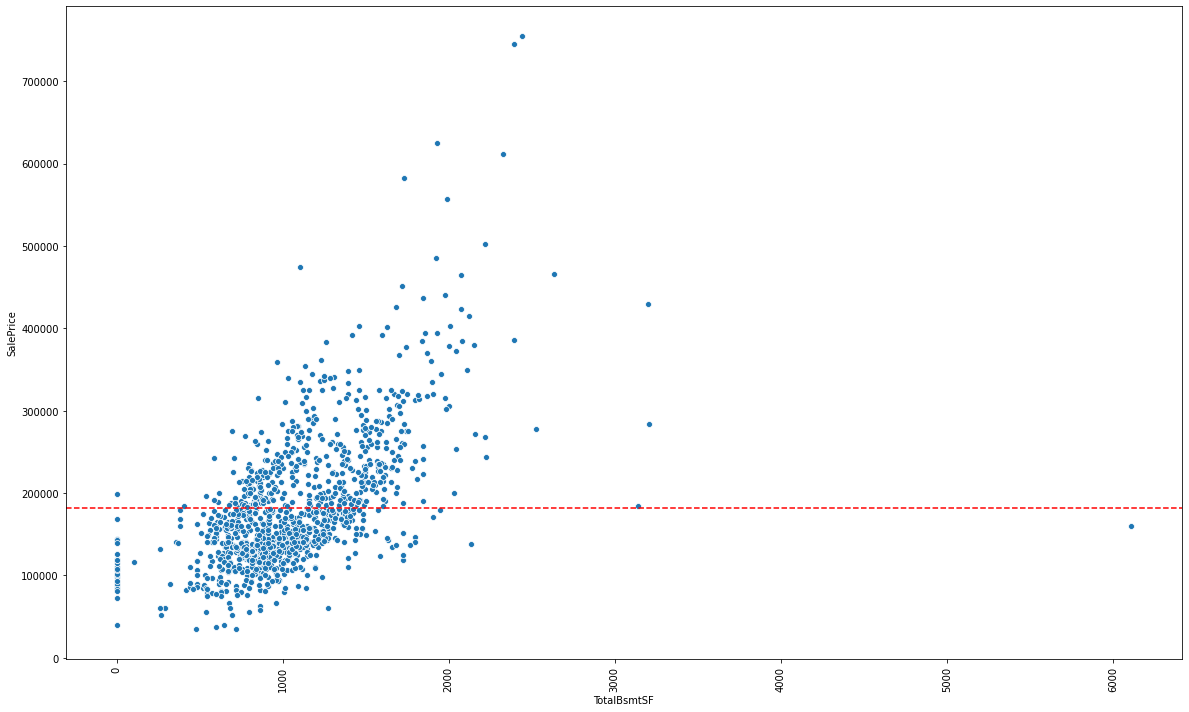

In [556]:
plt.figure(figsize=(20,12))
mean_price=np.mean(data["SalePrice"])
sns.scatterplot(x="TotalBsmtSF", y="SalePrice",data=data, palette="rainbow")
plt.axhline(mean_price, color="red", linestyle="dashed")
plt.xticks(rotation="vertical")
plt.show()

From the above scatterplot, we can interpret that TotalBsmtSF: Total square feet of basement area and Price both are positively correlated.

GasA     1143
GasW       14
Grav        5
Wall        4
OthW        1
Floor       1
Name: Heating, dtype: int64
                  mean     max     min  count           std
Heating                                                    
Floor     72500.000000   72500   72500      1           NaN
GasA     182591.394576  755000   34900   1143  79075.074121
GasW     167312.785714  265979   87000     14  58814.789318
Grav      70080.000000  121000   37900      5  32088.268884
OthW     129500.000000  129500  129500      1           NaN
Wall      92100.000000   98000   87500      4   4509.988914


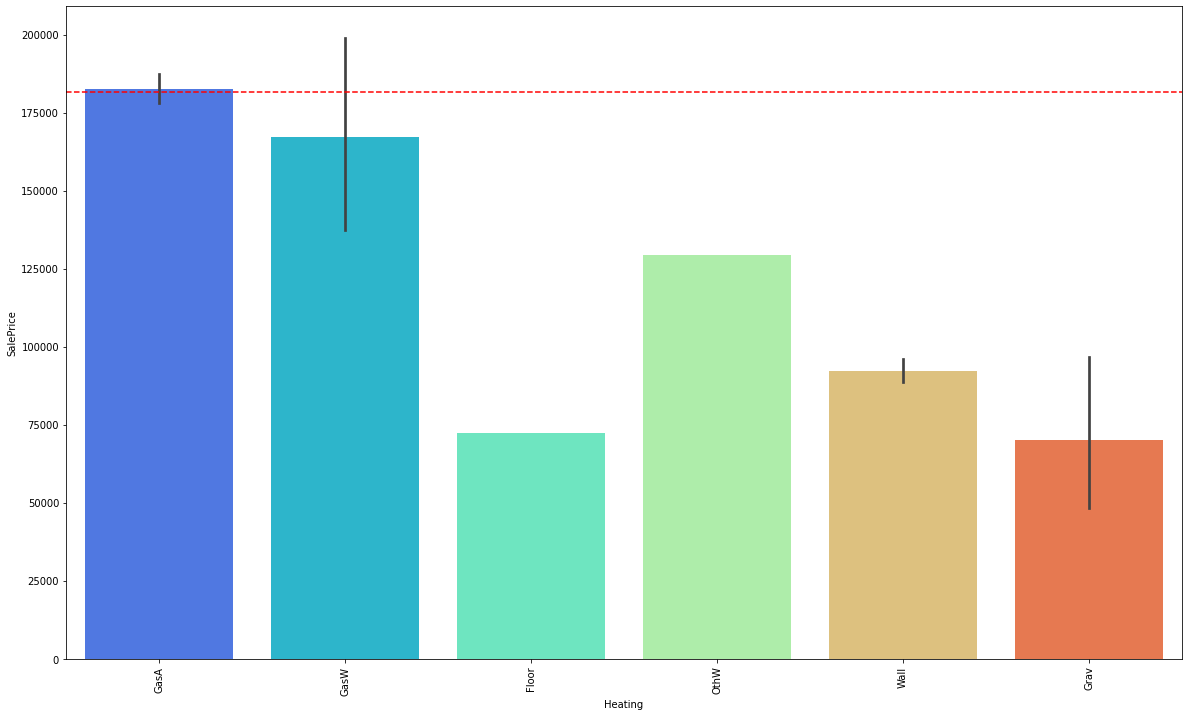

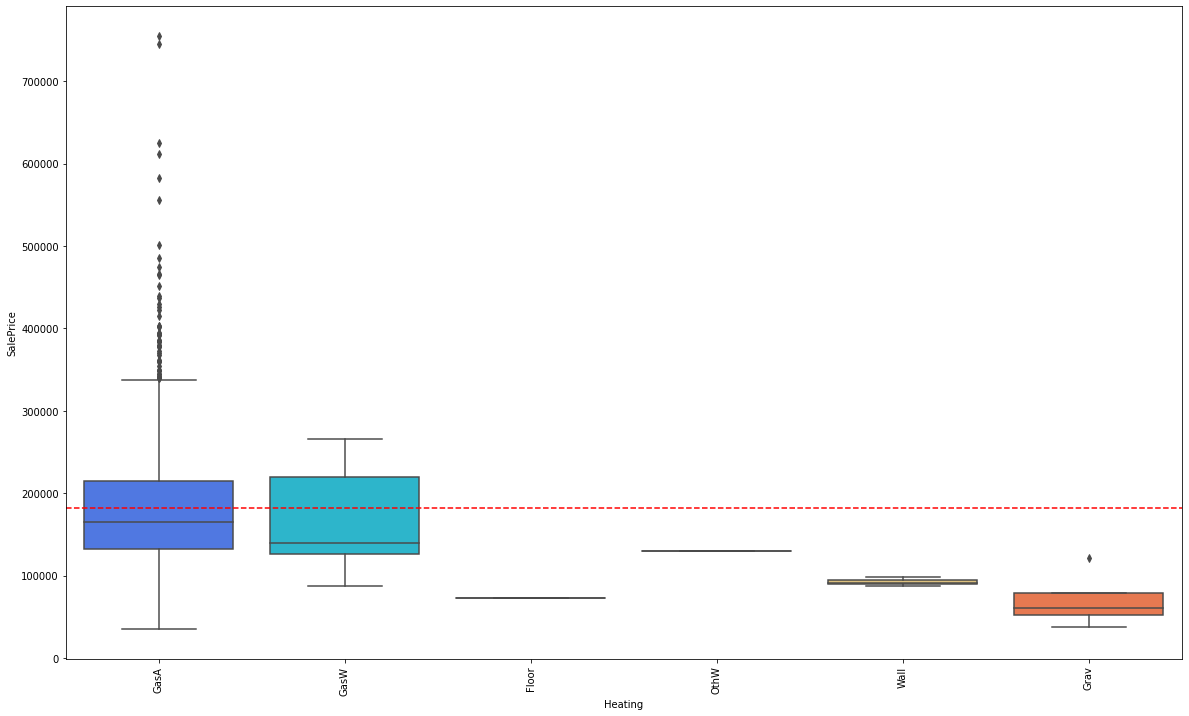

In [557]:
    print(data["Heating"].value_counts())
    print(data.groupby("Heating")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="Heating", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="Heating", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

 The houses with GasA/Gas forced warm air furnace type of Heating have fetched more prices than any other type of heating type.

In [558]:
data.drop(columns=["Heating"], inplace=True)

Y    1090
N      78
Name: CentralAir, dtype: int64
                     mean     max    min  count           std
CentralAir                                                   
N           108539.576923  265979  34900     78  43365.515514
Y           186696.381651  755000  52000   1090  78515.155138


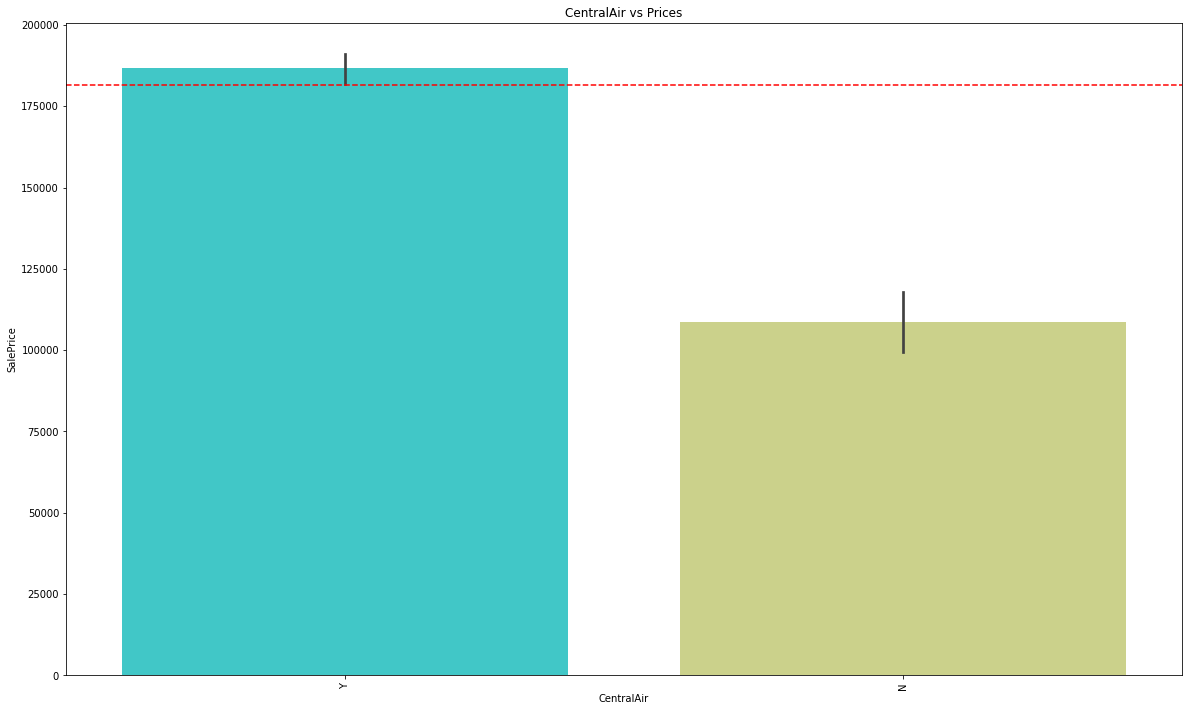

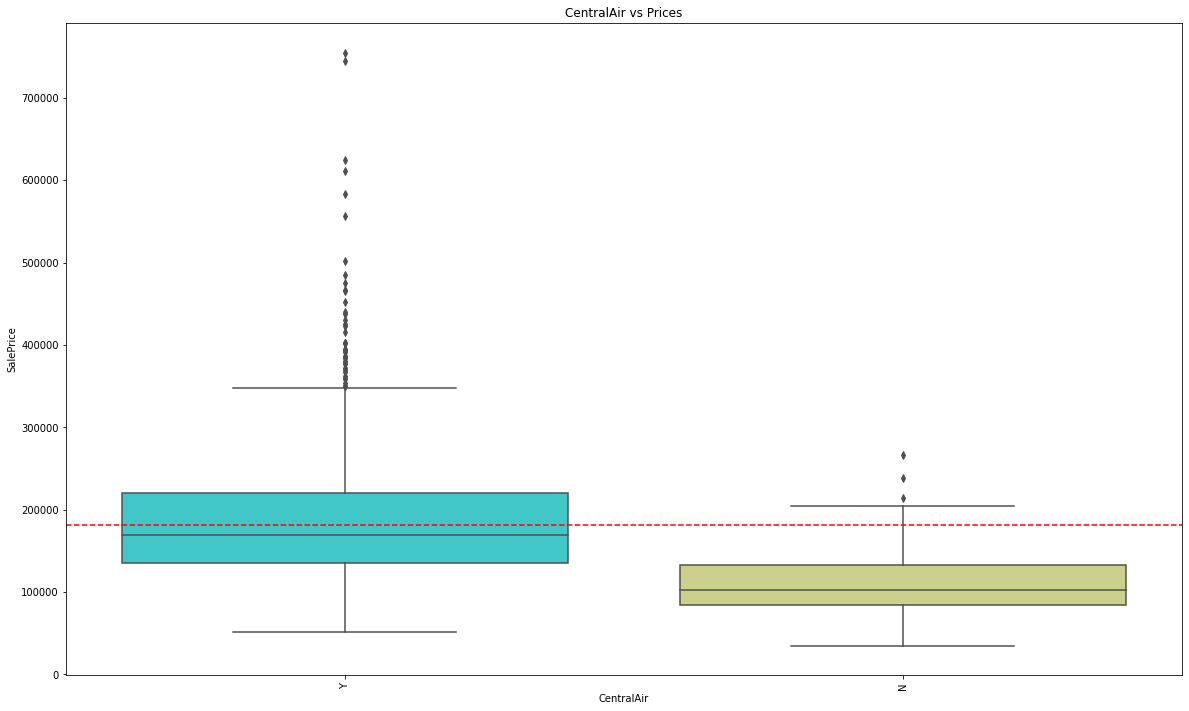

In [559]:
    print(data["CentralAir"].value_counts())
    print(data.groupby("CentralAir")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="CentralAir", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.title("CentralAir vs Prices")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="CentralAir", y="SalePrice",data=data, palette="rainbow")
    plt.title("CentralAir vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

The houses eith Central Air Conditioning has more prices.

In [560]:
data["CentralAir"]=data.CentralAir.replace({"N":0,"Y":1})

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64
                     mean     max    min  count           std
Electrical                                                   
FuseA       121840.986486  239000  34900     74  39516.474161
FuseF       109611.285714  169500  39300     21  32523.797591
FuseP       109500.000000  137000  82000      2  38890.872965
Mix          67000.000000   67000  67000      1           NaN
SBrkr       187253.339252  755000  37900   1070  79375.857149


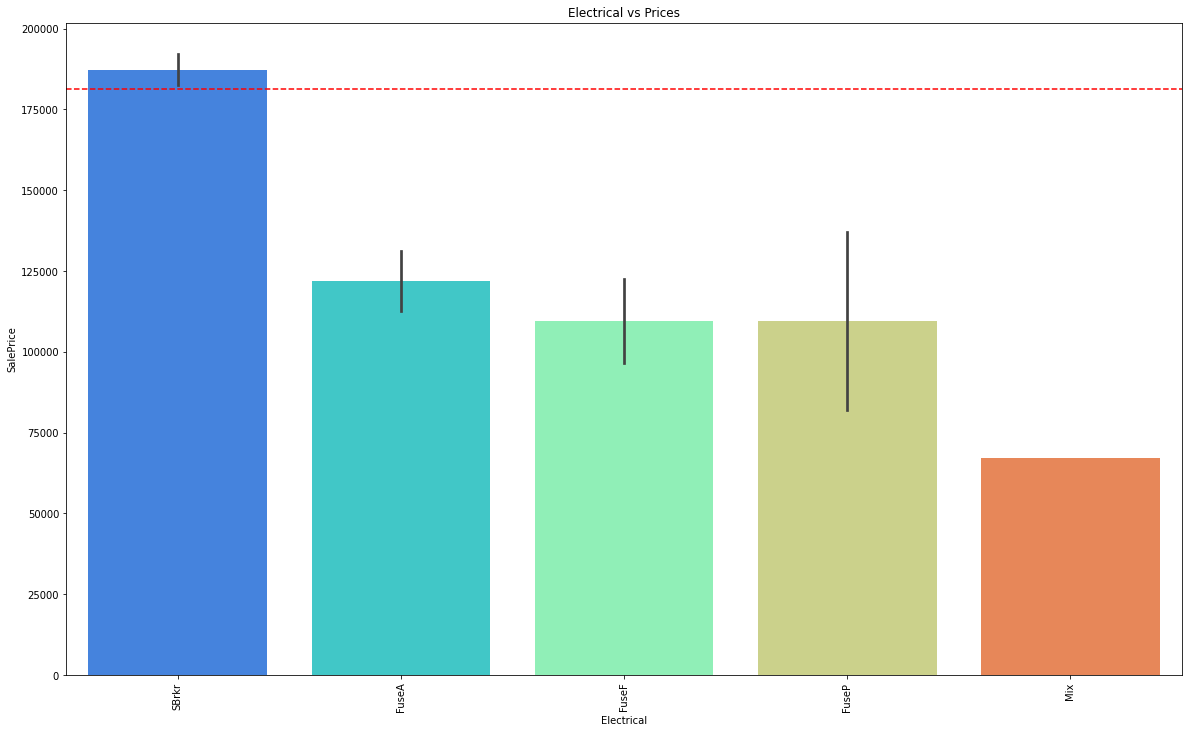

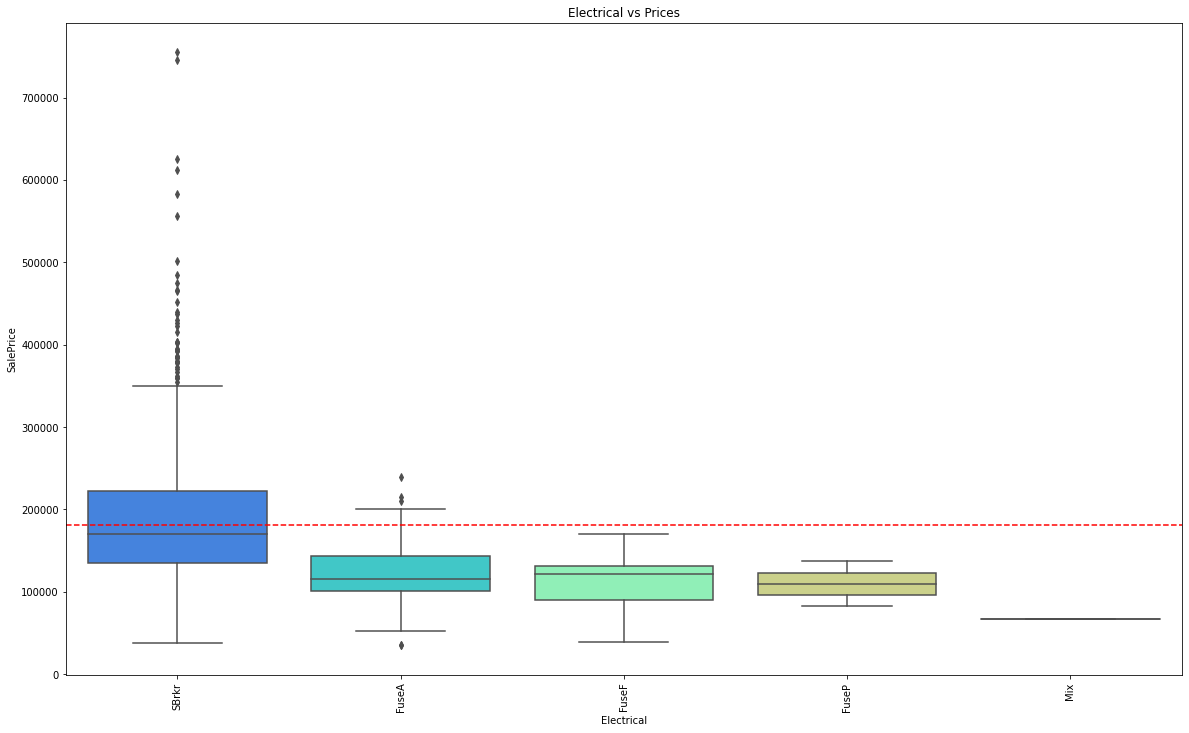

In [561]:
    print(data["Electrical"].value_counts())
    print(data.groupby("Electrical")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="Electrical", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.title("Electrical vs Prices")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="Electrical", y="SalePrice",data=data, palette="rainbow")
    plt.title("Electrical vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

The Standard Circuit Breakers & Romex Electrical system contained houses have highest mean prices and the no of the data points also showing us it's popularity. In the other hand Mix type of Electric system are very less popular so, it has very low price.

In [562]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Electrical"]=le.fit_transform(data["Electrical"])

In [563]:
data["All Floor Sqft"]=data["1stFlrSF"]+data["2ndFlrSF"]

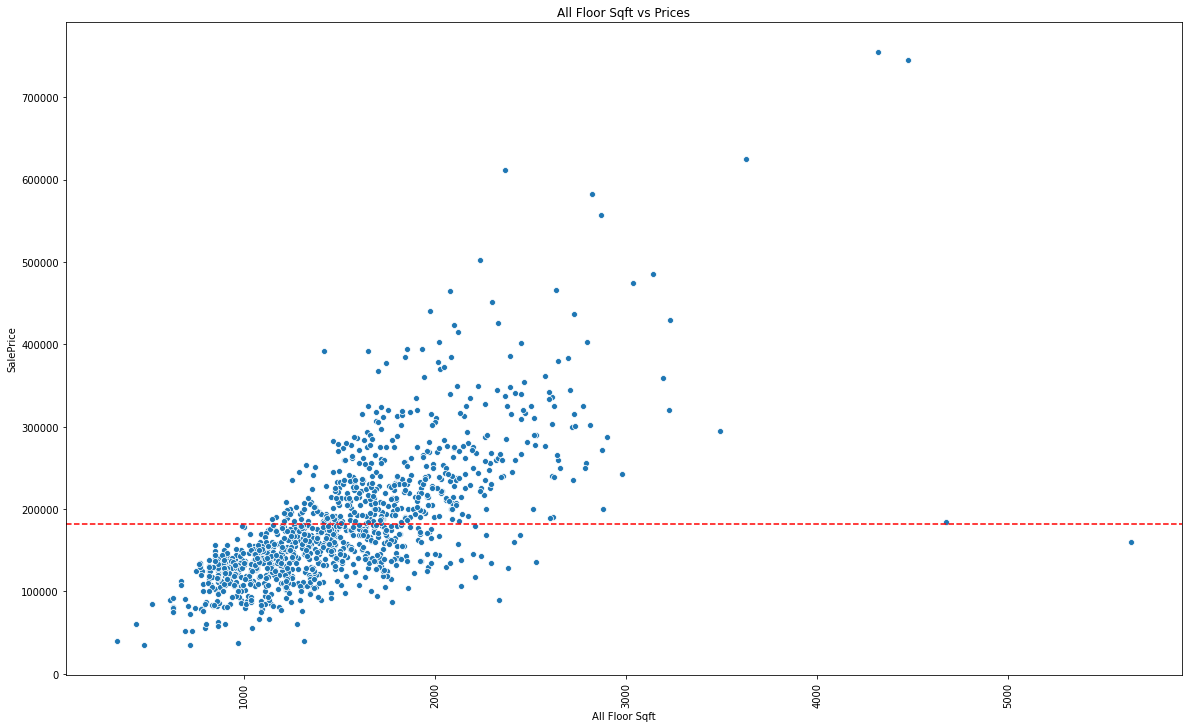

In [564]:
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.scatterplot(x="All Floor Sqft", y="SalePrice",data=data, palette="rainbow")
    plt.title("All Floor Sqft vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

<font color=blue> All floor sqft is positively correlated with price.</font>

In [565]:
data.drop(columns=["1stFlrSF", "2ndFlrSF"], inplace=True)

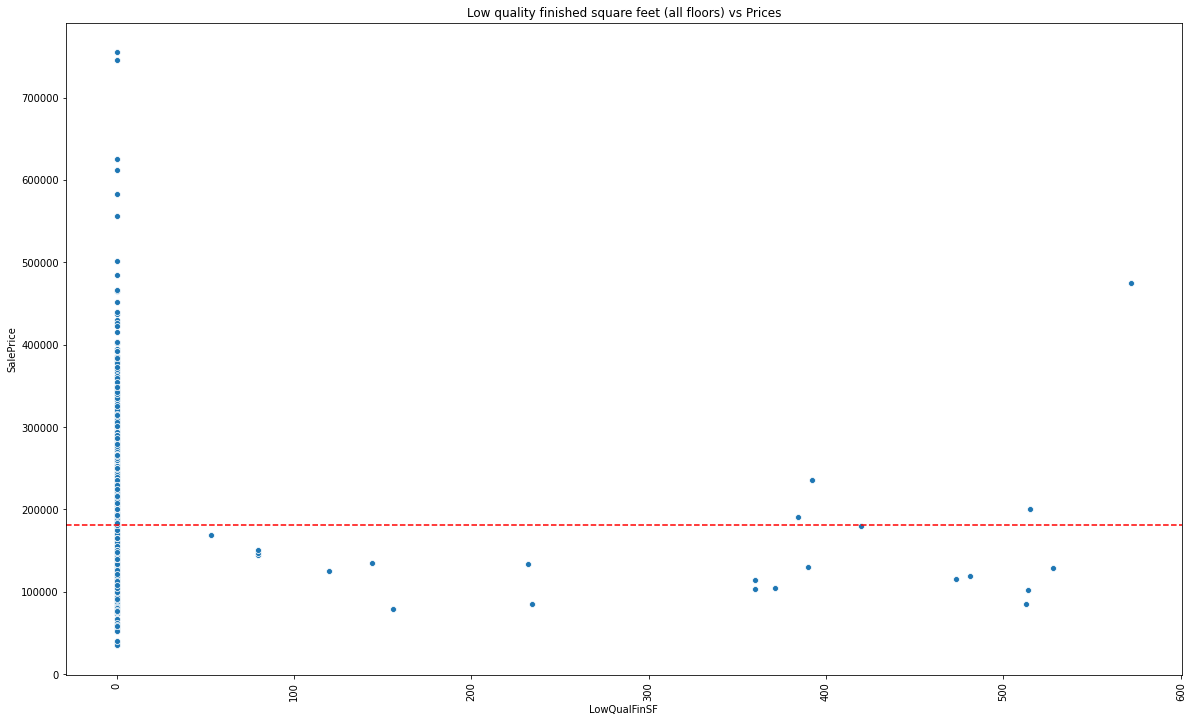

In [566]:
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.scatterplot(x="LowQualFinSF", y="SalePrice",data=data, palette="rainbow")
    plt.title("Low quality finished square feet (all floors) vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

In [567]:
data.drop(columns=["LowQualFinSF"], inplace=True)

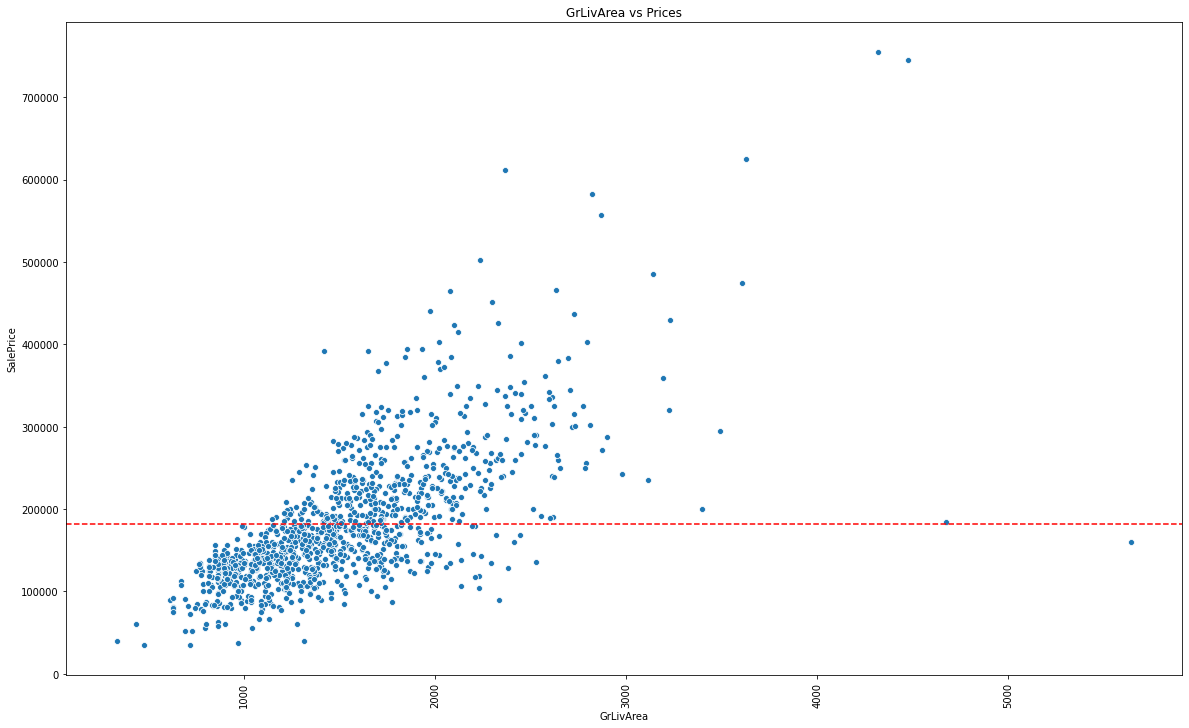

In [568]:
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.scatterplot(x="GrLivArea", y="SalePrice",data=data, palette="rainbow")
    plt.title("GrLivArea vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

In [569]:
data["Bathrooms in Basement(half&full)"]=data["BsmtFullBath"]+data["BsmtHalfBath"]

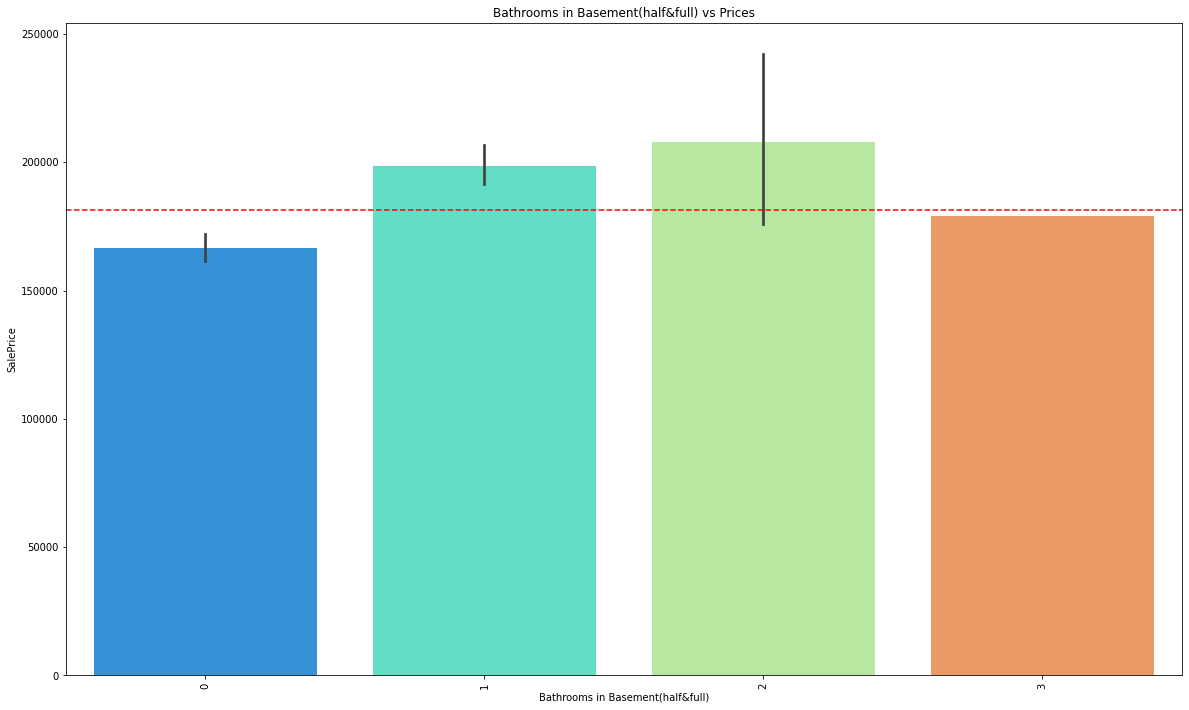

In [570]:
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="Bathrooms in Basement(half&full)", y="SalePrice",data=data, palette="rainbow")
    plt.title("Bathrooms in Basement(half&full) vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

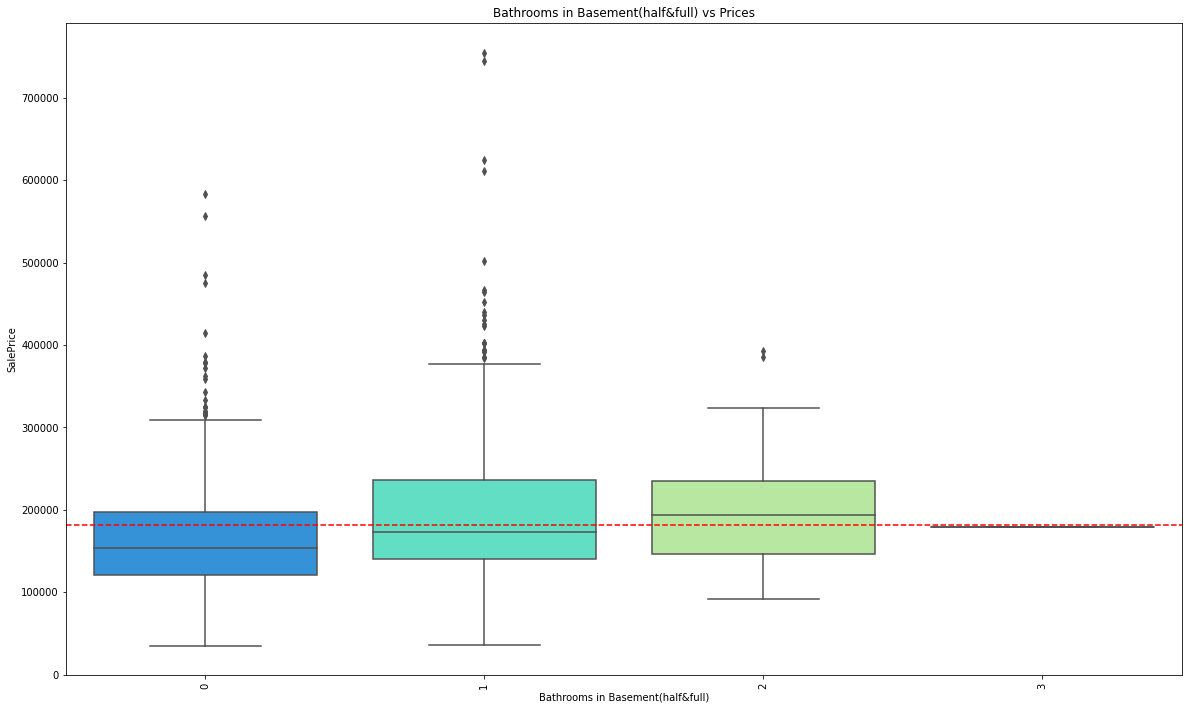

In [571]:
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="Bathrooms in Basement(half&full)", y="SalePrice",data=data, palette="rainbow")
    plt.title("Bathrooms in Basement(half&full) vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

So from the above barplot we can say that the houses with 2 bathrooms (half and full) have higher mean price.

In [572]:
data.drop(columns=["BsmtFullBath", "BsmtHalfBath"], inplace=True)

In [573]:
data["Bathrooms above ground(half&full)"]=data["FullBath"]+data["HalfBath"]

2    494
1    373
3    282
4     18
0      1
Name: Bathrooms above ground(half&full), dtype: int64


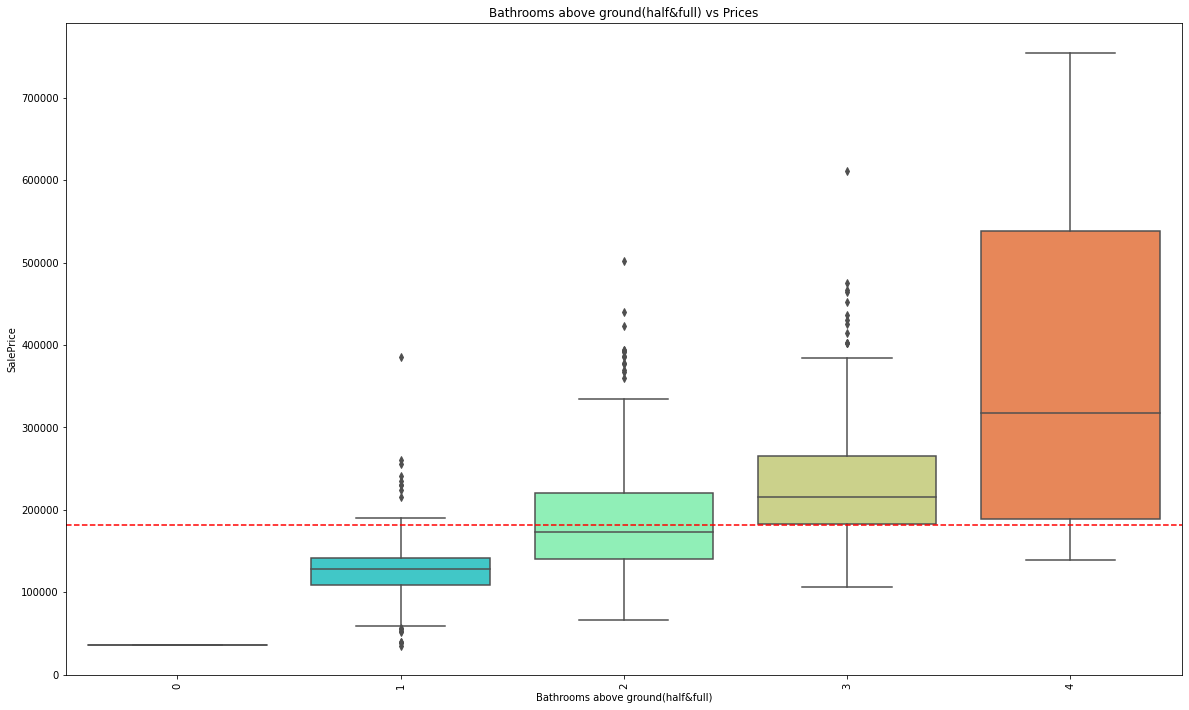

In [574]:
    print(data["Bathrooms above ground(half&full)"].value_counts())
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="Bathrooms above ground(half&full)", y="SalePrice",data=data, palette="rainbow")
    plt.title("Bathrooms above ground(half&full) vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

From the above plot we can say that the price is increasing with the no of bathrooms (half and full) above ground. So, 4 no of bathrooms houses have higher average prices than others. 

In [575]:
data.drop(columns=["FullBath", "HalfBath"], inplace=True)

3    640
2    281
4    180
1     39
5     18
6      5
0      4
8      1
Name: BedroomAbvGr, dtype: int64
                       mean     max     min  count            std
BedroomAbvGr                                                     
0             259989.750000  385000  108959      4  114184.621353
1             183698.333333  501837   35311     39  111370.959075
2             158287.313167  611657   34900    281   76266.252236
3             180211.681250  451950   40000    640   62043.250579
4             221046.583333  755000   87000    180  109354.508485
5             183027.777778  320000   81000     18   73505.196339
6             132770.600000  142953  119000      5   10382.787285
8             200000.000000  200000  200000      1            NaN


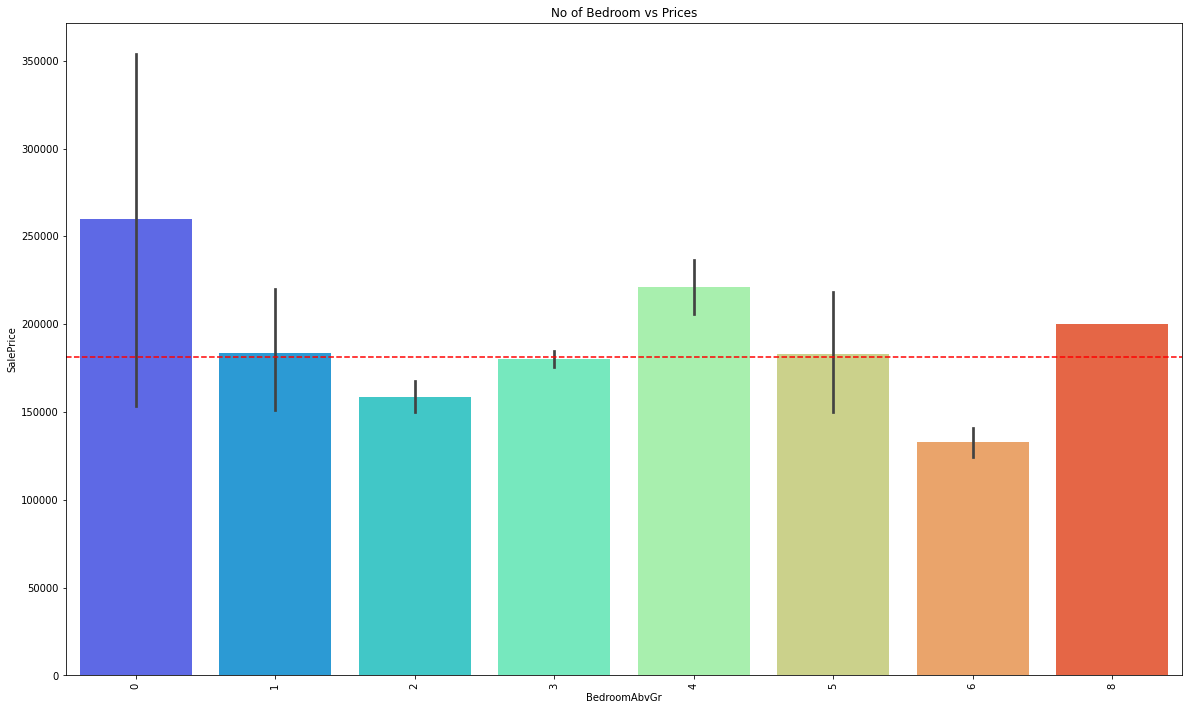

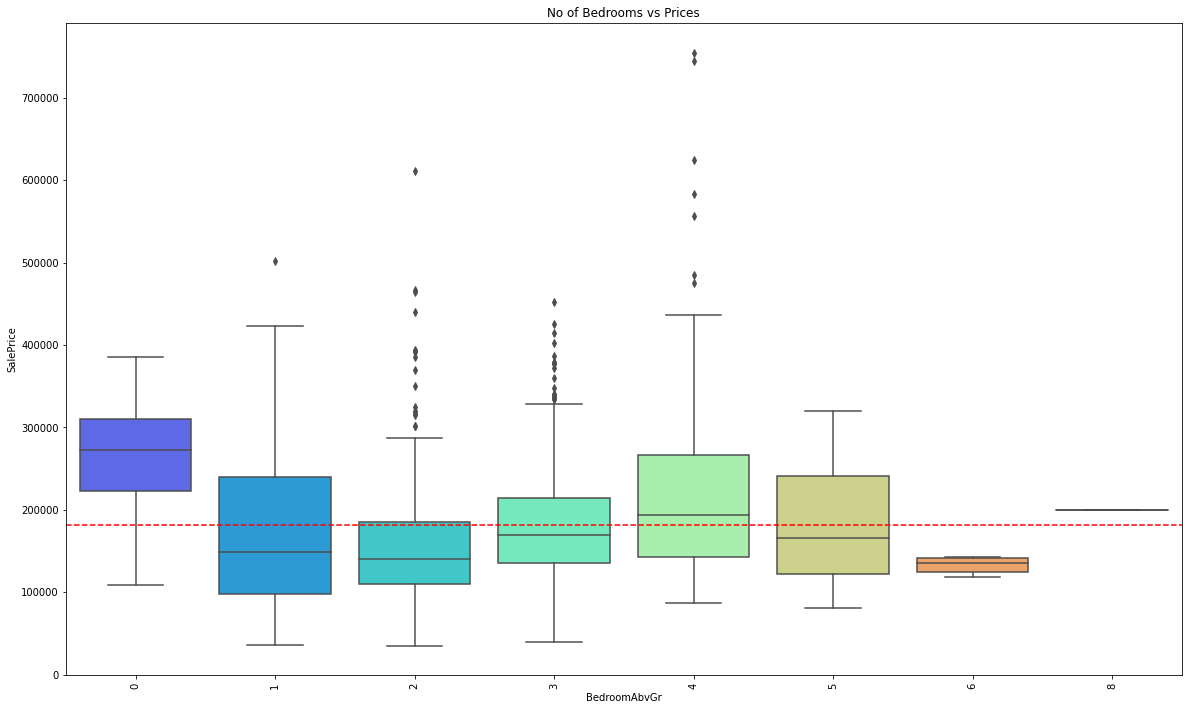

In [576]:
    print(data["BedroomAbvGr"].value_counts())
    print(data.groupby("BedroomAbvGr")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="BedroomAbvGr", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.title("No of Bedroom vs Prices")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="BedroomAbvGr", y="SalePrice",data=data, palette="rainbow")
    plt.title("No of Bedrooms vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

The no of houses with 3 bedrooms above grade(ground) are most in number but the mean price is highest with no bedrooms above grade also the no of houses with zero bedrooms are only 4 in our dataset. in general, 4 no of bedrooms houses have very good price than others.

1    1114
2      52
3       1
0       1
Name: KitchenAbvGr, dtype: int64
                       mean     max     min  count           std
KitchenAbvGr                                                    
0             127500.000000  127500  127500      1           NaN
1             183874.051167  755000   34900   1114  79952.107481
2             132614.423077  206300   82000     52  30962.040961
3             106000.000000  106000  106000      1           NaN


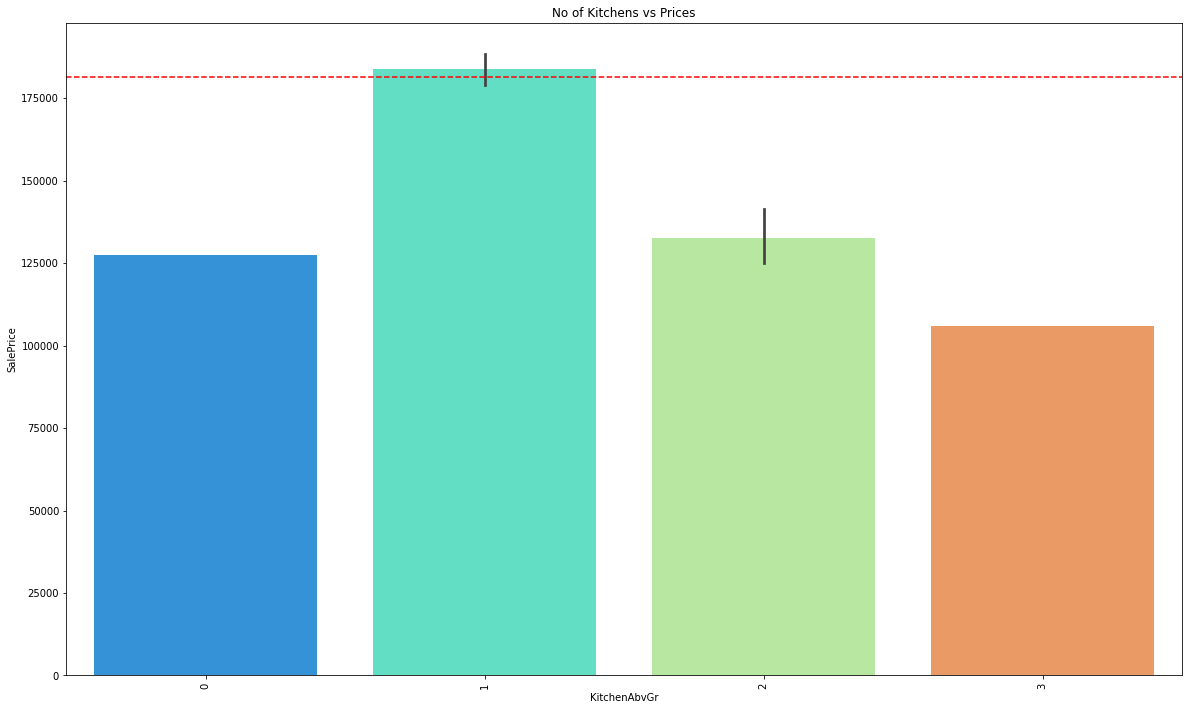

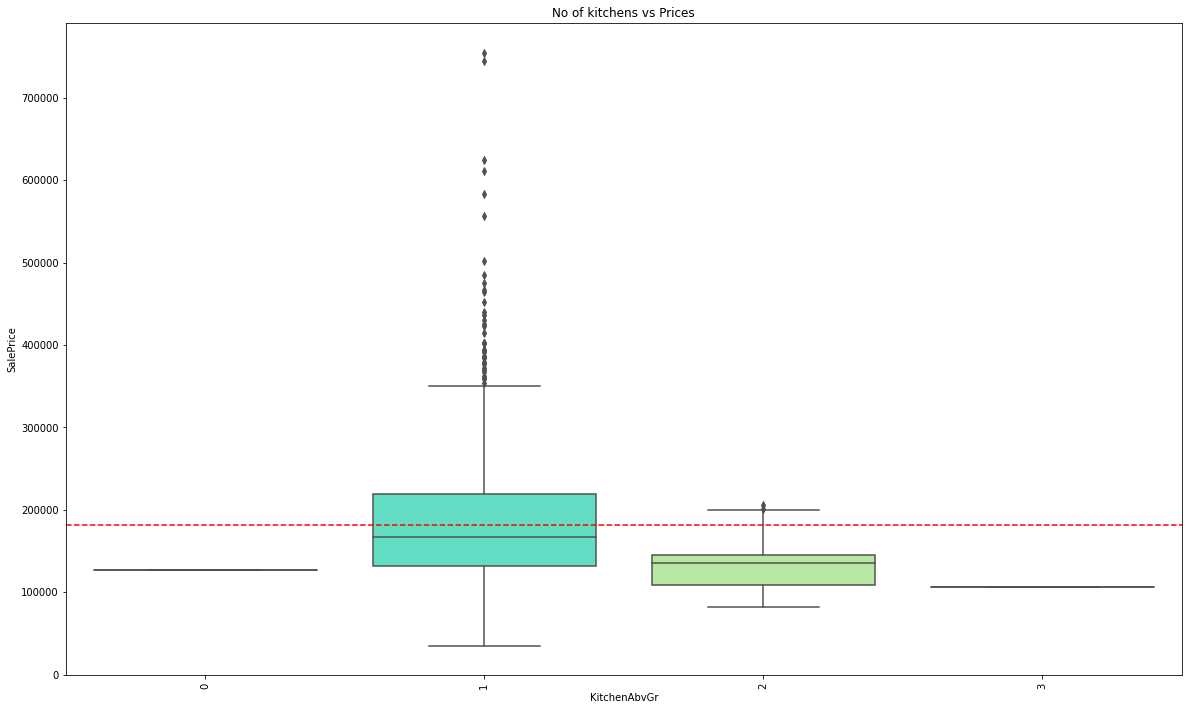

In [577]:
    print(data["KitchenAbvGr"].value_counts())
    print(data.groupby("KitchenAbvGr")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="KitchenAbvGr", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.title("No of Kitchens vs Prices")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="KitchenAbvGr", y="SalePrice",data=data, palette="rainbow")
    plt.title("No of kitchens vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

In [578]:
data.drop(columns="KitchenAbvGr", inplace=True)

In [579]:
k=["KitchenQual"]
for i in k:
    data[i]=data[i].replace({"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1})

3    578
4    478
5     82
2     30
Name: KitchenQual, dtype: int64
                      mean     max    min  count            std
KitchenQual                                                    
2            105028.100000  200000  39300     30   35798.061429
3            140206.313149  359100  34900    578   38856.924554
4            211076.234310  625000  79000    478   62083.036263
5            327812.329268  755000  92000     82  122792.453991


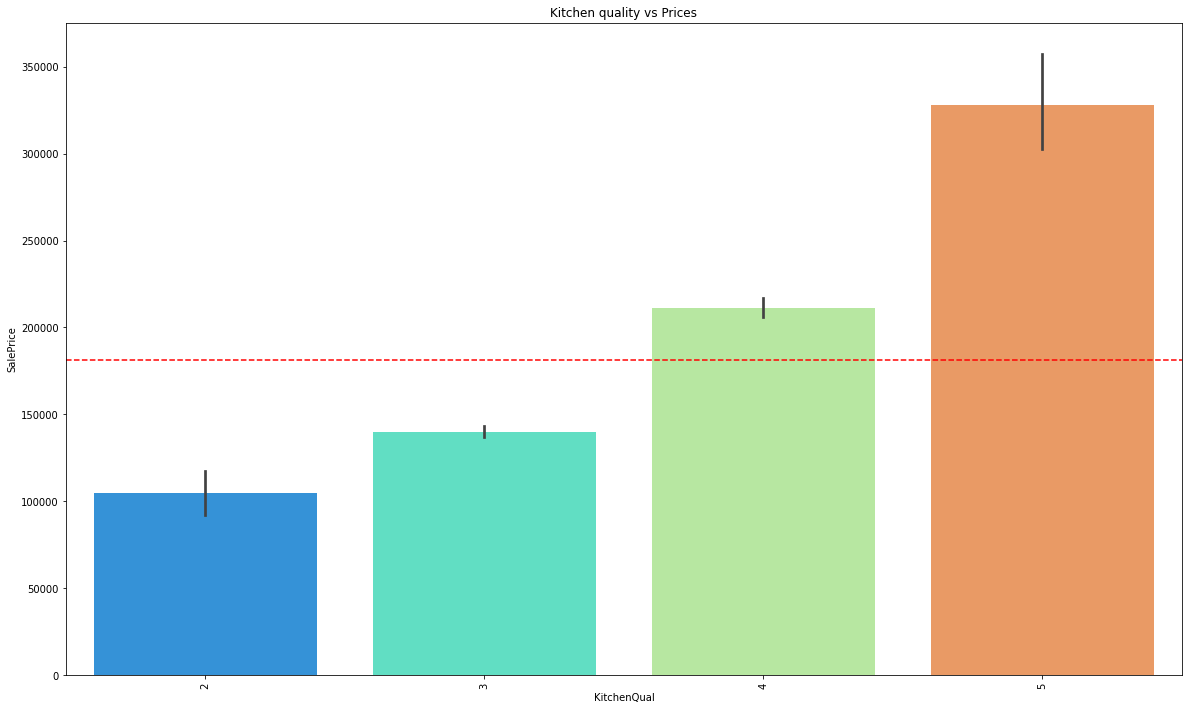

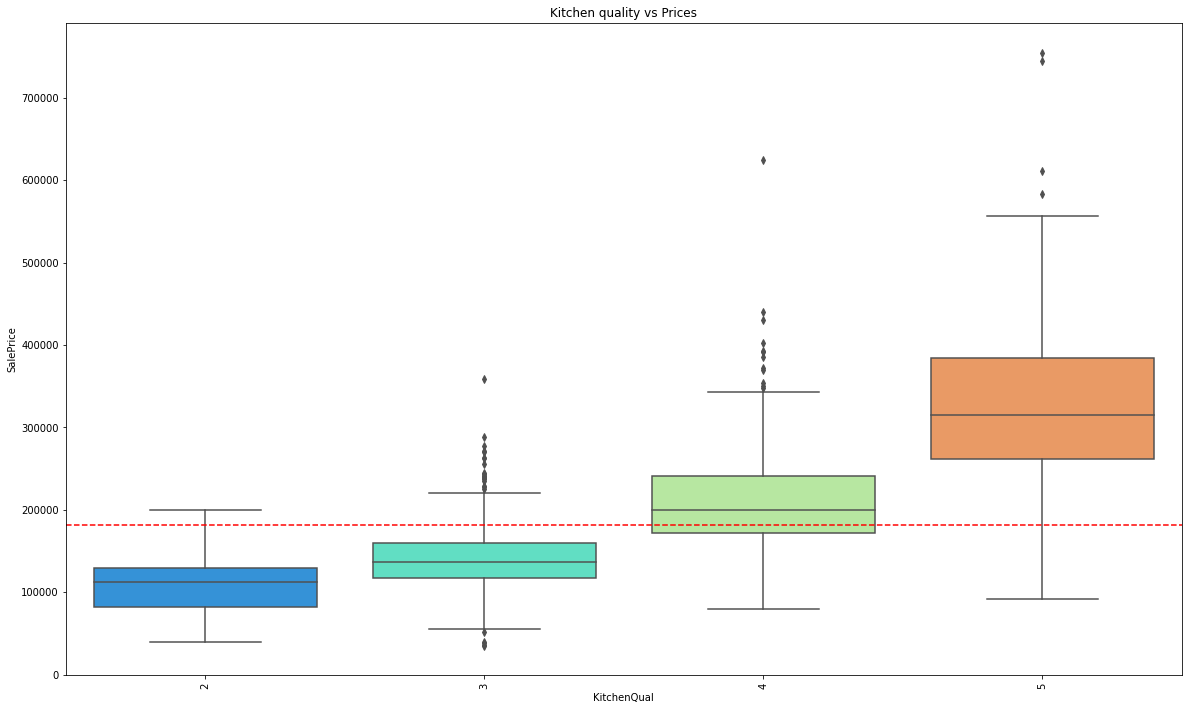

In [580]:
    print(data["KitchenQual"].value_counts())
    print(data.groupby("KitchenQual")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="KitchenQual", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.title("Kitchen quality vs Prices")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="KitchenQual", y="SalePrice",data=data, palette="rainbow")
    plt.title("Kitchen quality vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

6     325
7     268
5     217
8     148
4      72
9      65
10     41
11     13
3      11
12      6
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64
                       mean     max     min  count            std
TotRmsAbvGrd                                                     
2              39300.000000   39300   39300      1            NaN
3             104672.727273  155900   60000     11   34211.667335
4             126024.013889  260000   34900     72   44870.816866
5             142657.170507  392500   52000    217   50626.352429
6             159503.027692  325000   37900    325   46614.657040
7             198912.757463  465000   89471    268   65385.116868
8             210583.783784  466500   81000    148   72732.361273
9             250270.969231  501837   98000     65   82238.742292
10            290727.829268  755000   90000     41  154826.688683
11            326328.076923  611657  106000     13  146682.027981
12            300147.666667  582933  142953      6  184

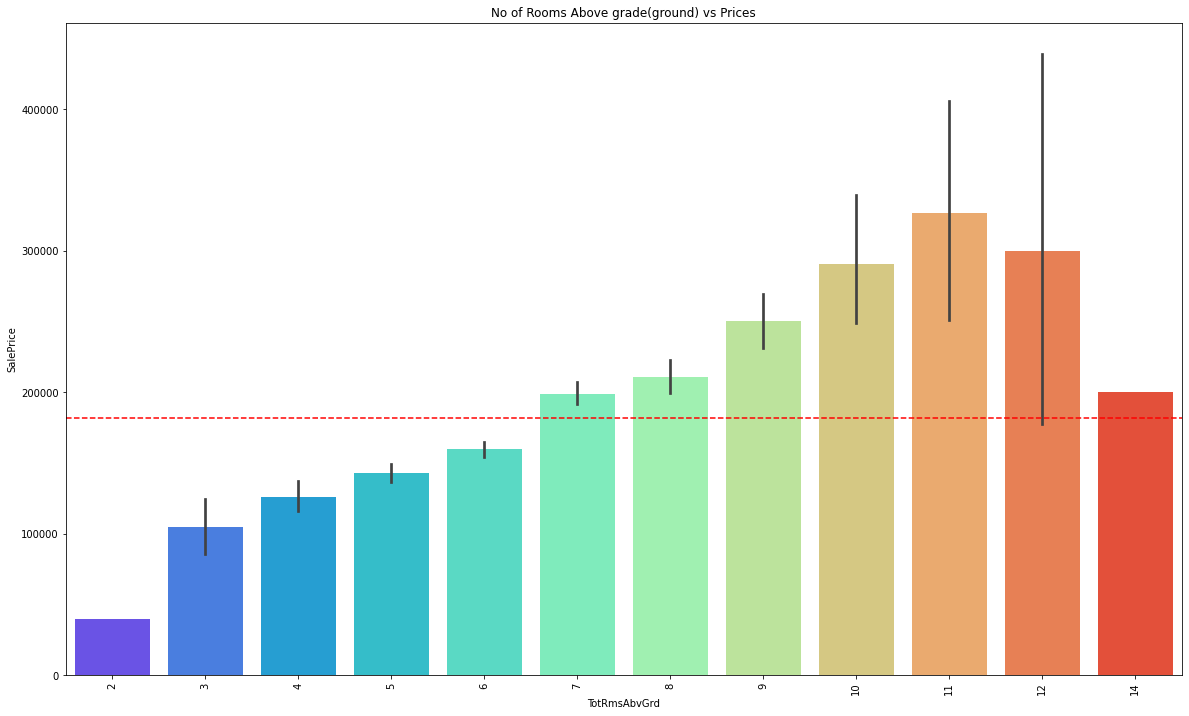

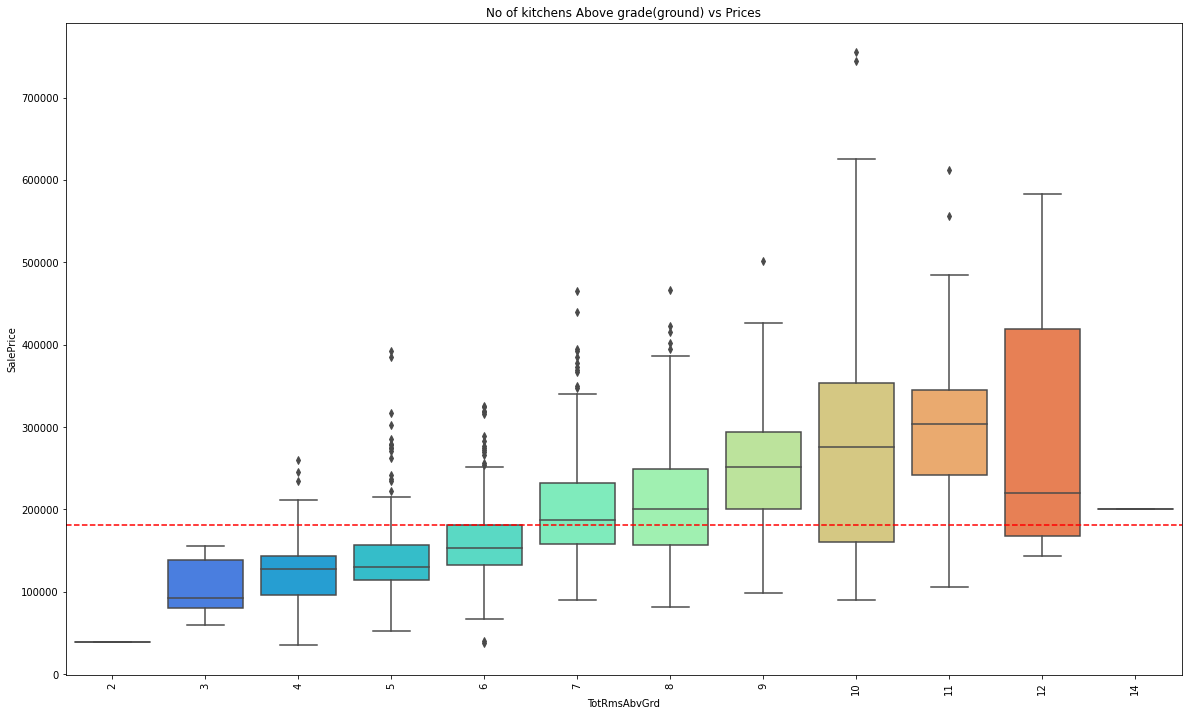

In [581]:
    print(data["TotRmsAbvGrd"].value_counts())
    print(data.groupby("TotRmsAbvGrd")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="TotRmsAbvGrd", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.title("No of Rooms Above grade(ground) vs Prices")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="TotRmsAbvGrd", y="SalePrice",data=data, palette="rainbow")
    plt.title("No of kitchens Above grade(ground) vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

From the above plot we can interpret that the price of the house is increasing with the increment of no of the rooms above grade in the house. Mean price of the house is maximum where the house has 11 nos of rooms. Most of the houses have 6 nos. of room. 

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64
                     mean     max     min  count           std
Functional                                                    
Maj1        151443.090909  315000   60000     11  71816.741955
Maj2         86000.000000  115000   52000      4  31272.991542
Min1        152630.000000  256000   88000     25  38446.743469
Min2        146841.666667  316600   87000     30  43010.904959
Mod         145241.666667  256000   60000     12  61558.330923
Sev         129000.000000  129000  129000      1           NaN
Typ         184204.948387  755000   34900   1085  80288.047638


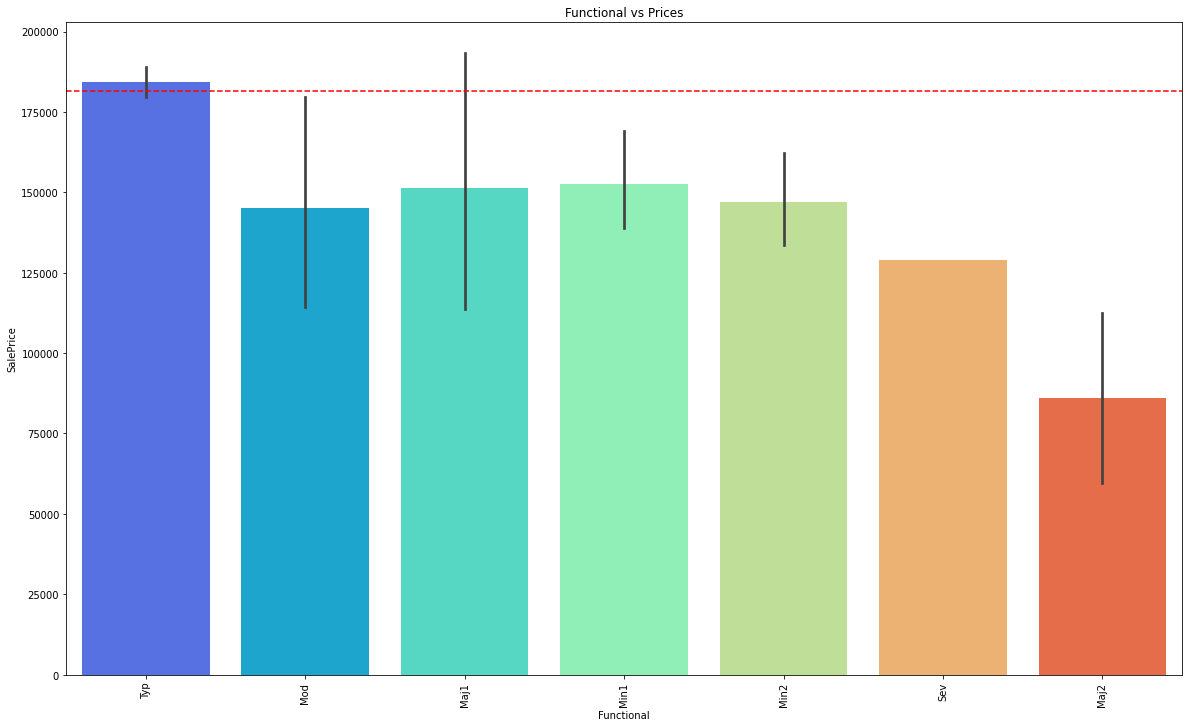

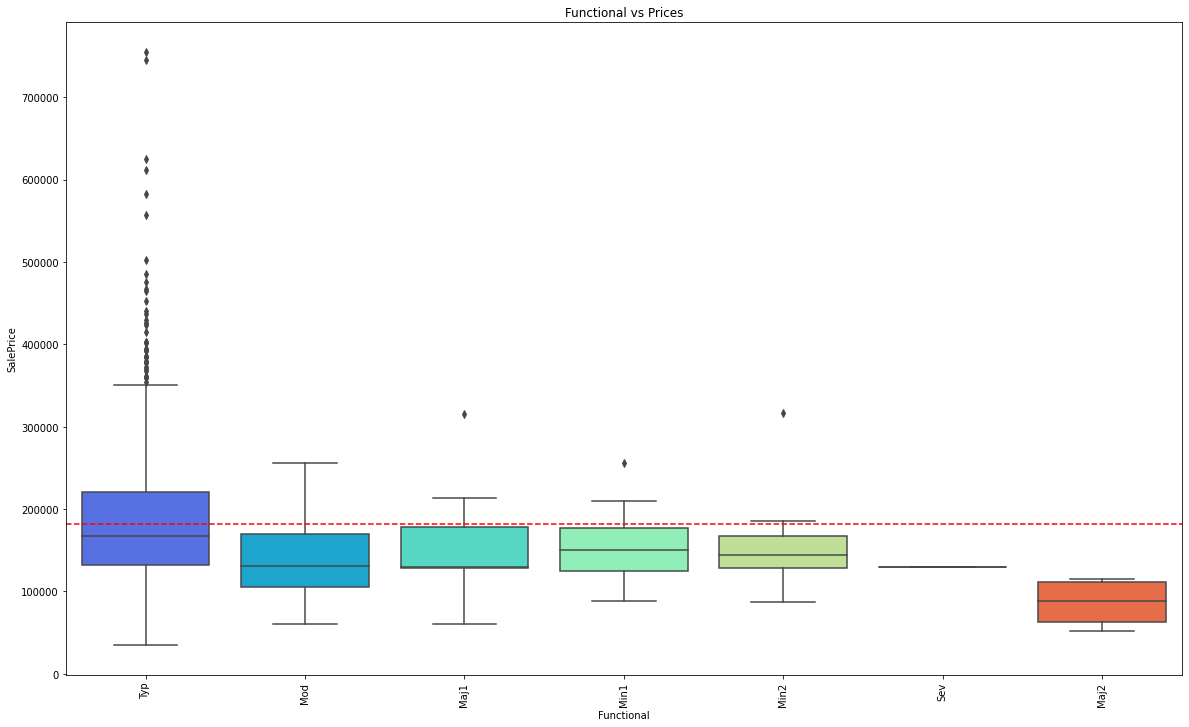

In [582]:
    print(data["Functional"].value_counts())
    print(data.groupby("Functional")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="Functional", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.title("Functional vs Prices")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="Functional", y="SalePrice",data=data, palette="rainbow")
    plt.title("Functional vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

In [583]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Functional"]=le.fit_transform(data["Functional"])

In [584]:
data["FireplaceQu"]=data["FireplaceQu"].fillna("NA")

In [585]:
cols=["FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]
for i in cols:
    data[i].replace ({"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}, inplace=True)

In [586]:
data["Fireplace(No+Qlty)"]=(data["Fireplaces"]+data["FireplaceQu"])

0    551
5    302
4    208
6     60
3     22
2     18
7      6
8      1
Name: Fireplace(No+Qlty), dtype: int64
                             mean     max     min  count            std
Fireplace(No+Qlty)                                                     
0                   142411.822142  342643   34900    551   44837.288471
2                   131487.944444  172000   60000     18   31659.370022
3                   162447.727273  262000  117000     22   33247.450591
4                   205322.408654  625000   91500    208   62070.439699
5                   221493.423841  745000   90350    302   88878.261224
6                   256956.116667  611657  130500     60  107311.625804
7                   363359.000000  755000  160000      6  216445.855784
8                   360000.000000  360000  360000      1            NaN


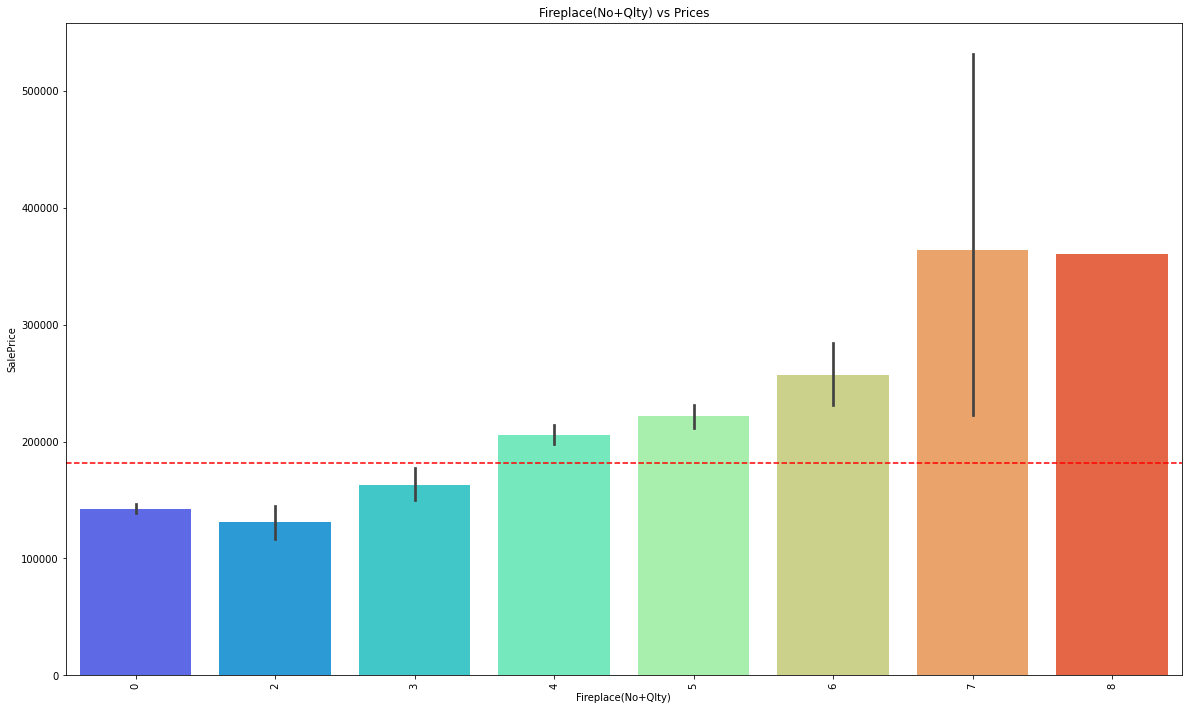

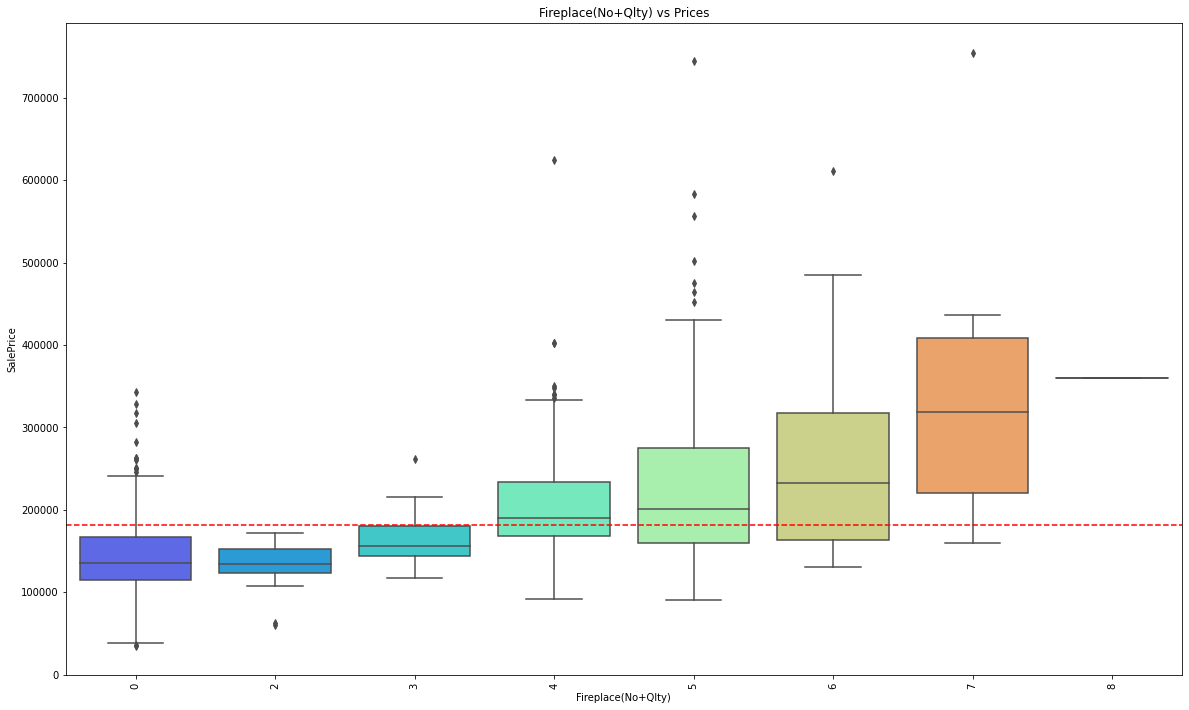

In [587]:
    print(data["Fireplace(No+Qlty)"].value_counts())
    print(data.groupby("Fireplace(No+Qlty)")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="Fireplace(No+Qlty)", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.title("Fireplace(No+Qlty) vs Prices")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="Fireplace(No+Qlty)", y="SalePrice",data=data, palette="rainbow")
    plt.title("Fireplace(No+Qlty) vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

The new Fireplace variable is sum of no. of fireplaces and fireplace quality which clearly shows that the total marks is positively correlated with the price of the housing.

In [588]:
data.drop(columns=["Fireplaces", "FireplaceQu"], inplace=True)

In [589]:
data["GarageType"]=data["GarageType"].fillna("No Garage")

Attchd       691
Detchd       314
BuiltIn       70
No Garage     64
Basment       16
CarPort        8
2Types         5
Name: GarageType, dtype: int64
                     mean     max    min  count           std
GarageType                                                   
2Types      144200.000000  171000  87000      5  33877.721293
Attchd      203675.839363  755000  60000    691  77226.915544
Basment     160708.937500  359100  55993     16  69065.445809
BuiltIn     254970.900000  582933  93000     70  95543.241590
CarPort     109957.375000  164900  82000      8  26339.321897
Detchd      135873.799363  475000  35311    314  43017.709717
No Garage   102200.000000  200000  34900     64  33063.413098


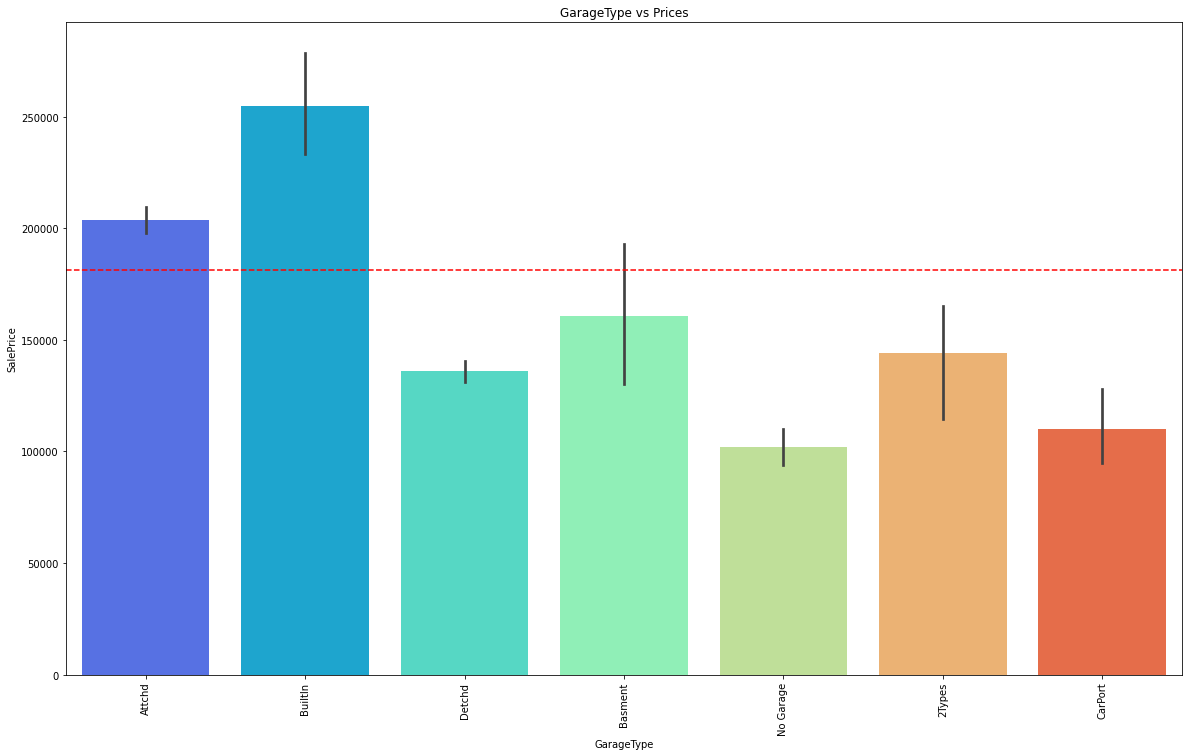

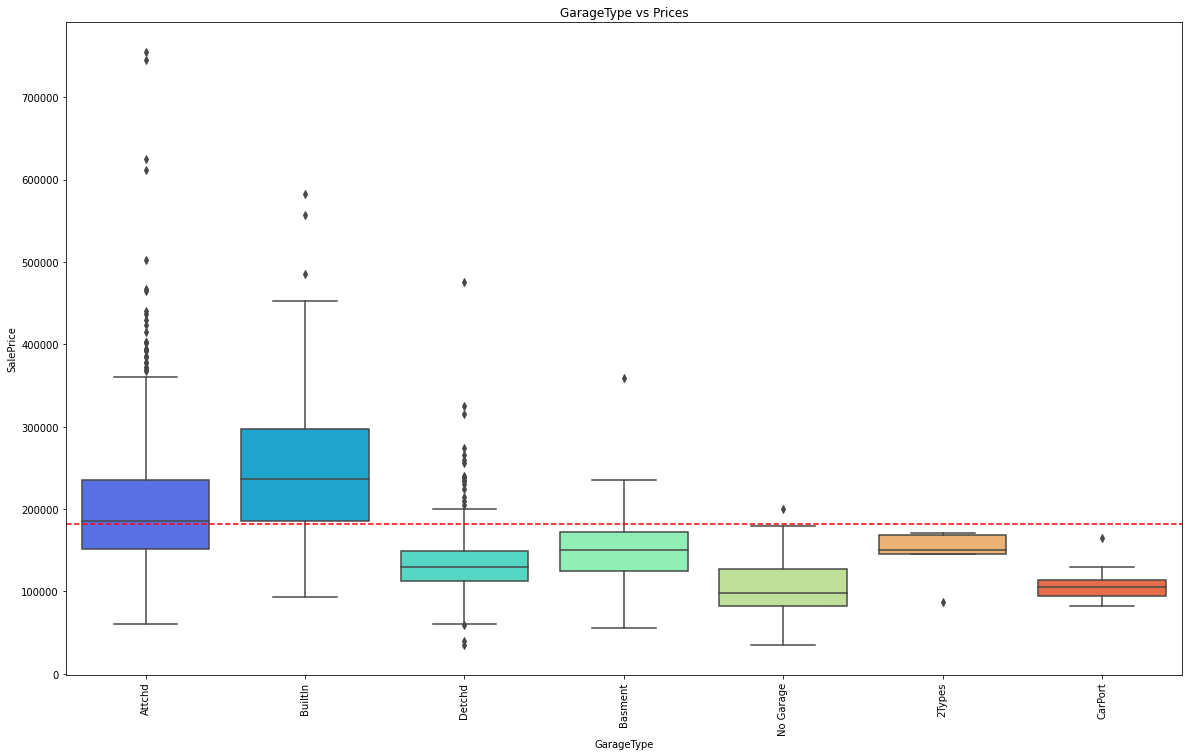

In [590]:
    print(data["GarageType"].value_counts())
    print(data.groupby("GarageType")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="GarageType", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.title("GarageType vs Prices")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="GarageType", y="SalePrice",data=data, palette="rainbow")
    plt.title("GarageType vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

From the above plot we can interpret that BuiltIn/ Built-In (Garage part of house - typically has room above garage) garagetype houses have higher mean price than others and car port garage type houses have less mean price than others type.

In [591]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["GarageType"]=le.fit_transform(data["GarageType"])

In [592]:
data.drop(columns=["GarageYrBlt"], inplace=True)

Unf          487
RFn          339
Fin          278
No Garage     64
Name: GarageFinish, dtype: int64
                       mean     max    min  count           std
GarageFinish                                                   
Fin           241223.809353  755000  94750    278  95817.051160
No Garage     102200.000000  200000  34900     64  33063.413098
RFn           201925.554572  582933  81000    339  63730.887322
Unf           143555.156057  475000  35311    487  47167.217007


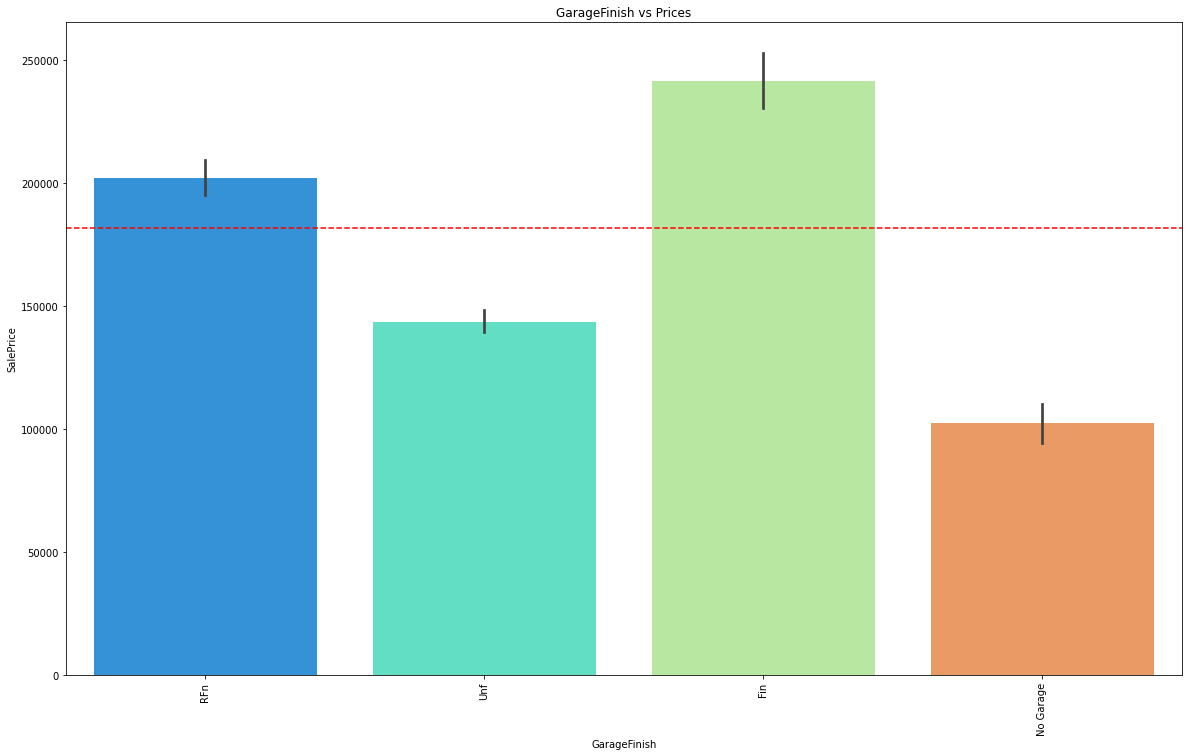

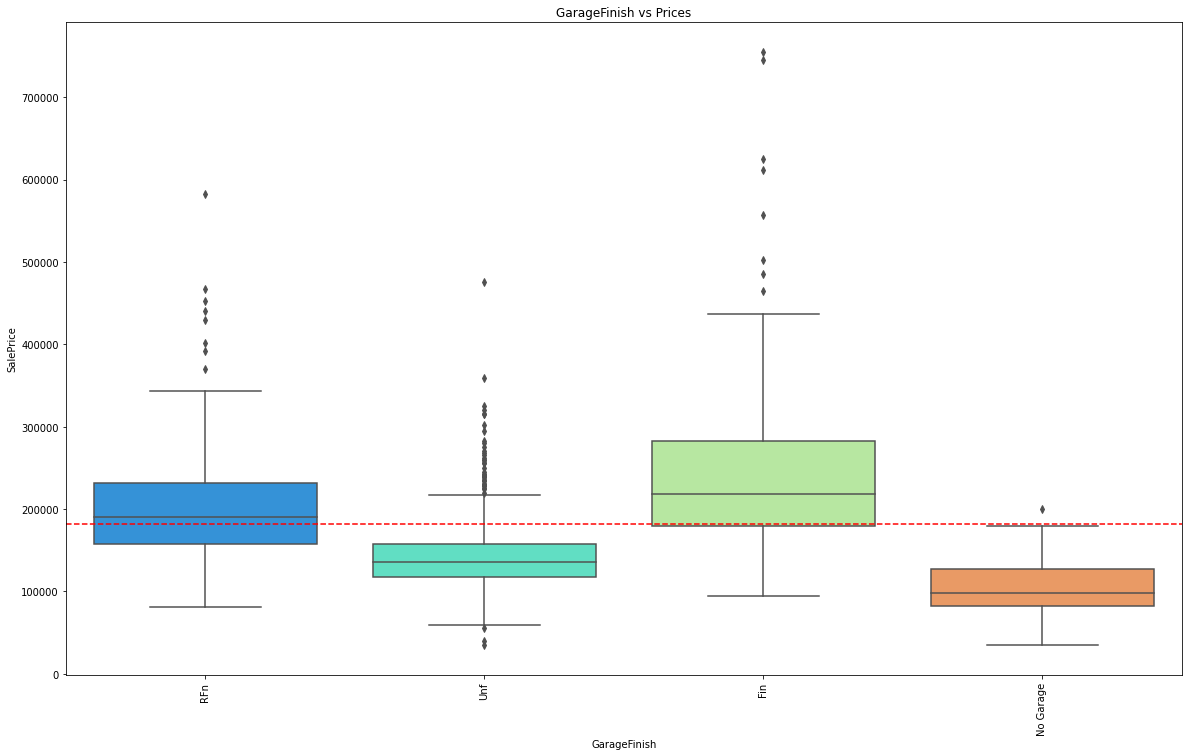

In [593]:
    data["GarageFinish"]=data["GarageFinish"].fillna("No Garage")
    print(data["GarageFinish"].value_counts())
    print(data.groupby("GarageFinish")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="GarageFinish", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.title("GarageFinish vs Prices")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="GarageFinish", y="SalePrice",data=data, palette="rainbow")
    plt.title("GarageFinish vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

In [594]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["GarageFinish"]=le.fit_transform(data["GarageFinish"])

2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64
                     mean     max     min  count            std
GarageCars                                                     
0           102200.000000  200000   34900     64   33063.413098
1           129675.635417  266500   35311    288   31412.379452
2           184259.508271  430000   55993    665   51871.926340
3           304638.829932  755000   81000    147  109252.508992
4           190819.750000  265979  123000      4   60577.252278


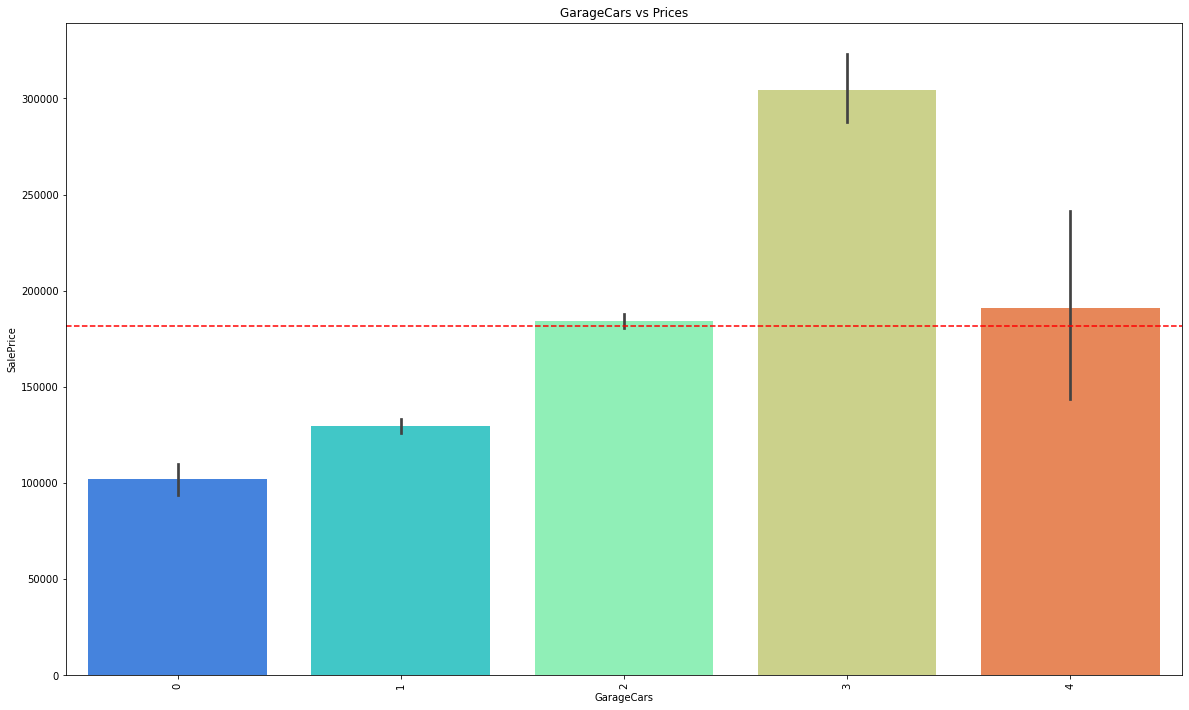

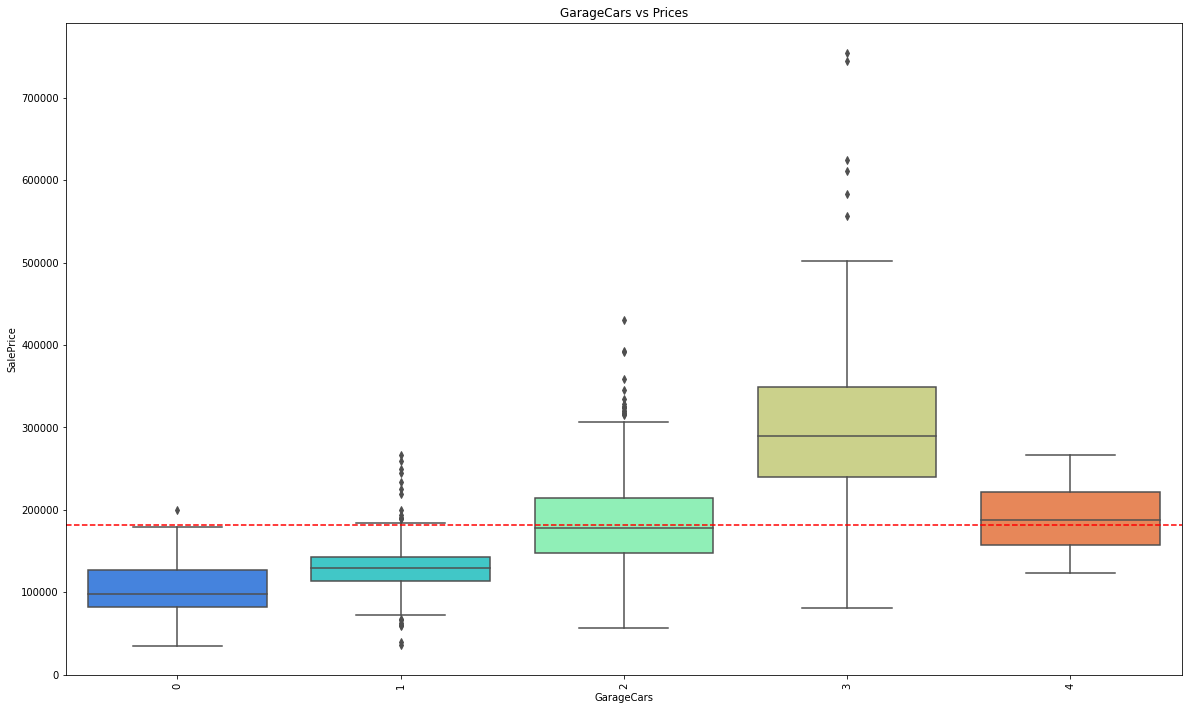

In [595]:
    data["GarageCars"]=data["GarageCars"].fillna("No Garage")
    print(data["GarageCars"].value_counts())
    print(data.groupby("GarageCars")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="GarageCars", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.title("GarageCars vs Prices")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="GarageCars", y="SalePrice",data=data, palette="rainbow")
    plt.title("GarageCars vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

Average Price is increasing with Size of garage in car capacity till 3 cars capacity, there are 4 houses with 4 cars capacity garage which have lower mean price.

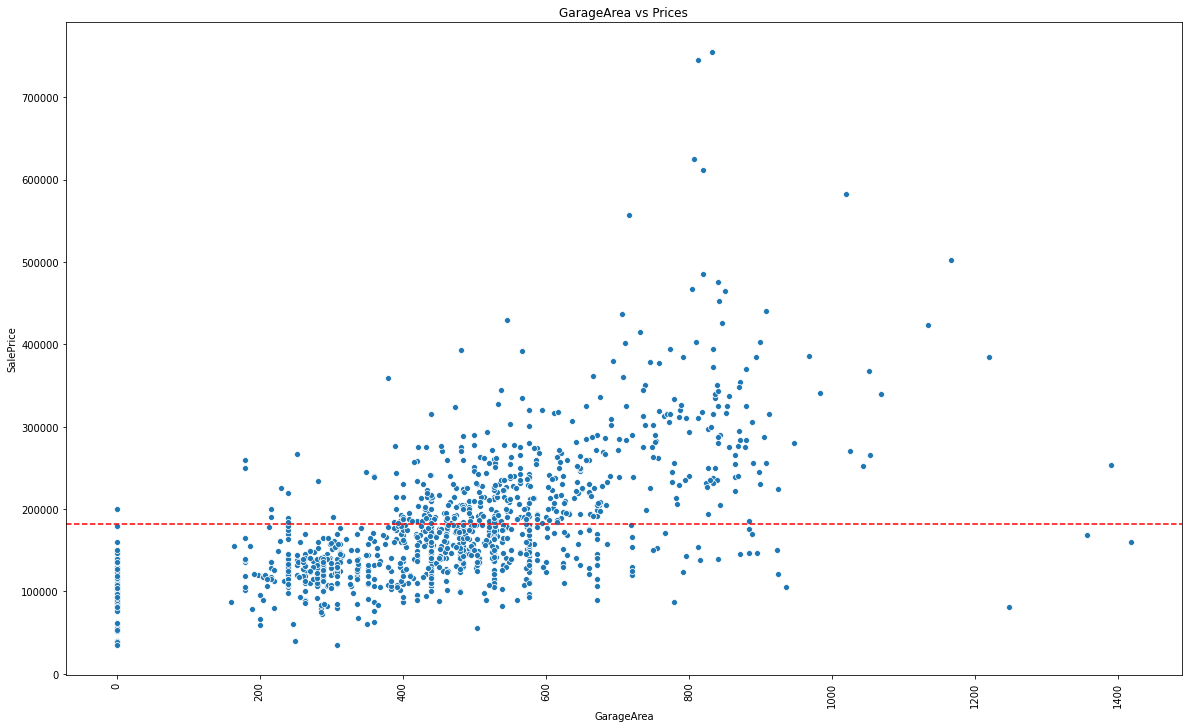

In [596]:
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.scatterplot(x="GarageArea", y="SalePrice",data=data, palette="rainbow")
    plt.title("GarageArea vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

So, we can state that GarageArea: Size of garage in square feet is positively related with price.

In [597]:
data["PavedDrive"]=data["PavedDrive"].replace({"Y":2, "P":1, "N":0})

In [598]:
data["Garage(GarageQual+GarageCond+PavedDrive)"]=data["GarageQual"]+data["GarageCond"]+data["PavedDrive"]

8.0     986
6.0      43
7.0      40
9.0      11
4.0      10
5.0       6
10.0      4
3.0       2
12.0      1
2.0       1
Name: Garage(GarageQual+GarageCond+PavedDrive), dtype: int64
                                                   mean     max     min  \
Garage(GarageQual+GarageCond+PavedDrive)                                  
2.0                                        67000.000000   67000   67000   
3.0                                       115000.000000  124000  106000   
4.0                                       112838.700000  138887   76000   
5.0                                       110250.666667  160000   40000   
6.0                                       133256.930233  265979   55993   
7.0                                       140023.350000  256000   58500   
8.0                                       191230.496957  755000   35311   
9.0                                       191439.090909  325000  118000   
10.0                                      306717.500000  475000  1749

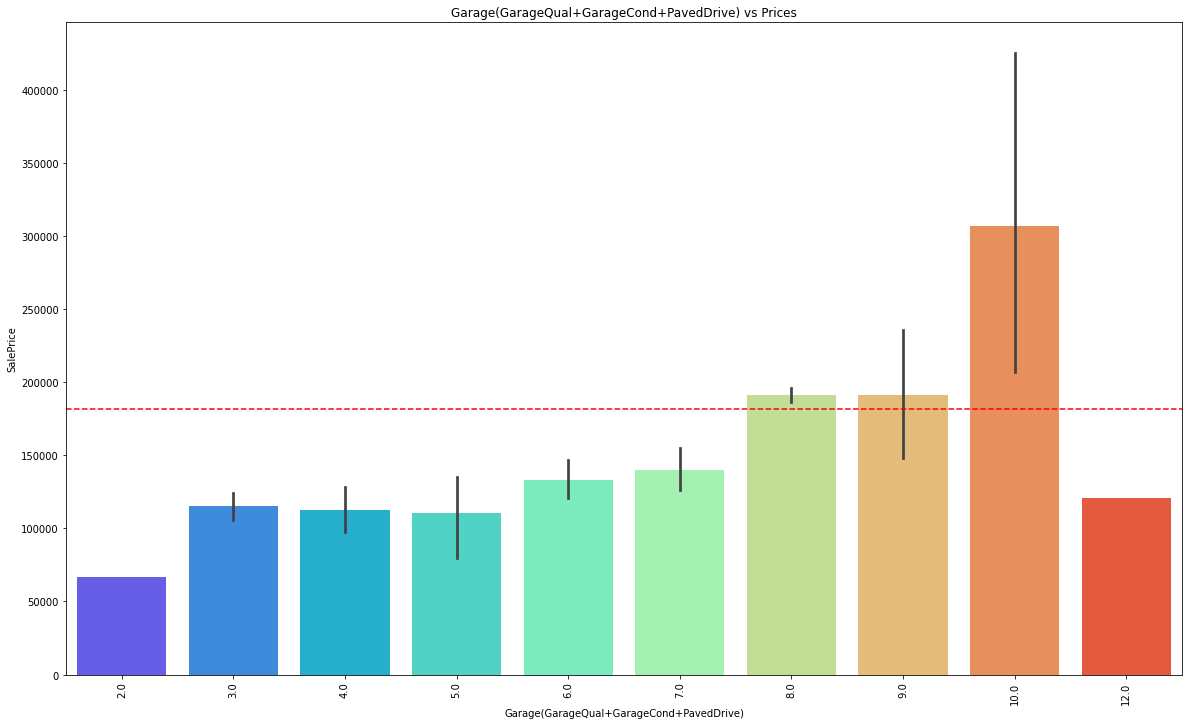

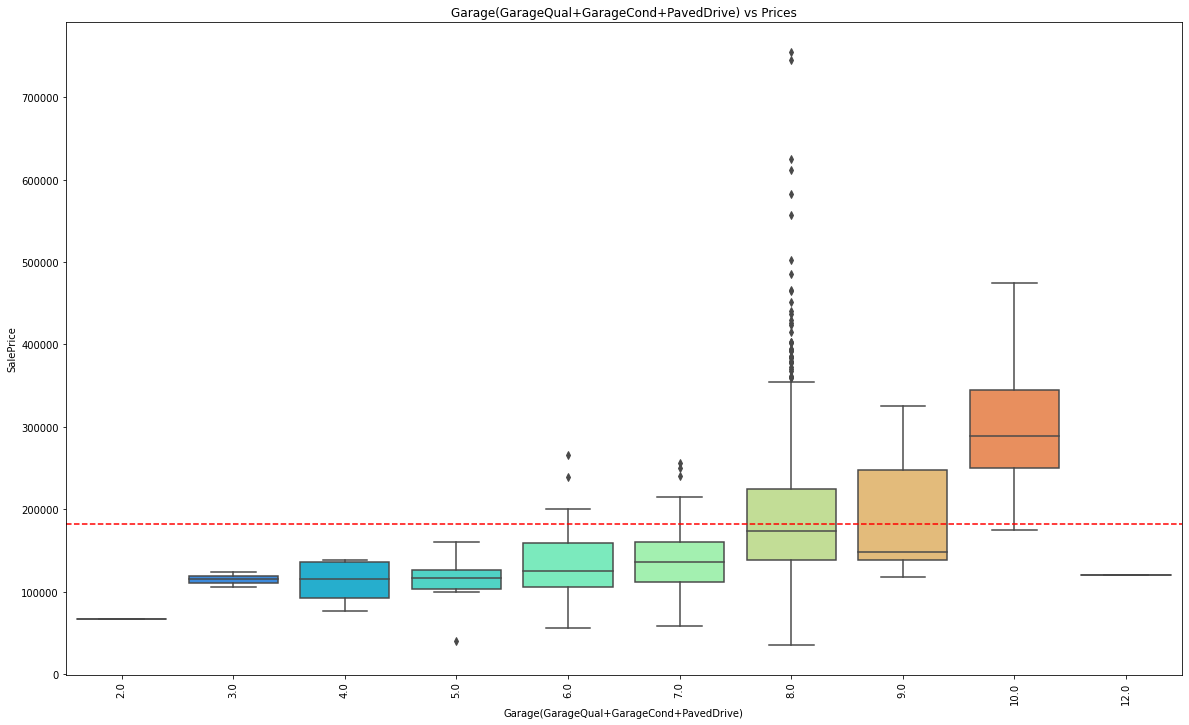

In [599]:
    print(data["Garage(GarageQual+GarageCond+PavedDrive)"].value_counts())
    print(data.groupby("Garage(GarageQual+GarageCond+PavedDrive)")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="Garage(GarageQual+GarageCond+PavedDrive)", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.title("Garage(GarageQual+GarageCond+PavedDrive) vs Prices")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="Garage(GarageQual+GarageCond+PavedDrive)", y="SalePrice",data=data, palette="rainbow")
    plt.title("Garage(GarageQual+GarageCond+PavedDrive) vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

We have made a new variable with the name Garage(GarageQual+GarageCond+PavedDrive) which is sum of all 3 variable represents garage quality, condition and presence of paved driveway.
The new variable shows a positive relation with the price of house.

In [600]:
data.drop(columns=["GarageQual","GarageCond","PavedDrive"], inplace=True)

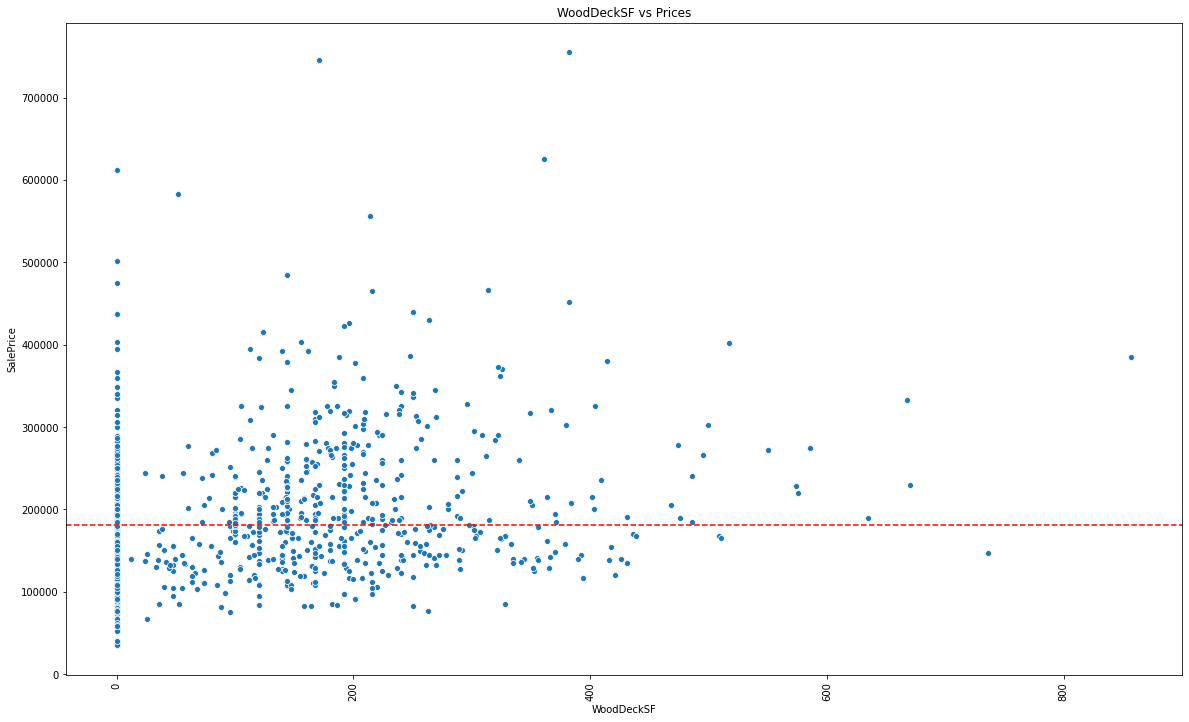

In [601]:
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.scatterplot(x="WoodDeckSF", y="SalePrice",data=data, palette="rainbow")
    plt.title("WoodDeckSF vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

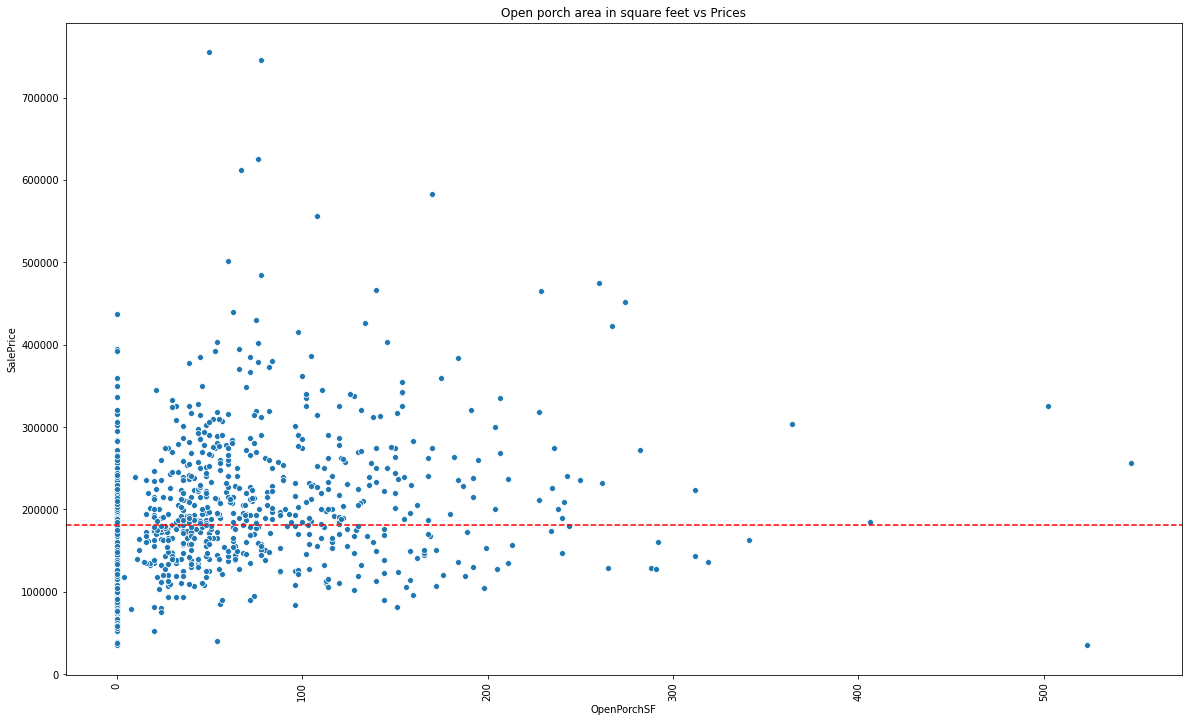

In [602]:
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.scatterplot(x="OpenPorchSF", y="SalePrice",data=data, palette="rainbow")
    plt.title("Open porch area in square feet vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

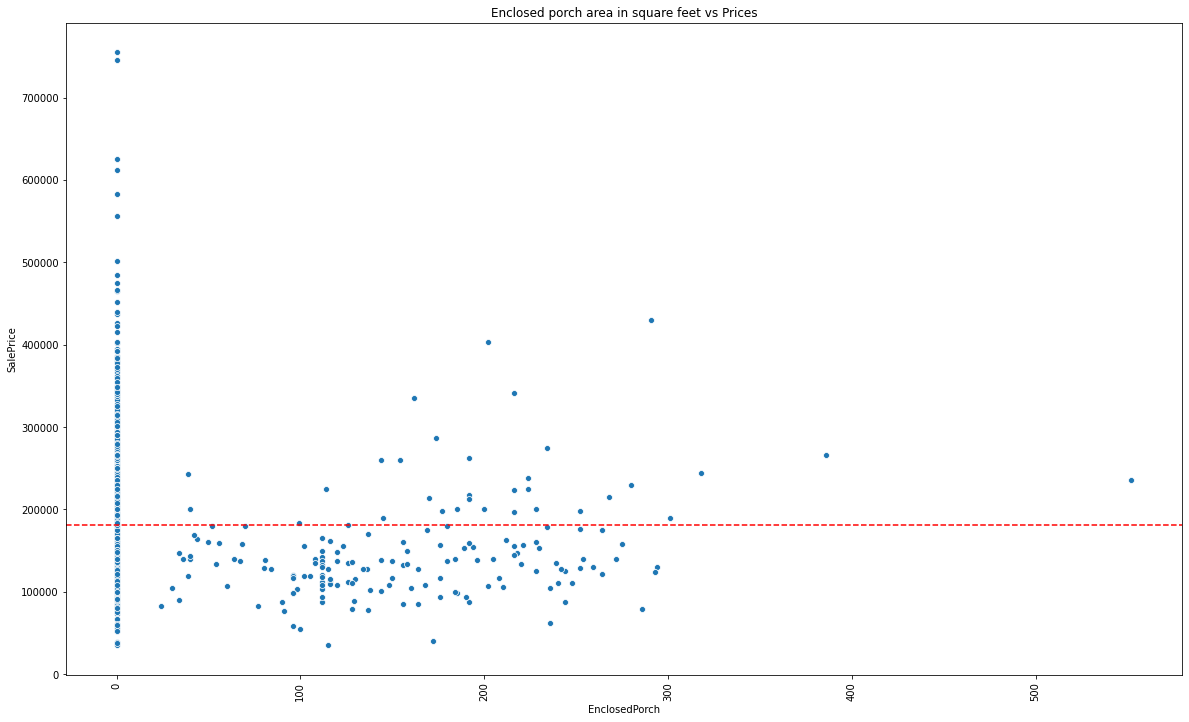

In [603]:
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.scatterplot(x="EnclosedPorch", y="SalePrice",data=data, palette="rainbow")
    plt.title("Enclosed porch area in square feet vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

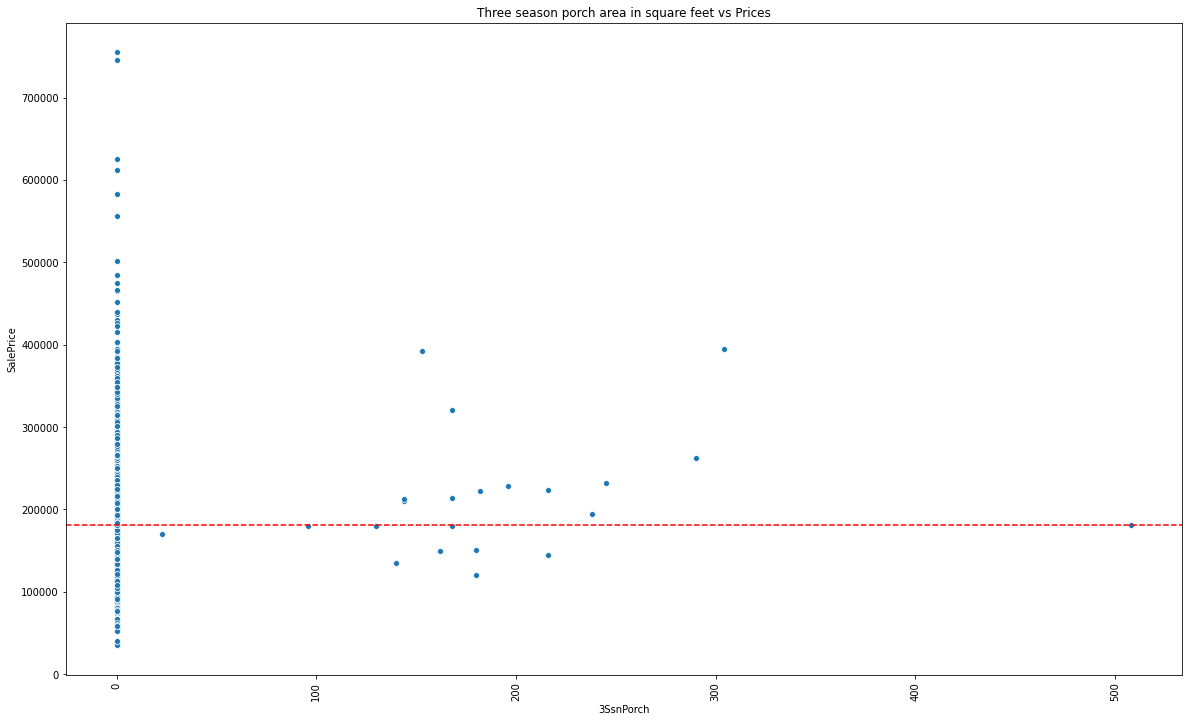

In [604]:
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.scatterplot(x="3SsnPorch", y="SalePrice",data=data, palette="rainbow")
    plt.title("Three season porch area in square feet vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

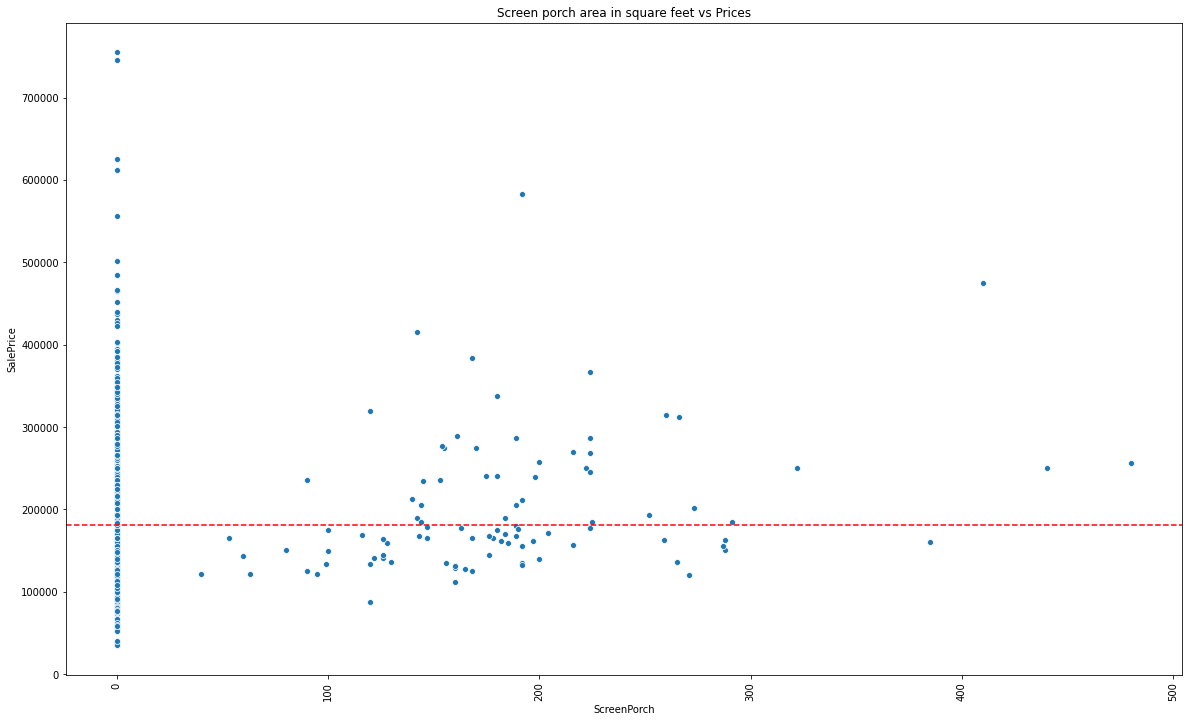

In [605]:
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.scatterplot(x="ScreenPorch", y="SalePrice",data=data, palette="rainbow")
    plt.title("Screen porch area in square feet vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

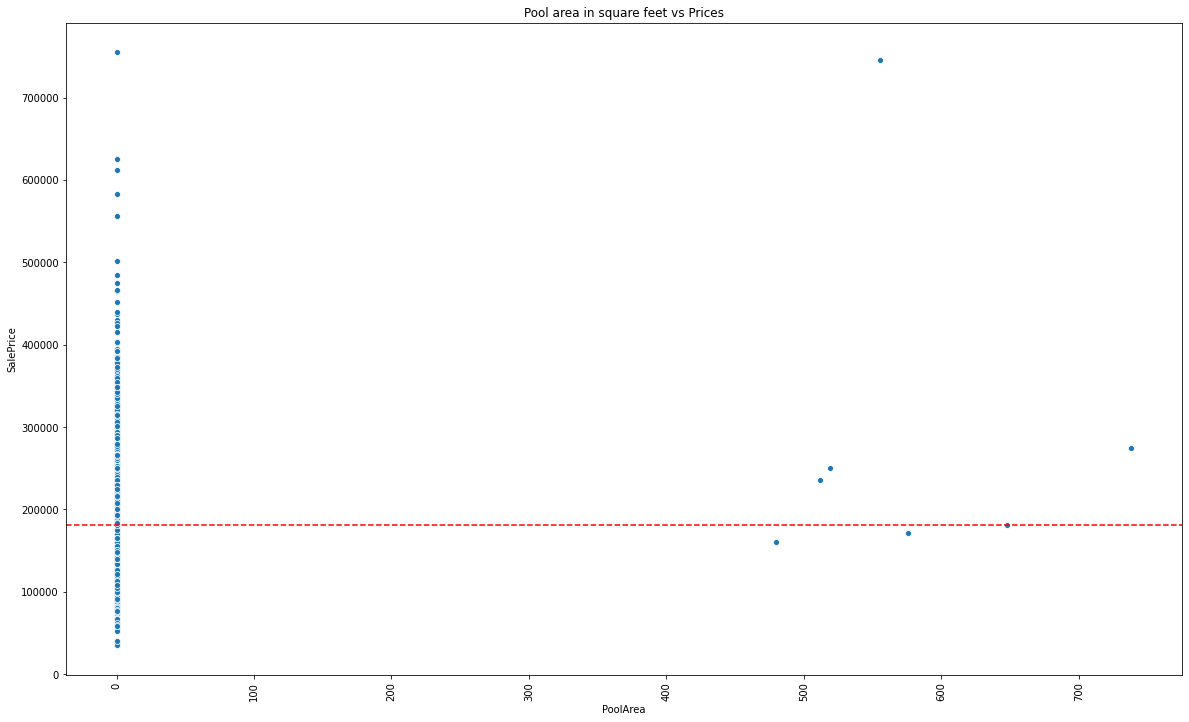

In [606]:
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.scatterplot(x="PoolArea", y="SalePrice",data=data, palette="rainbow")
    plt.title("Pool area in square feet vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

4.0    3
2.0    2
5.0    2
Name: PoolQC, dtype: int64
          mean     max     min  count            std
PoolQC                                              
2.0     215500  250000  181000      2   48790.367902
4.0     201990  274970  160000      3   63441.392639
5.0     490000  745000  235000      2  360624.458405


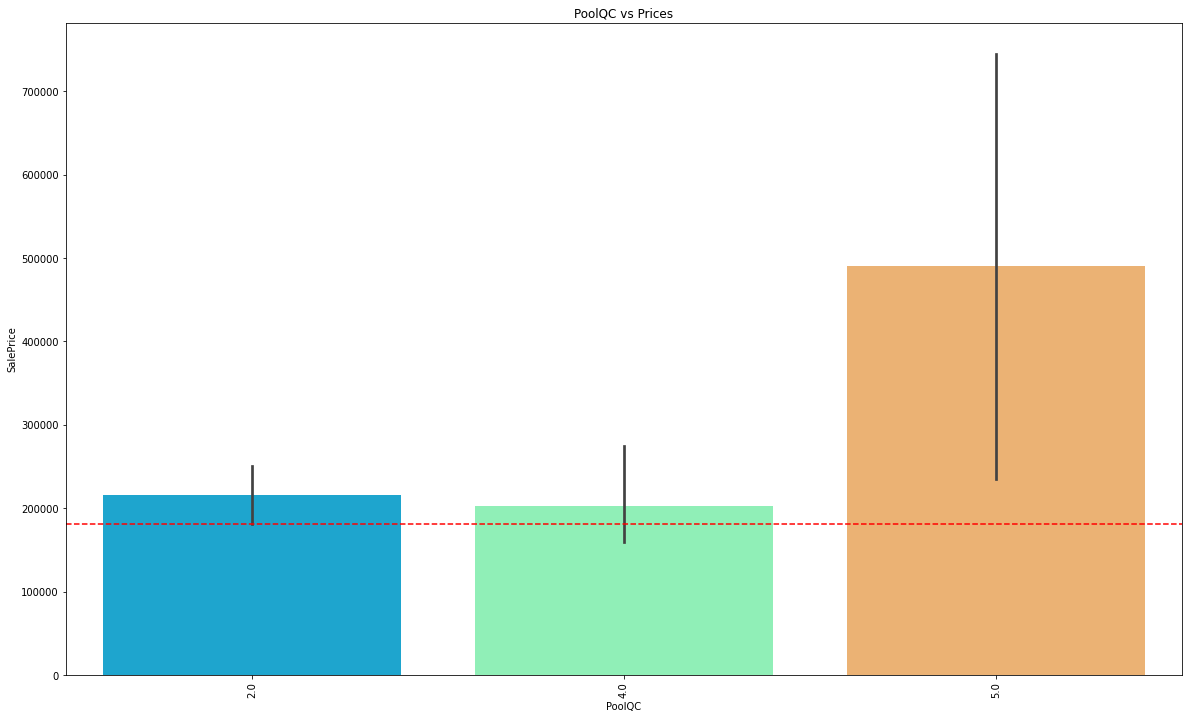

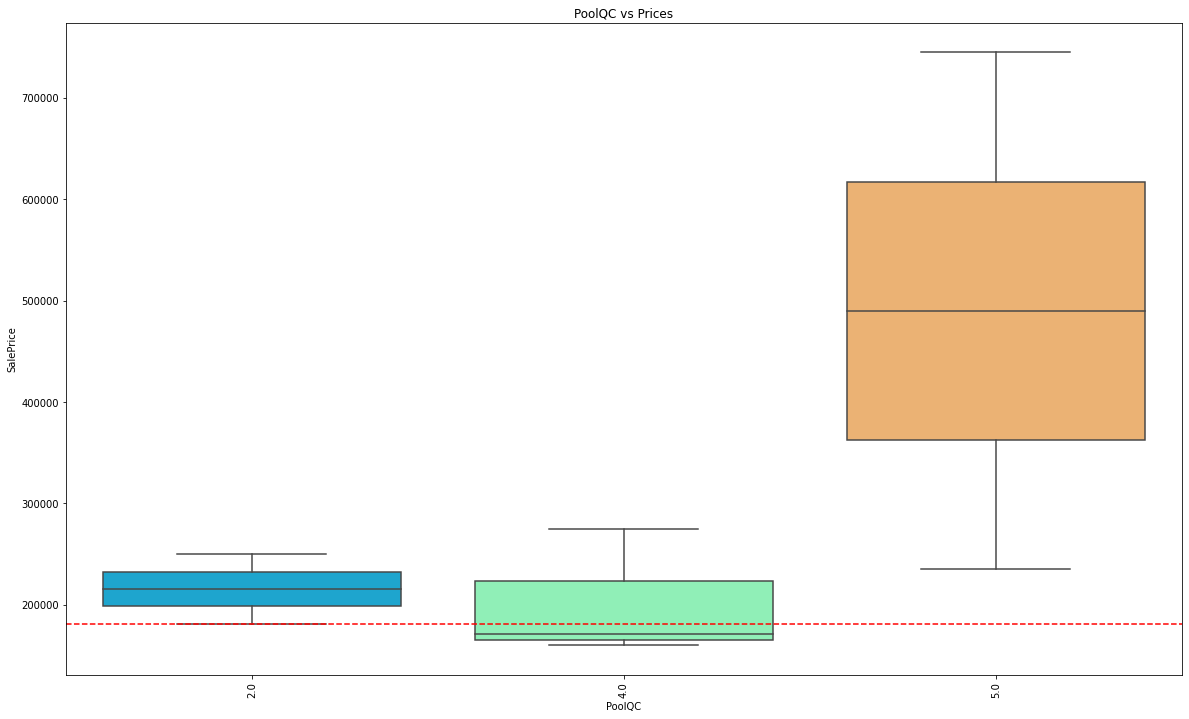

In [607]:
    print(data["PoolQC"].value_counts())
    print(data.groupby("PoolQC")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="PoolQC", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.title("PoolQC vs Prices")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="PoolQC", y="SalePrice",data=data, palette="rainbow")
    plt.title("PoolQC vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

In [608]:
data.drop(columns=["PoolArea", "PoolQC"], inplace=True)

In [609]:
data["Fence"]=data["Fence"].fillna("No Fence")

No Fence    931
MnPrv       129
GdPrv        51
GdWo         47
MnWw         10
Name: Fence, dtype: int64
                   mean     max     min  count           std
Fence                                                       
GdPrv     181743.529412  475000  108000     51  58819.501658
GdWo      134593.255319  289000   34900     47  40825.417794
MnPrv     151392.798450  745000   40000    129  70699.639450
MnWw      135715.000000  187000  110000     10  22410.216544
No Fence  188489.279270  755000   35311    931  81134.204214


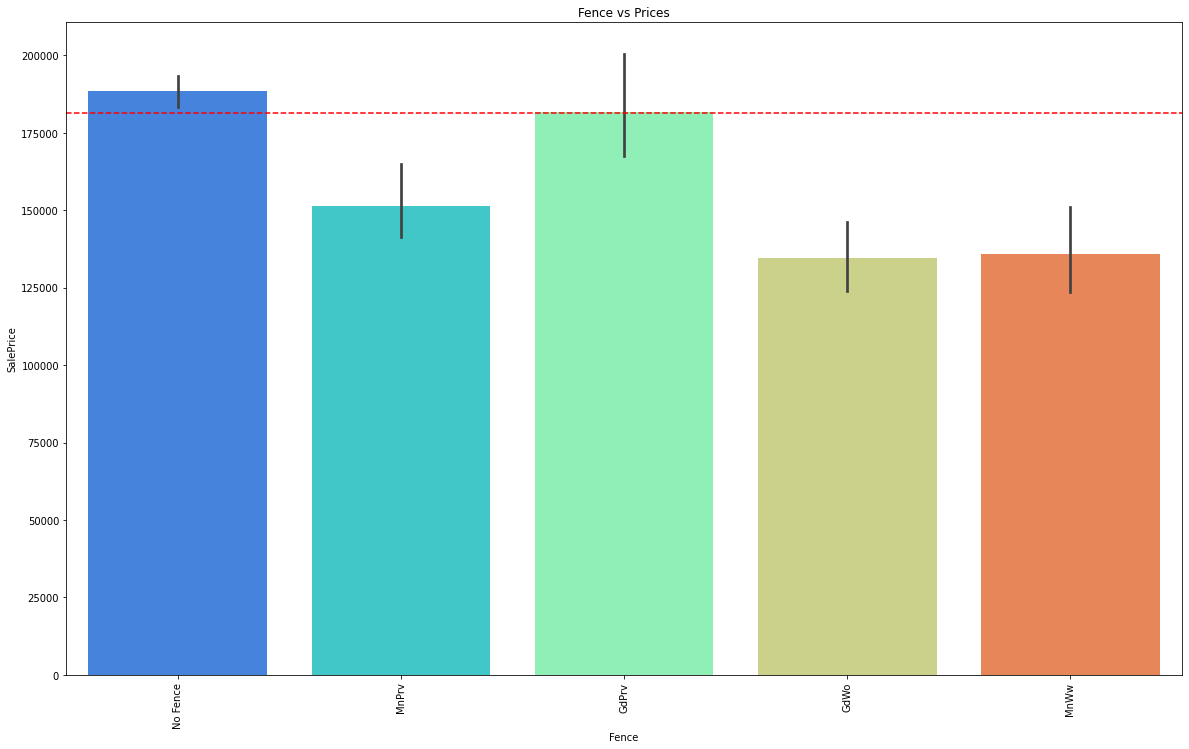

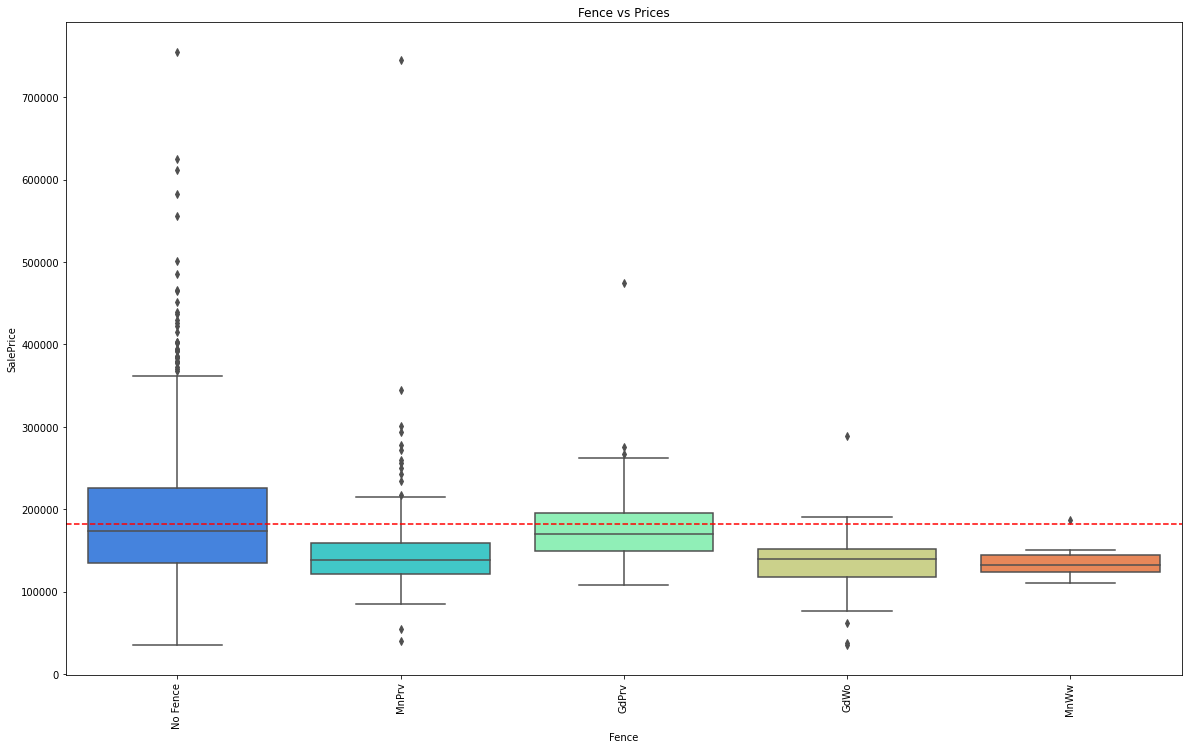

In [610]:
    print(data["Fence"].value_counts())
    print(data.groupby("Fence")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="Fence", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.title("Fence vs Prices")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="Fence", y="SalePrice",data=data, palette="rainbow")
    plt.title("Fence vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

In [611]:
data.drop(columns=["Fence"], inplace=True)

Shed    40
Gar2     2
Othr     1
TenC     1
Name: MiscFeature, dtype: int64
                   mean     max     min  count           std
MiscFeature                                                 
Gar2         170750.000  190000  151500      2  27223.611076
Othr         133000.000  133000  133000      1           NaN
Shed         151598.575  277000   55993     40  55222.790229
TenC         250000.000  250000  250000      1           NaN


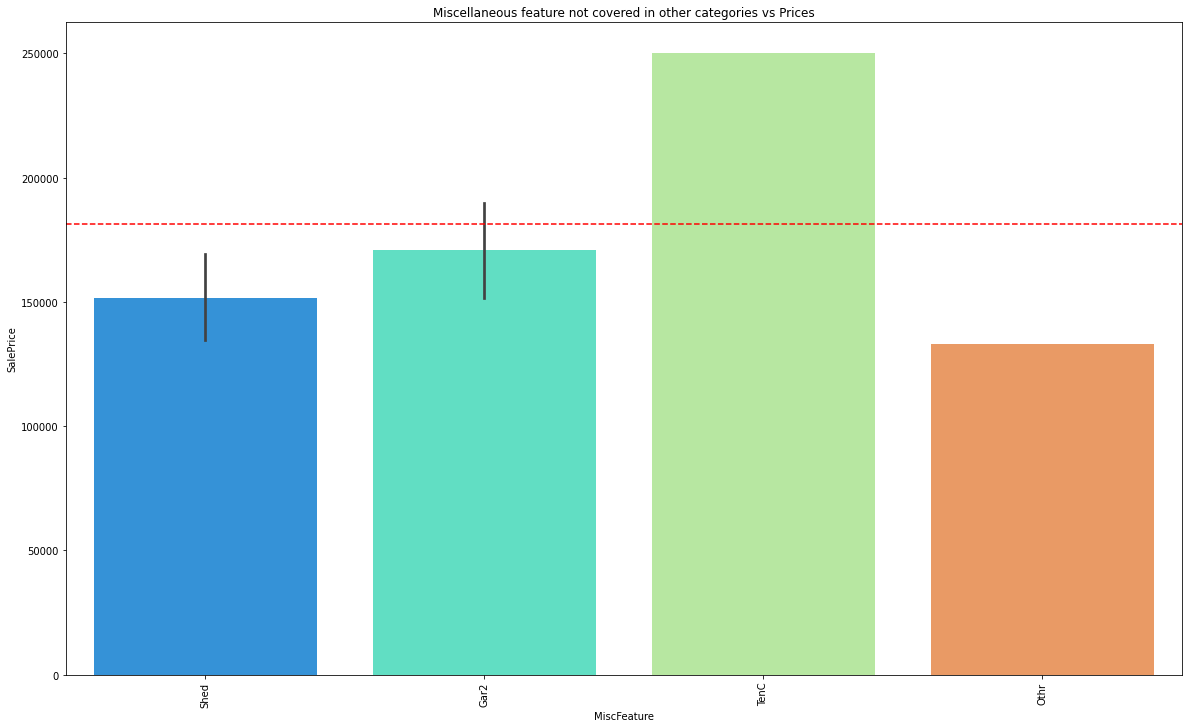

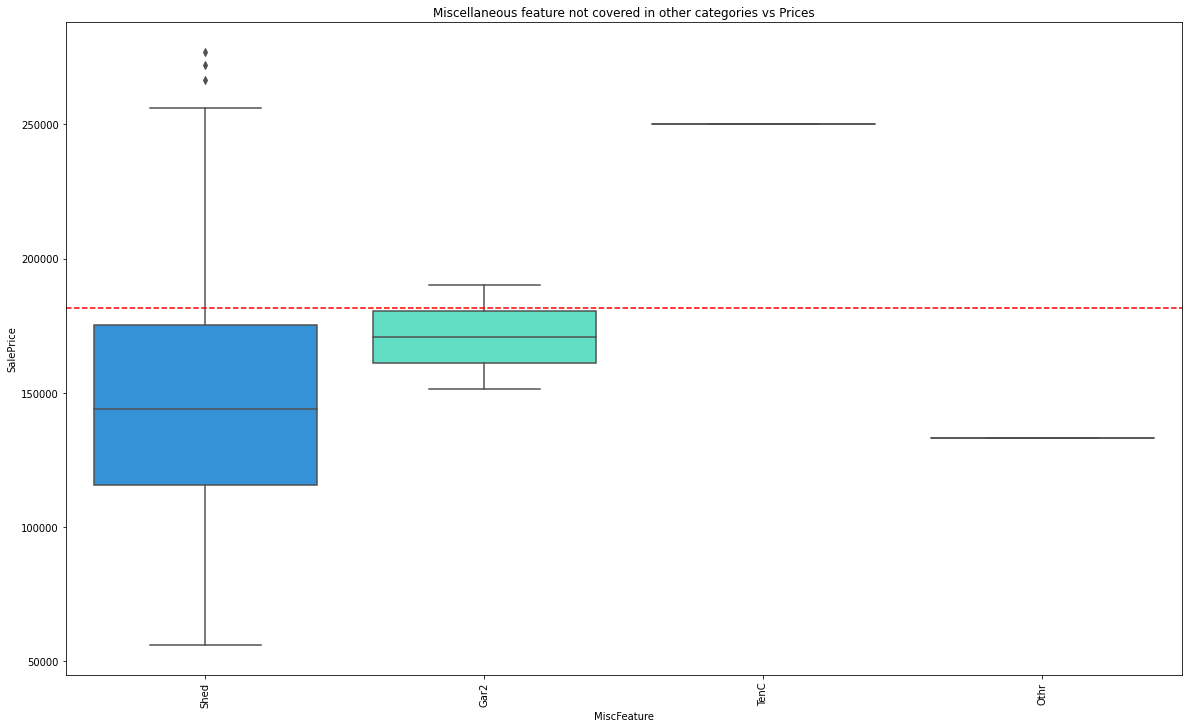

In [612]:
    print(data["MiscFeature"].value_counts())
    print(data.groupby("MiscFeature")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="MiscFeature", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.title("Miscellaneous feature not covered in other categories vs Prices")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="MiscFeature", y="SalePrice",data=data, palette="rainbow")
    plt.title("Miscellaneous feature not covered in other categories vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

In [613]:
data.drop(columns=["MiscFeature"], inplace=True)

In [614]:
data.drop(columns=["MiscVal"], inplace=True)

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64
                   mean     max     min  count            std
SaleType                                                     
COD       146722.368421  287000   60000     38   47378.582653
CWD       171166.666667  219500  136000      3   43279.132770
Con       269600.000000  324000  215200      2   76933.217793
ConLD     146141.000000  235128   81000      8   52537.253906
ConLI     200390.000000  451950  110000      5  145282.519595
ConLw     143625.000000  212000   60000      4   77701.753519
New       271104.500000  611657  140000    106  102473.072524
Oth       119850.000000  150000   93500      3   28441.035495
WD        173668.456456  755000   34900    999   70646.034907


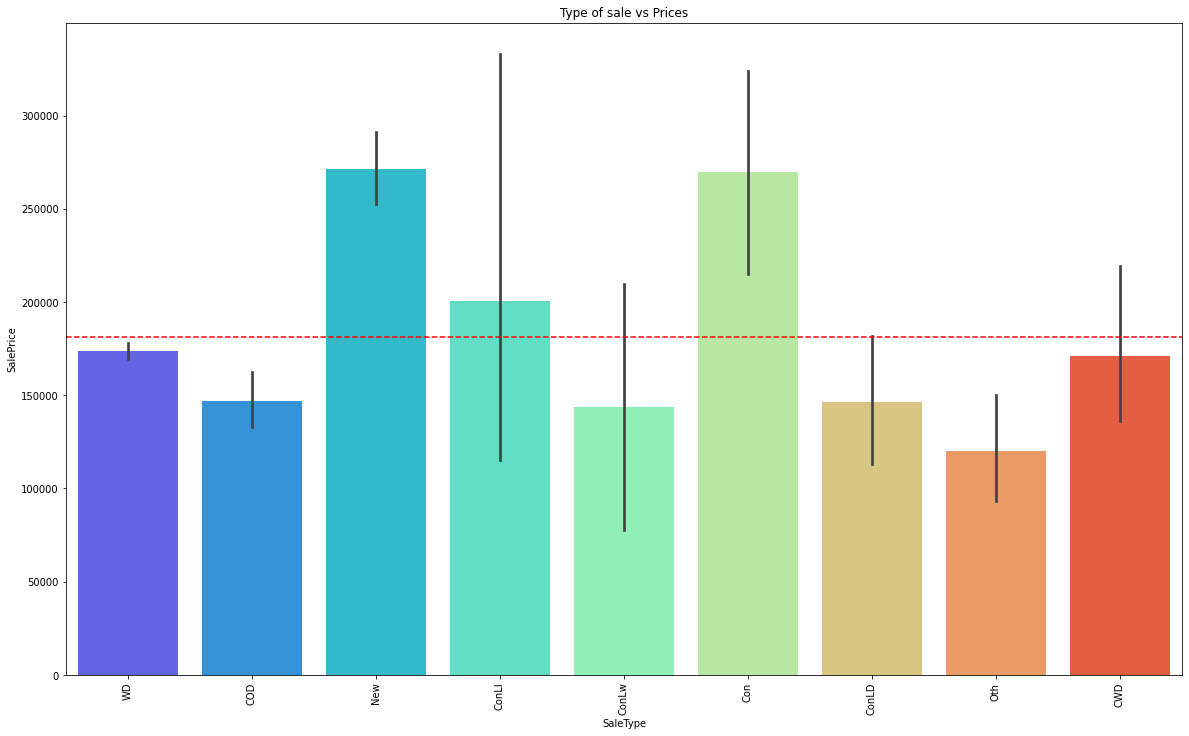

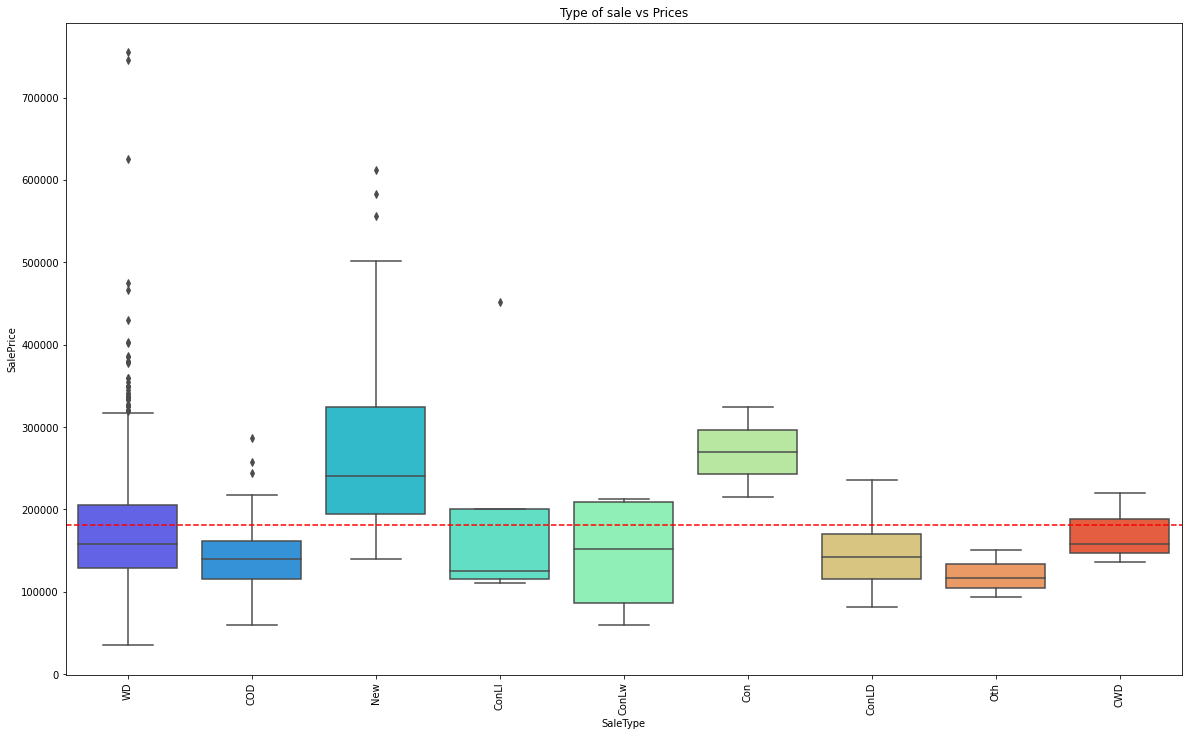

In [615]:
    print(data["SaleType"].value_counts())
    print(data.groupby("SaleType")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="SaleType", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.title("Type of sale vs Prices")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="SaleType", y="SalePrice",data=data, palette="rainbow")
    plt.title("Type of sale vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

When the type of sale is  Con/Contract 15% Down payment regular terms, Mean price is higher than others type, as from the no of count we can say most of the customer prefer WD /Warranty Deed - Conventional type of sale.

In [616]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["SaleType"]=le.fit_transform(data["SaleType"])

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64
                        mean     max     min  count            std
SaleCondition                                                     
Abnorml        147567.938272  745000   34900     81   87836.948119
AdjLand        104125.000000  127500   81000      4   26135.464411
Alloca         167377.416667  359100   55993     12   84460.527502
Family         149138.888889  259000   88000     18   44229.949115
Normal         175436.408466  755000   39300    945   68585.309448
Partial        269585.231481  611657  140000    108  102311.257755


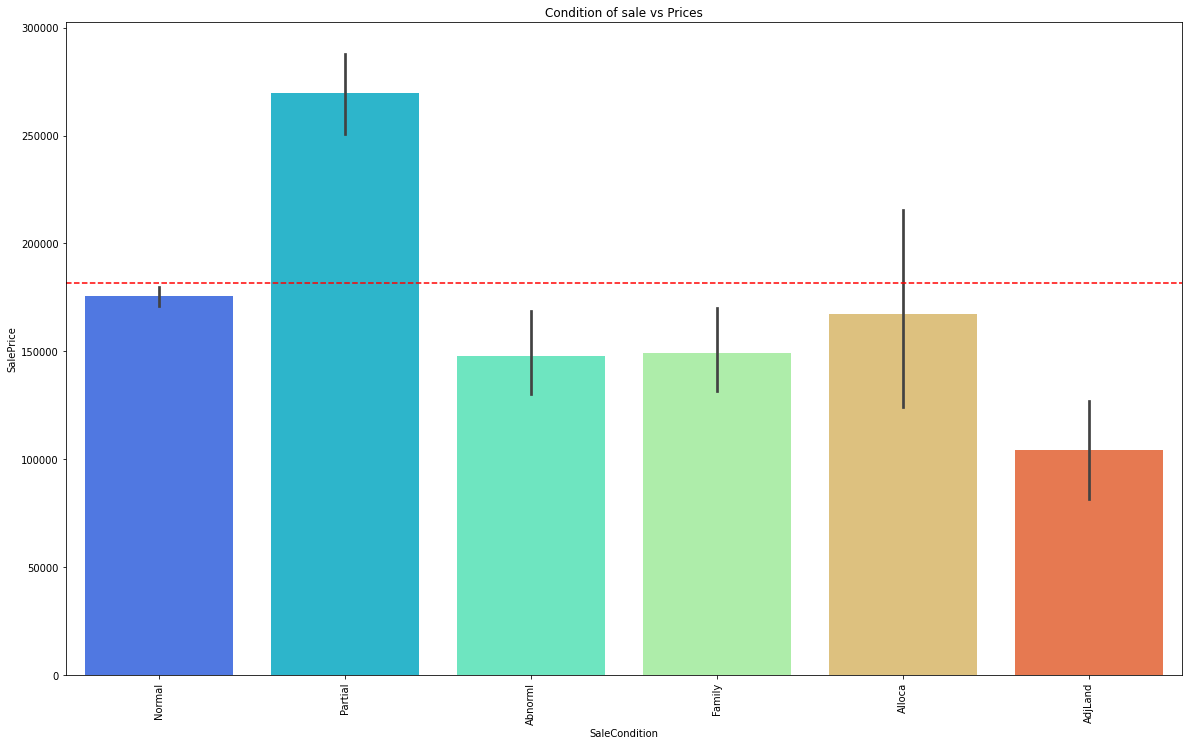

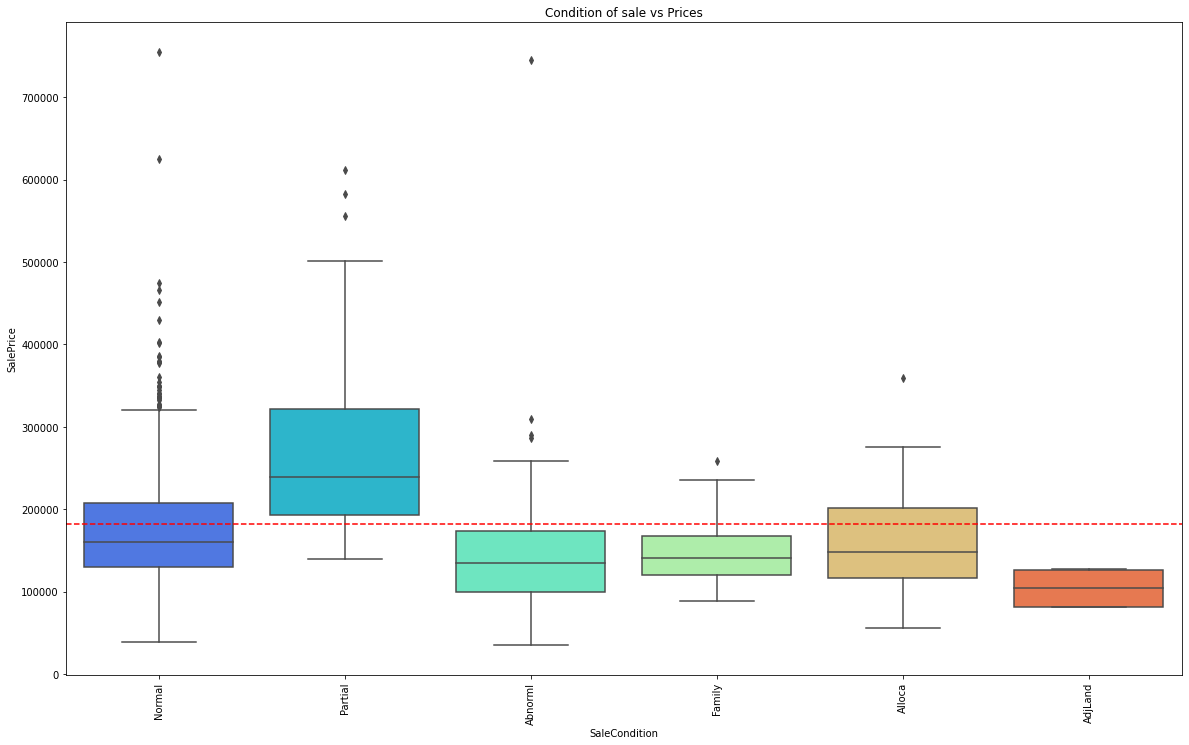

In [617]:
    print(data["SaleCondition"].value_counts())
    print(data.groupby("SaleCondition")["SalePrice"].aggregate(["mean", max, min, "count", "std"]))
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.barplot(x="SaleCondition", y="SalePrice",data=data, palette="rainbow")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.title("Condition of sale vs Prices")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.figure(figsize=(20,12))
    mean_price=np.mean(data["SalePrice"])
    sns.boxplot(x="SaleCondition", y="SalePrice",data=data, palette="rainbow")
    plt.title("Condition of sale vs Prices")
    plt.axhline(mean_price, color="red", linestyle="dashed")
    plt.xticks(rotation="vertical")
    plt.show()

Partial/Home was not completed when last assessed (associated with New Homes) this type of sale condition has more prices than others. Although from the count we can say normal sale is more popular among the customers.

In [618]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["SaleCondition"]=le.fit_transform(data["SaleCondition"])
data["RoofStyle"]=le.fit_transform(data["RoofStyle"])
data["RoofMatl"]=le.fit_transform(data["RoofMatl"])
data["HeatingQC"]=le.fit_transform(data["HeatingQC"])

In [619]:
data.drop(columns="Remodeled", inplace=True)

In [620]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Exterior"]=le.fit_transform(data["Exterior"])

In [621]:
data.dropna(inplace=True)

<font color=blue>to handle the outliers</font>

In [622]:
from scipy.stats import zscore
z=np.abs(zscore(data))
data_mod=data[(z<3).all(axis=1)]

In [623]:
cols=data.columns

In [624]:
for col in cols:
    z1=np.abs(zscore(data[col]))
    data_mod[col]=data[col][(z1<3)]

In [625]:
data.shape, data_mod.shape

((1073, 46), (656, 46))

In [626]:
corrmat=data.corr()

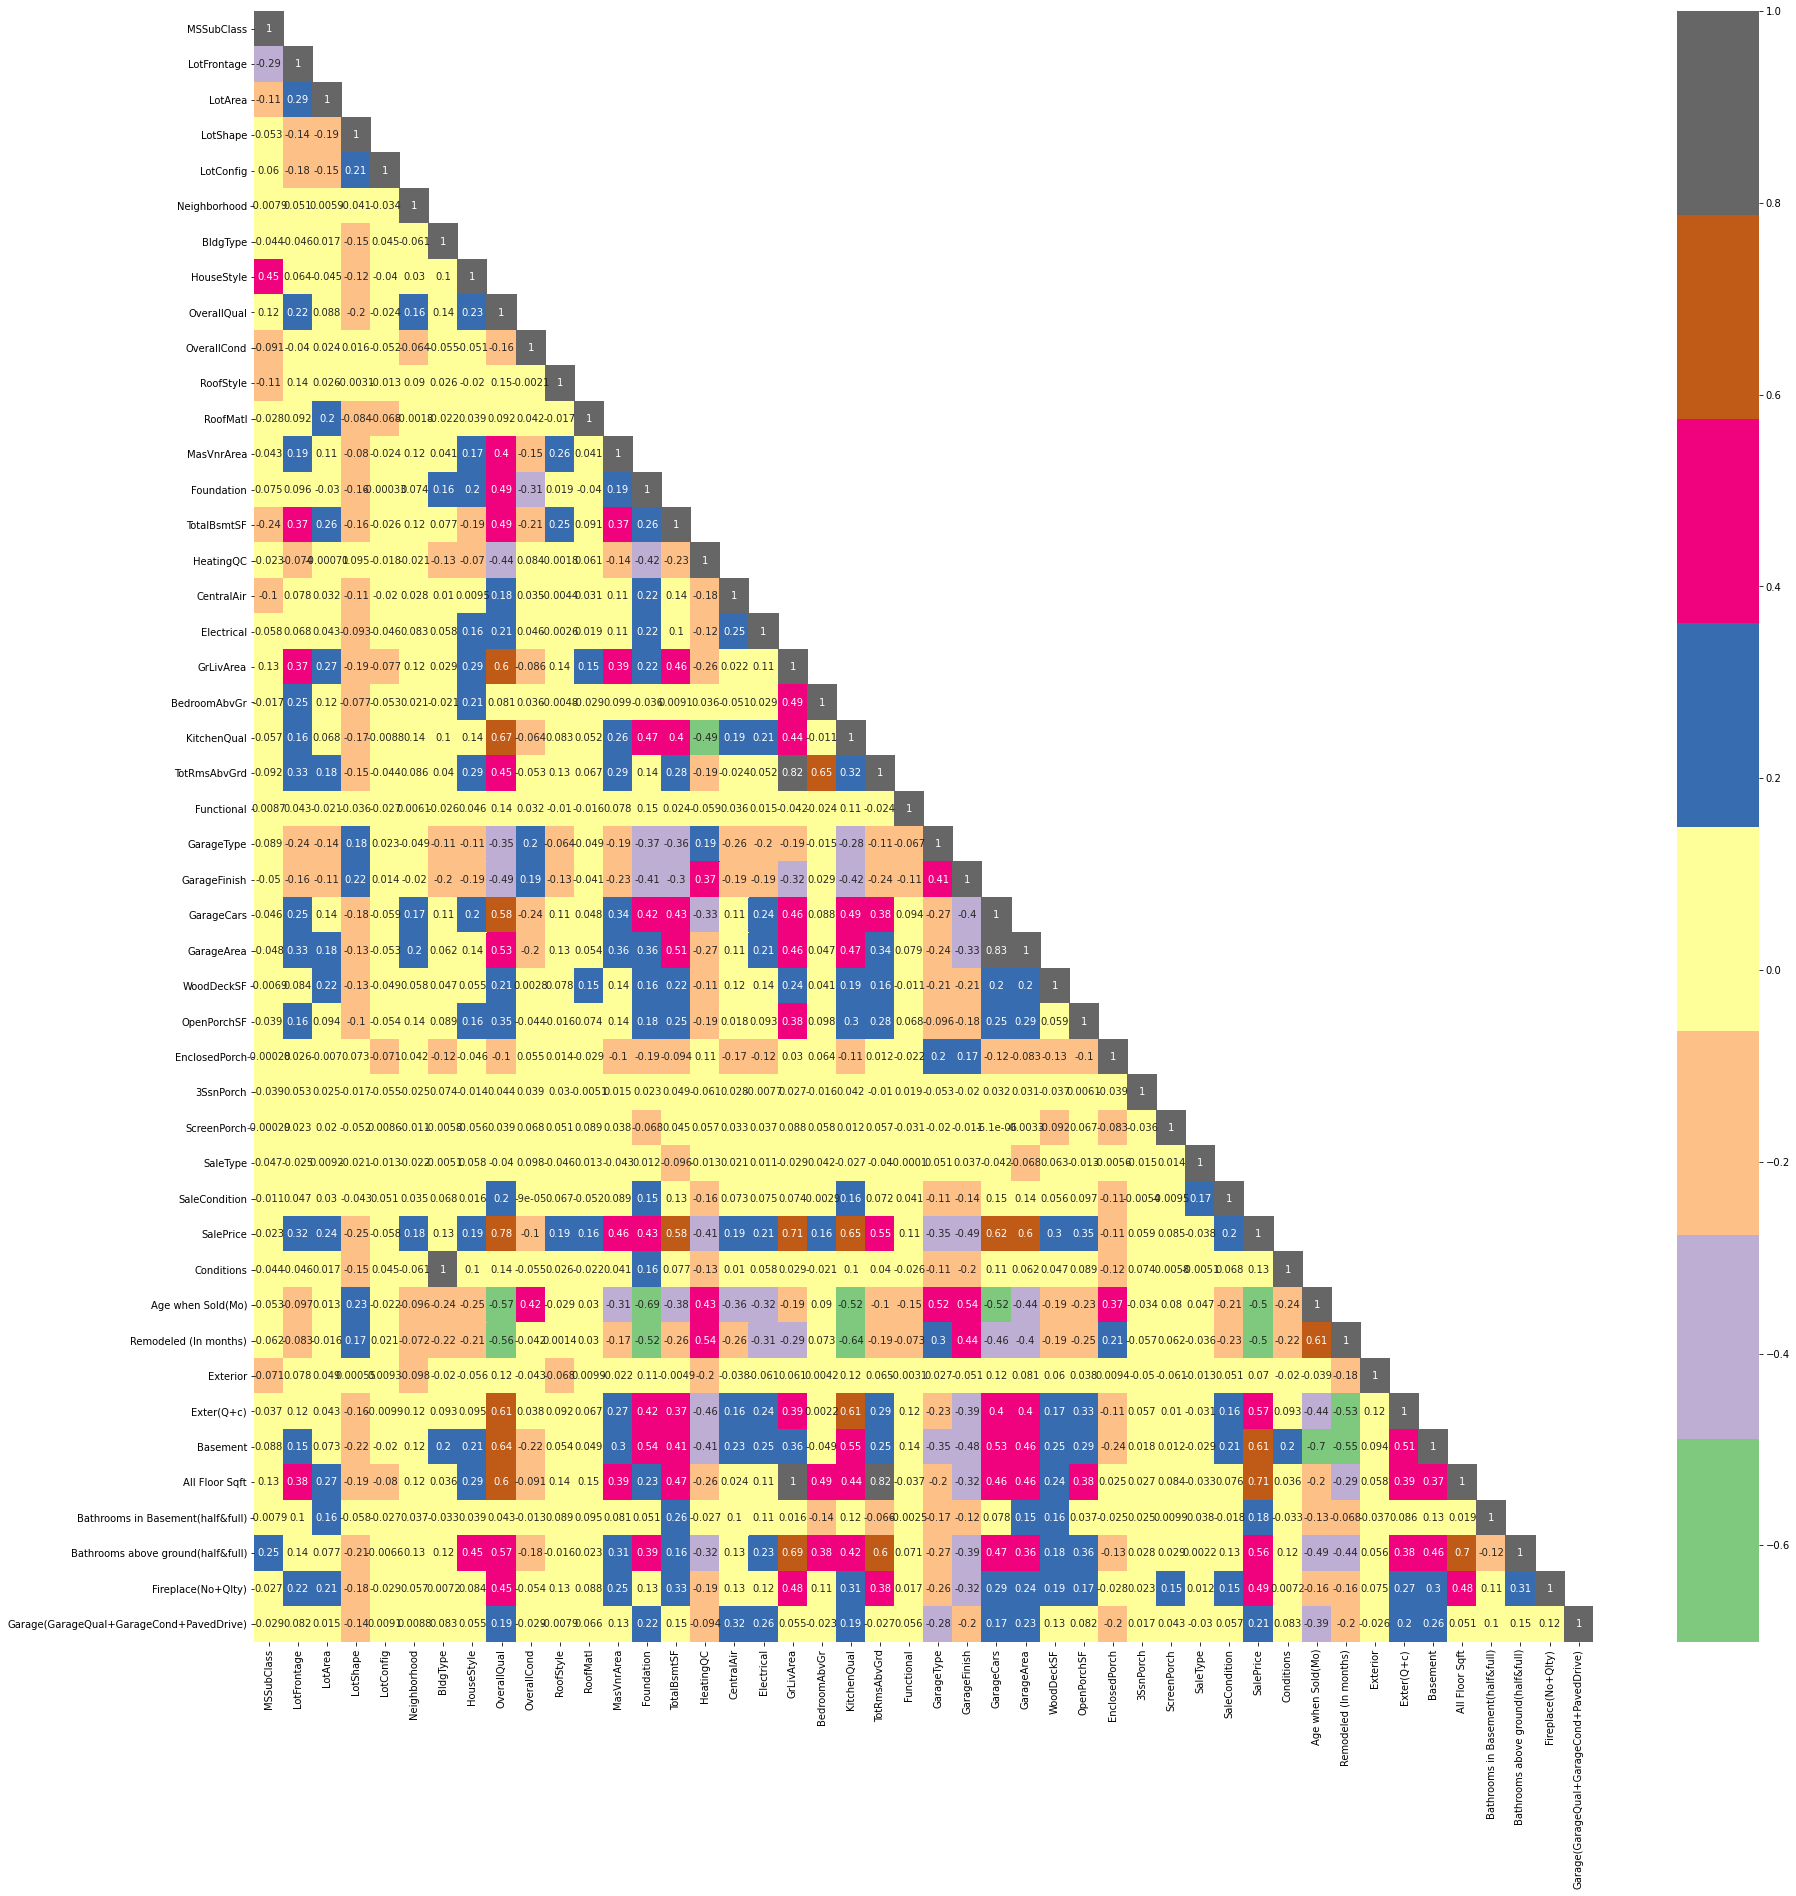

In [627]:
plt.figure(figsize=(30,30))
m=np.ones_like(corrmat)
m[np.tril_indices_from(m)]=0
sns.heatmap(corrmat, annot=True, cmap="Accent", mask=m)
plt.show()

<AxesSubplot:>

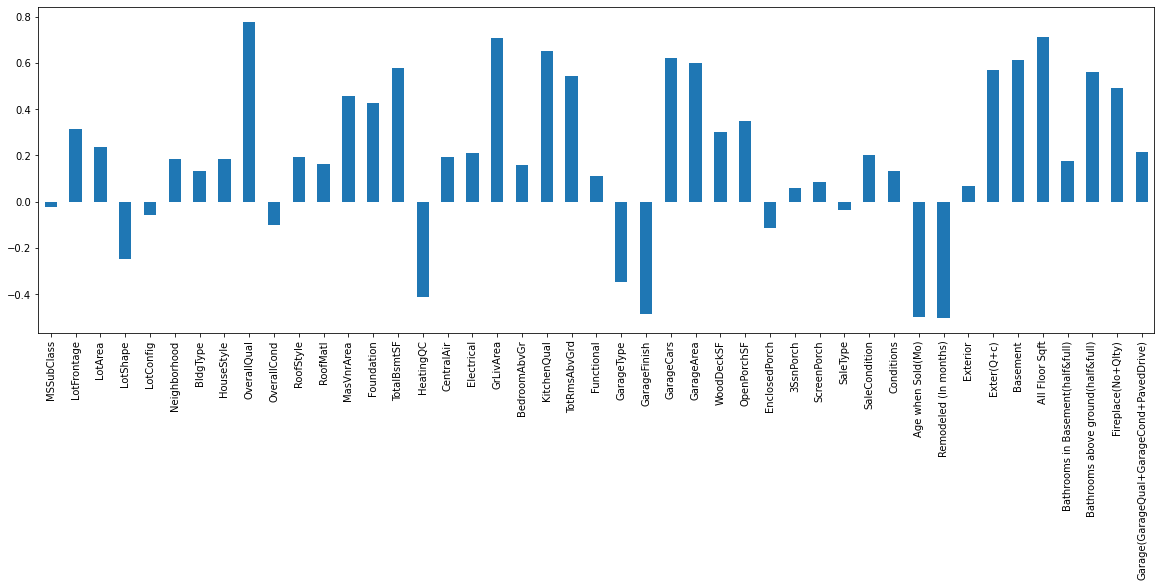

In [628]:
plt.figure(figsize=(20,6))
data.drop("SalePrice", axis=1).corrwith(data["SalePrice"]).plot(kind="bar")

So from the above bar plot we tnter pret that:
    1. 34 variables are positively related and 11 variables are negatively correlated with the target variable price.
    2. OverallQual is the most positively highly correlated with target varibale and GarageType and GarageFinish are mostly negatively correlated with target variable.

In [629]:
data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'MasVnrArea', 'Foundation', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'SaleType',
       'SaleCondition', 'SalePrice', 'Conditions', 'Age when Sold(Mo)',
       'Remodeled (In months)', 'Exterior', 'Exter(Q+c)', 'Basement',
       'All Floor Sqft', 'Bathrooms in Basement(half&full)',
       'Bathrooms above ground(half&full)', 'Fireplace(No+Qlty)',
       'Garage(GarageQual+GarageCond+PavedDrive)'],
      dtype='object')

<font color=violet> Find all the important variables by using F-statistics and Chi Sq</font>

In [630]:
from scipy.stats import f_oneway
selected_predictor=[]
def func_annova(data,target_var, list_of_cont):
    cols=['LotFrontage', 'LotArea',"MasVnrArea", 'TotalBsmtSF', 'GrLivArea', "GarageArea",'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch','Age when Sold(Mo)','Remodeled (In months)', 'Basement','All Floor Sqft' ]
    for col in cols:
        contgroup=data.groupby(target_var)[col].apply(list)
        annova_results=f_oneway(*contgroup)
        if (annova_results[1]<.05):
            print(col,"related to", target_var, "is", annova_results[1], "SELECTED")
            selected_predictor.append(col)
        else:
            print(col,"related to", target_var, "is", annova_results[1], "NOT SELECTED")

In [631]:
func_annova(data,"SalePrice", cols)

LotFrontage related to SalePrice is 0.09152163655632915 NOT SELECTED
LotArea related to SalePrice is 8.835617118442215e-12 SELECTED
MasVnrArea related to SalePrice is 3.233193512151282e-12 SELECTED
TotalBsmtSF related to SalePrice is 3.047727002277158e-08 SELECTED
GrLivArea related to SalePrice is 9.909286333967131e-35 SELECTED
GarageArea related to SalePrice is 2.230138230930728e-24 SELECTED
WoodDeckSF related to SalePrice is 0.011852914343186145 SELECTED
OpenPorchSF related to SalePrice is 0.0005776068283284619 SELECTED
EnclosedPorch related to SalePrice is 0.999975267968519 NOT SELECTED
3SsnPorch related to SalePrice is 0.816617491558789 NOT SELECTED
ScreenPorch related to SalePrice is 0.19330925664616397 NOT SELECTED
Age when Sold(Mo) related to SalePrice is 6.104439296101985e-17 SELECTED
Remodeled (In months) related to SalePrice is 3.782401979008136e-11 SELECTED
Basement related to SalePrice is 1.5166968886159007e-30 SELECTED
All Floor Sqft related to SalePrice is 1.6358513856013

In [632]:
selected_predictor

['LotArea',
 'MasVnrArea',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'Age when Sold(Mo)',
 'Remodeled (In months)',
 'Basement',
 'All Floor Sqft']

In [633]:
from scipy.stats import chi2_contingency as chi
categories=['MSSubClass', 'LotShape', 'LotConfig',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Foundation',
       'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageType',
       'GarageFinish', 'GarageCars', 'SaleType',
       'SaleCondition', 'Conditions', 'Exterior', 'Exter(Q+c)','Bathrooms in Basement(half&full)',
       'Bathrooms above ground(half&full)', 'Fireplace(No+Qlty)',
       'Garage(GarageQual+GarageCond+PavedDrive)']
def func_chisq(data,target,cols):
    for col in categories:
        crosstab=pd.crosstab(index=data[target], columns=data[col])
        chiresult=chi(crosstab)
        if chiresult[1]<.05:
            print(col,"---",chiresult[1],"Selected")
            selected_predictor.append(col)
        else:
                print(col, "NOT")
    return selected_predictor

In [634]:
func_chisq(data,"SalePrice", categories)

MSSubClass NOT
LotShape --- 0.006647563948210352 Selected
LotConfig NOT
Neighborhood --- 1.0676166861081273e-07 Selected
BldgType NOT
HouseStyle NOT
OverallQual --- 2.9181208662284344e-56 Selected
OverallCond --- 1.2437939030842174e-05 Selected
RoofStyle NOT
RoofMatl NOT
Foundation --- 1.831973697513902e-07 Selected
HeatingQC NOT
CentralAir --- 0.0005658315095434292 Selected
Electrical --- 6.315928755057371e-05 Selected
GrLivArea --- 4.291962522558834e-25 Selected
BedroomAbvGr NOT
KitchenQual --- 1.2309183954228505e-10 Selected
TotRmsAbvGrd --- 3.644310751590825e-08 Selected
Functional NOT
GarageType NOT
GarageFinish --- 4.0260796170103114e-07 Selected
GarageCars --- 4.777268722903064e-19 Selected
SaleType --- 2.8182811773042255e-16 Selected
SaleCondition --- 8.357151282333598e-47 Selected
Conditions NOT
Exterior NOT
Exter(Q+c) --- 7.708004111470481e-26 Selected
Bathrooms in Basement(half&full) --- 0.0074387799056408075 Selected
Bathrooms above ground(half&full) --- 2.7665769016550207e

['LotArea',
 'MasVnrArea',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'Age when Sold(Mo)',
 'Remodeled (In months)',
 'Basement',
 'All Floor Sqft',
 'LotShape',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'Foundation',
 'CentralAir',
 'Electrical',
 'GrLivArea',
 'KitchenQual',
 'TotRmsAbvGrd',
 'GarageFinish',
 'GarageCars',
 'SaleType',
 'SaleCondition',
 'Exter(Q+c)',
 'Bathrooms in Basement(half&full)',
 'Bathrooms above ground(half&full)',
 'Fireplace(No+Qlty)',
 'Garage(GarageQual+GarageCond+PavedDrive)']

In [635]:
len(selected_predictor)

30

In [676]:
new_data=data_mod[selected_predictor]
new_data["SalePrice"]=data_mod["SalePrice"]

In [677]:
X=new_data.drop(columns="SalePrice")
y=new_data["SalePrice"]

In [678]:
#to handle multi collinearity of predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor as vifs
vif=pd.DataFrame()
vif["Features"]=X.columns
vif["VIF"]=[vifs(X.values,i) for i in range(X.shape[1])]
vif

Features          VIF
0                                    LotArea     1.488241
1                                 MasVnrArea     1.291265
2                                TotalBsmtSF     2.207298
3                                  GrLivArea          inf
4                                 GarageArea     4.272917
5                                 WoodDeckSF     1.141130
6                                OpenPorchSF     1.323544
7                          Age when Sold(Mo)     6.595799
8                      Remodeled (In months)     2.821371
9                                   Basement     2.813783
10                            All Floor Sqft   151.492138
11                                  LotShape     1.203657
12                              Neighborhood     1.107836
13                               OverallQual     3.563374
14                               OverallCond     2.018287
15                                Foundation     2.704589
16                                CentralAir  2347.066461
17                                Electrical     1.122522
18                                 GrLivArea          inf
19                               KitchenQual     2.761334
20                              TotRmsAbvGrd     3.257299
21                              GarageFinish     1.612577
22                                GarageCars     4.822832
23                                  SaleType     2.342114
24                             SaleCondition     2.466543
25                                Exter(Q+c)     1.956026
26          Bathrooms in Basement(half&full)     1.185482
27         Bathrooms above ground(half&full)     4.454741
28                        Fireplace(No+Qlty)     1.577667
29  Garage(GarageQual+GarageCond+PavedDrive)     1.227954

In [679]:
X.drop(columns=["CentralAir"], inplace=True)

In [682]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson", standardize=True, copy=True)
pt.fit(X)
pt.transform(X)

array([[-1.30144569, -0.90308339,  0.07402378, ..., -0.00466532,
         0.75528924,  0.10477413],
       [ 0.17694946, -0.90308339,  0.18785577, ...,  1.2779791 ,
         0.75528924,  0.10477413],
       [ 1.93091641,  1.0283449 ,  1.40862259, ..., -0.00466532,
         0.75528924,  0.10477413],
       ...,
       [ 0.14893299,  0.60699101, -0.54807938, ..., -1.39418584,
        -1.09627835,  0.10477413],
       [-2.21653446, -0.90308339, -0.64140114, ...,  1.2779791 ,
         0.75528924,  0.10477413],
       [-0.40733524, -0.90308339, -0.90112585, ...,  1.2779791 ,
         1.014323  ,  0.10477413]])

In [683]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test=split(X,y, random_state=123, test_size=.2)

In [684]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score,roc_auc_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score

In [685]:
model=[LinearRegression(), Ridge(), Lasso(), ElasticNet(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]

In [686]:
for m in model:
    m.fit(X_train, y_train)
    score=m.score(X_train, y_train)
    y_pred=m.predict(X_test)
    print("For Model:", m,"Score:", score)
    print("R2 Score:", r2_score(y_test, y_pred))
    print("Mean_Absolute Error", mean_absolute_error(y_test, y_pred))
    print("Mean_Squared_error:", np.sqrt(y_test, y_pred))

For Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) Score: 0.8782920791737588
R2 Score: 0.8903767982232413
Mean_Absolute Error 15518.061898109358
Mean_Squared_error: Id
142     509.901951
221     452.658812
573     473.814310
66      563.027530
132     493.963561
           ...    
568     462.601340
1087    288.963666
738     489.795876
1111    433.589668
950     444.409721
Name: SalePrice, Length: 132, dtype: float64
For Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) Score: 0.8782864952720694
R2 Score: 0.8904977220315636
Mean_Absolute Error 15499.292852645316
Mean_Squared_error: Id
142     509.901951
221     452.658812
573     473.814310
66      563.027530
132     493.963561
           ...    
568     462.601340
1087    288.963666
738     489.795876
1111    433.589668
950     444.409721
Name: SalePrice, Length: 132, dtype: float64
For Model: Lasso(alpha=

<font color=red>Observation: Random Forest Rgressor is giving highest score and r2 score.</font>

In [662]:
from sklearn.model_selection import GridSearchCV
param_grid={"random_state": range(42,200)}
clf=GridSearchCV(RandomForestRegressor(), param_grid)
clf.fit(X_train,y_train)
clf.best_params_

{'random_state': 131}

In [687]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test=split(X,y, random_state=131, test_size=.2)
final_model=RandomForestRegressor()
final_model.fit(X_train, y_train)
final_model.score(X_train, y_train)
y_pred=final_model.predict(X_test)
print("for Model",final_model , "Accuracy Score:", r2_score(y_test,y_pred))
print("mse:",mean_absolute_error(y_test, y_pred))
print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))

for Model RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) Accuracy Score: 0.8712909394978645
mse: 15286.39537878788
rmse: 21040.678619157257


In [688]:
from sklearn.externals import joblib
joblib.dump(final_model, "House_Cost_predictor.obj")

['House_Cost_predictor.obj']